In [1]:
# imports
import lsst.daf.butler as dafButler
from lsst.meas.extensions.multiprofit.rebuild_coadd_multiband import PatchCoaddRebuilder
from lsst.meas.extensions.multiprofit.plots import plot_blend
from lsst.pipe.base import QuantumGraph
import numpy as np

In [2]:
# define dataset
load_ci = False
if load_ci:
    skymap = "discrete/ci_imsim/4k"
    collection = "u/dtaranu/DM-42157/fit_ugrizy_merge"
    path_ticket = "/sdf/data/rubin/user/dtaranu/tickets/DM-42157/"
    repo = f"{path_ticket}/ci_imsim/DATA"
    tract = 0
    patch = 24
    matches = {
        "cModel": None,
        "ser_fixedcen": f"{path_ticket}/logs_ci_imsim/fit_src_ser_fixedcen_0_ugrizy.qgraph",
        "ser": f"{path_ticket}/logs_ci_imsim/fit_src_ser_{tract}_ugrizy.qgraph",
    }
else:
    skymap = "DC2"
    collection = "u/dtaranu/DM-42870/fit_ugrizy_merge"
    path_ticket = "/sdf/data/rubin/user/dtaranu/tickets/DM-42870/"
    repo = f"/repo/dc2"
    tract = 3828
    patch = 24
    matches = {
        "cModel": None,
        "ser_fixedcen": f"{path_ticket}/logs_testmed1/fit_src_ser_fixedcen_{tract}_ugrizy.qgraph",
        "ser": f"{path_ticket}/logs_testmed1/fit_src_ser_{tract}_ugrizy.qgraph",
    }

model_ref = "ser_fixedcen"

In [3]:
# load data
butler = dafButler.Butler(repo, skymap=skymap, collections=[collection])
matches = {
    name: QuantumGraph.loadUri(path) if path is not None else None for name, path in matches.items()
}

In [4]:
# make the rebuilder
rebuilder = PatchCoaddRebuilder.from_butler(
    butler=butler,
    skymap=skymap,
    tract=tract,
    patch=patch,
    collection_merged=collection,
    matches=matches,
    name_model_ref=model_ref,
    format_collection="{run}_match_{name}",
)

lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents
lsst.multiprofit.fit_psf.CatalogPsfFitterConfig has no attribute fit_parents


In [5]:
# shared data and settings
catalog_multi = rebuilder.matches[model_ref].rebuilder.catalog_multi
dradec = 1.0/3600*np.pi/180
kwargs_parent = dict(Q=5, minimum=-10, rgb_stretch_auto=True)
kwargs_children = dict(Q=5, minimum=-1, rgb_stretch_auto=True)

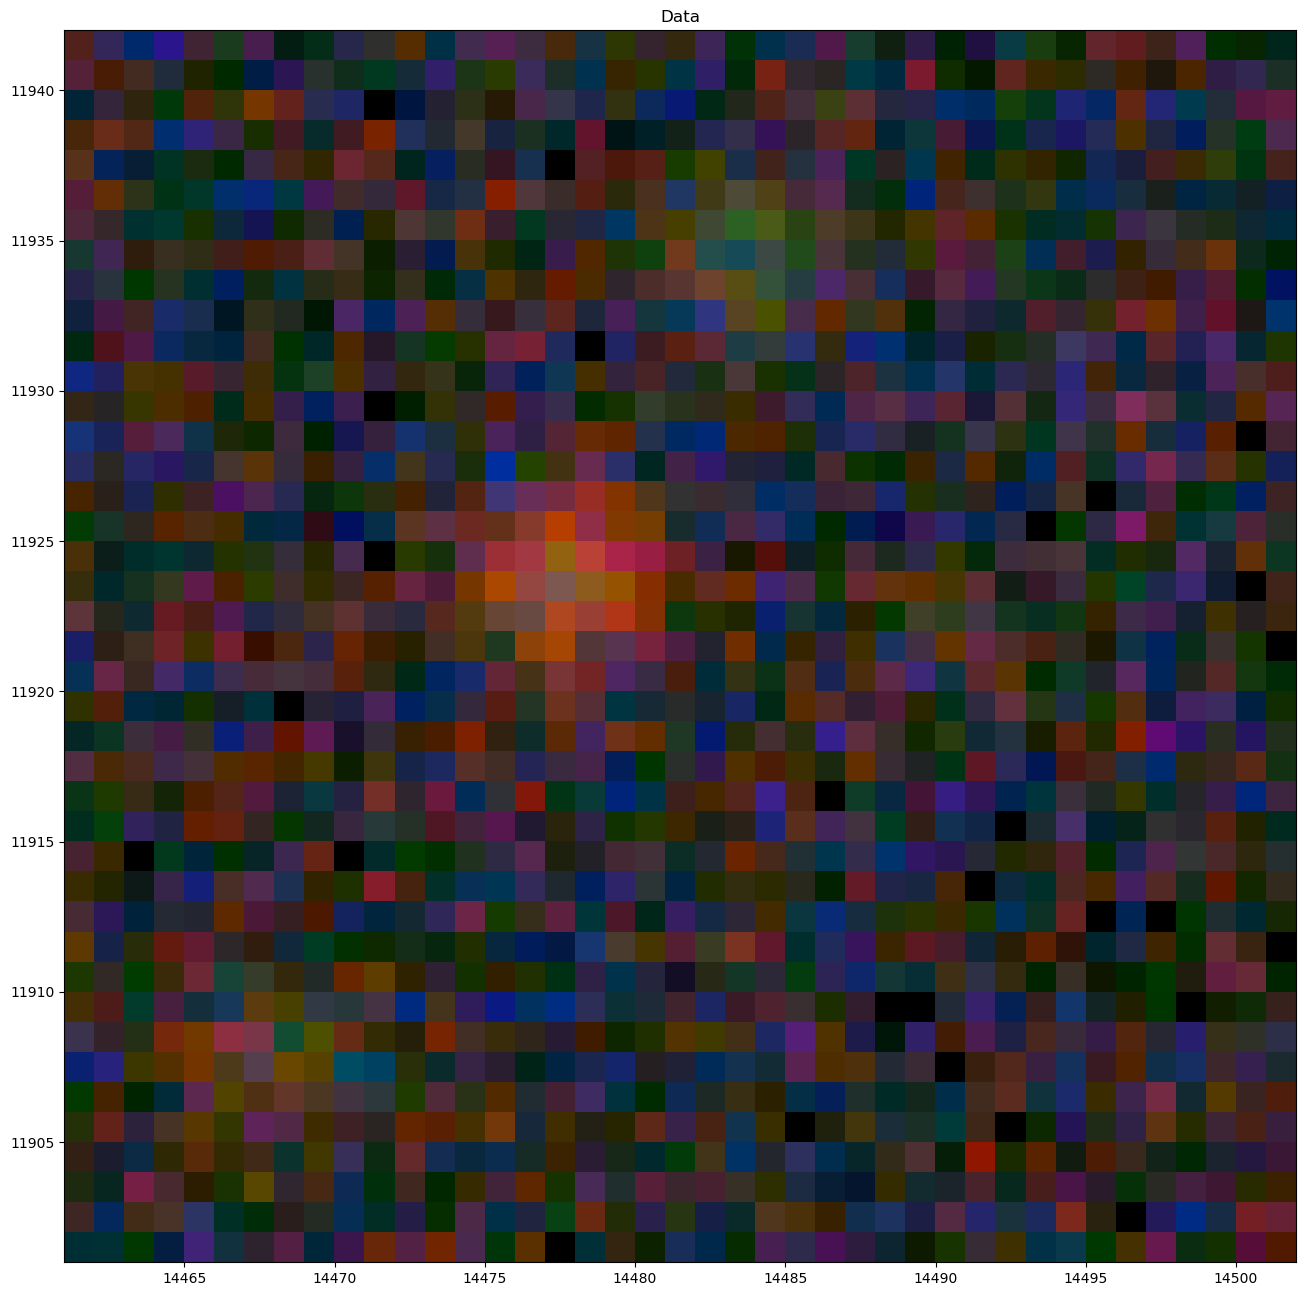

Model: cModel
Model: ser_fixedcen
failed to rebuild due to source 1650111866594156751 has invalid flags for fit
Model: ser
failed to rebuild due to source 1650111866594156751 has invalid flags for fit
Model: cModel
Model: ser_fixedcen
failed to rebuild due to source 1650111866594156752 has invalid flags for fit
Model: ser
failed to rebuild due to source 1650111866594156752 has invalid flags for fit
Model: cModel
Model: ser_fixedcen
failed to rebuild due to source 1650111866594156753 has invalid flags for fit
Model: ser
failed to rebuild due to source 1650111866594156753 has invalid flags for fit
Model: cModel
Model: ser_fixedcen
failed to rebuild due to source 1650111866594156754 has invalid flags for fit
Model: ser
failed to rebuild due to source 1650111866594156754 has invalid flags for fit
Model: cModel
Model: ser_fixedcen
failed to rebuild due to source 1650111866594156755 has invalid flags for fit
Model: ser
failed to rebuild due to source 1650111866594156755 has invalid flags for

In [6]:
# plot a smaller blend near the edge
# because sources are sorted by RA, this will be outside the tract's inner region
# ... and so there will be no truth objects and detected ones will have detect_isPrimary==False 
row_parent_out = np.where((catalog_multi["deblend_nChild"] > 3) & (catalog_multi["deblend_nChild"] < 6))[0][0]
fig_rgb_out, ax_rgb_out, fig_gs_out, ax_gs_out = plot_blend(
    rebuilder, row_parent_out, kwargs_plot_parent=kwargs_parent, kwargs_plot_children=kwargs_children,
)

/sdf/group/rubin/sw/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/astropy/units/function/logarithmic.py:67: RuntimeWarning: divide by zero encountered in log10
  return dex.to(self._function_unit, np.log10(x))


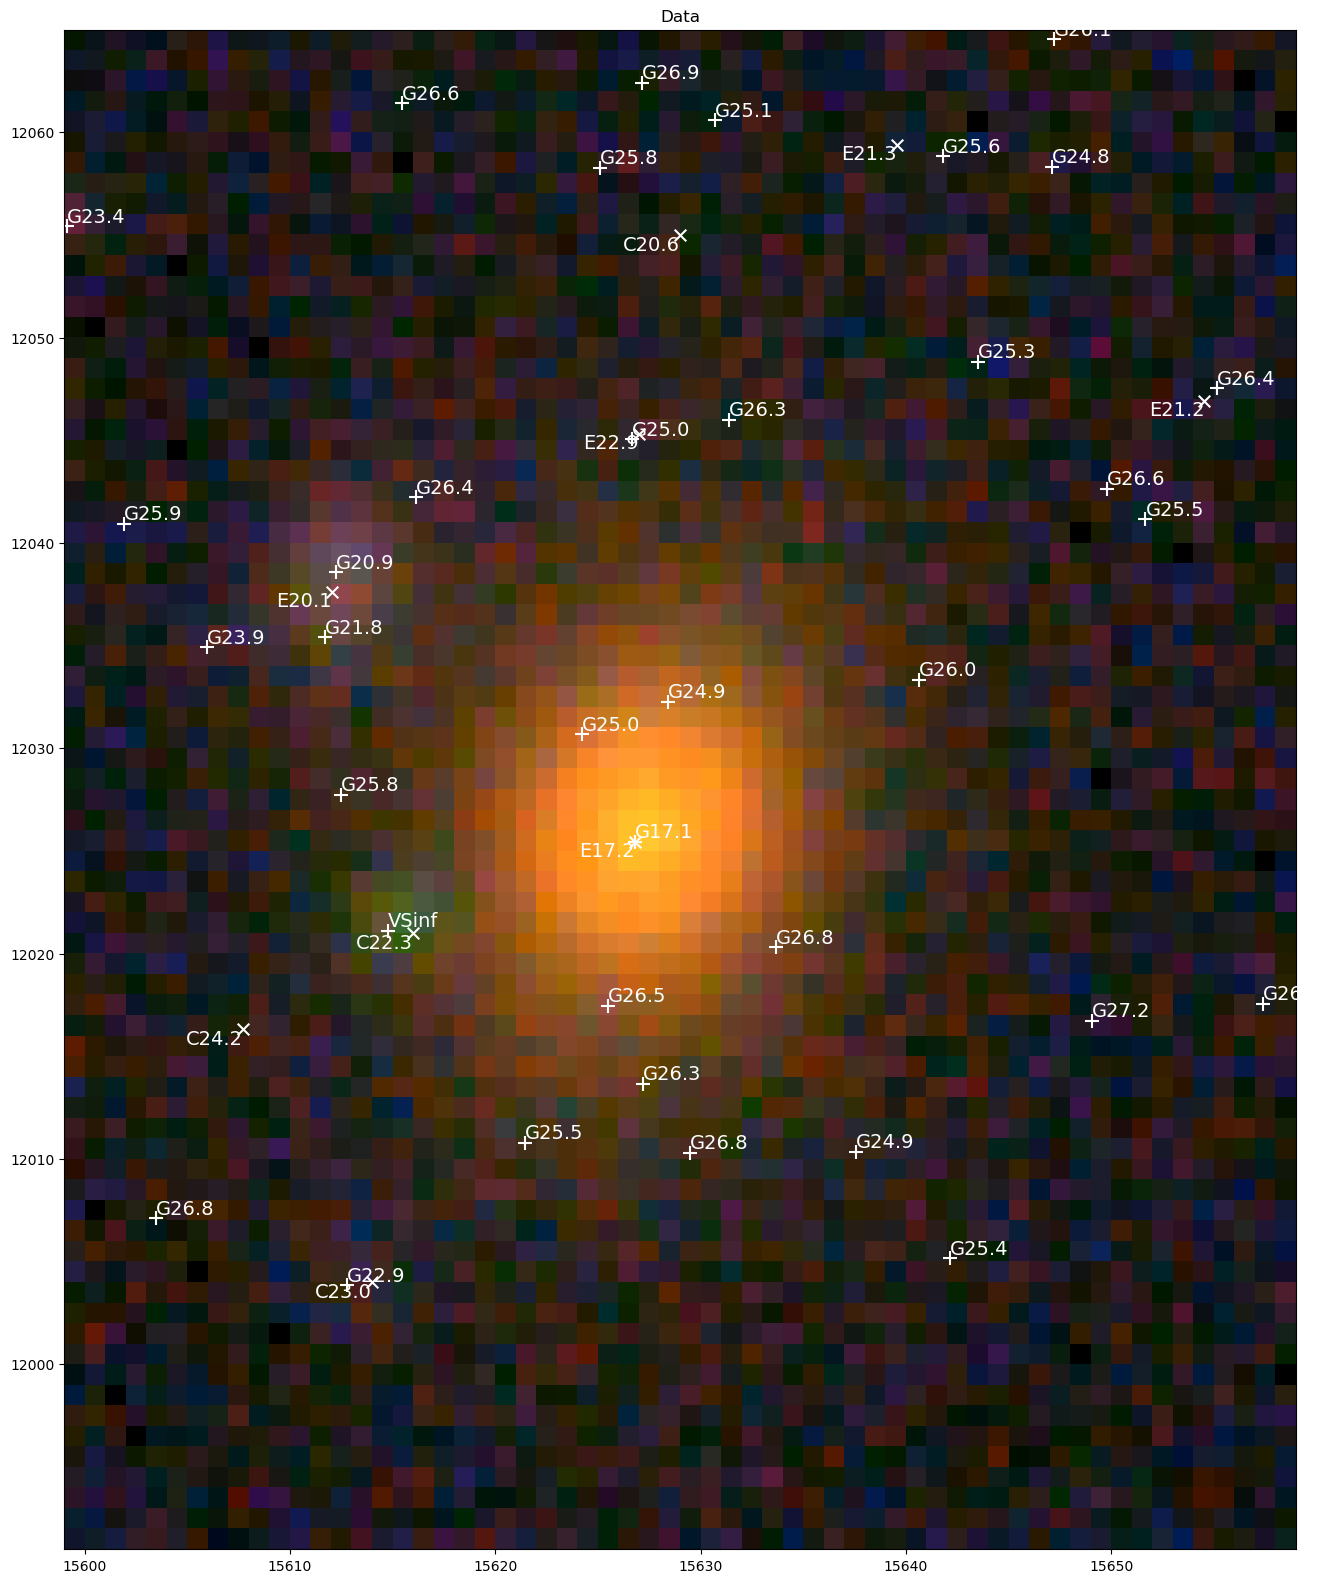

Model: cModel
Model: ser_fixedcen


/sdf/data/rubin/user/dtaranu/tickets/DM-42870/multiprofit/python/lsst/multiprofit/plots.py:540: RuntimeWarning: divide by zero encountered in power
  variance_band = observation.sigma_inv.data ** -2
/sdf/group/rubin/sw/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


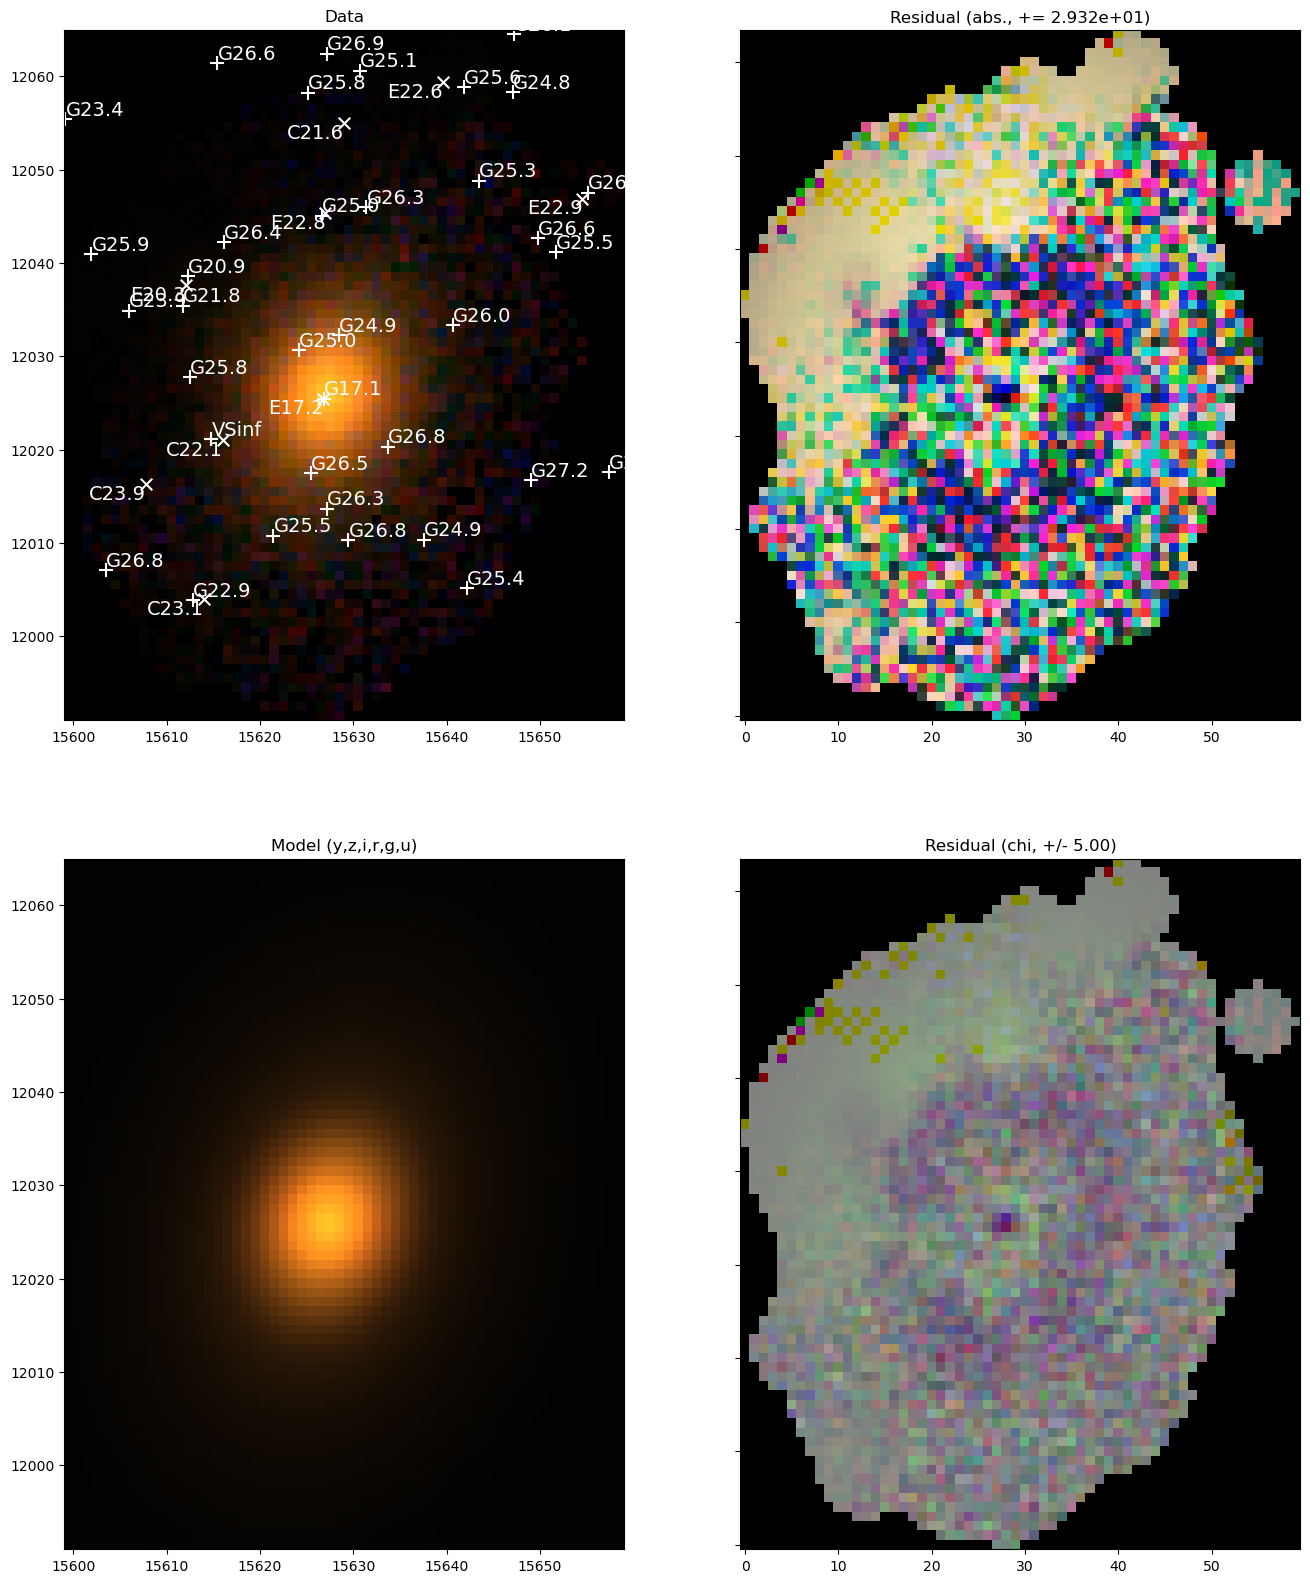

Model: ser


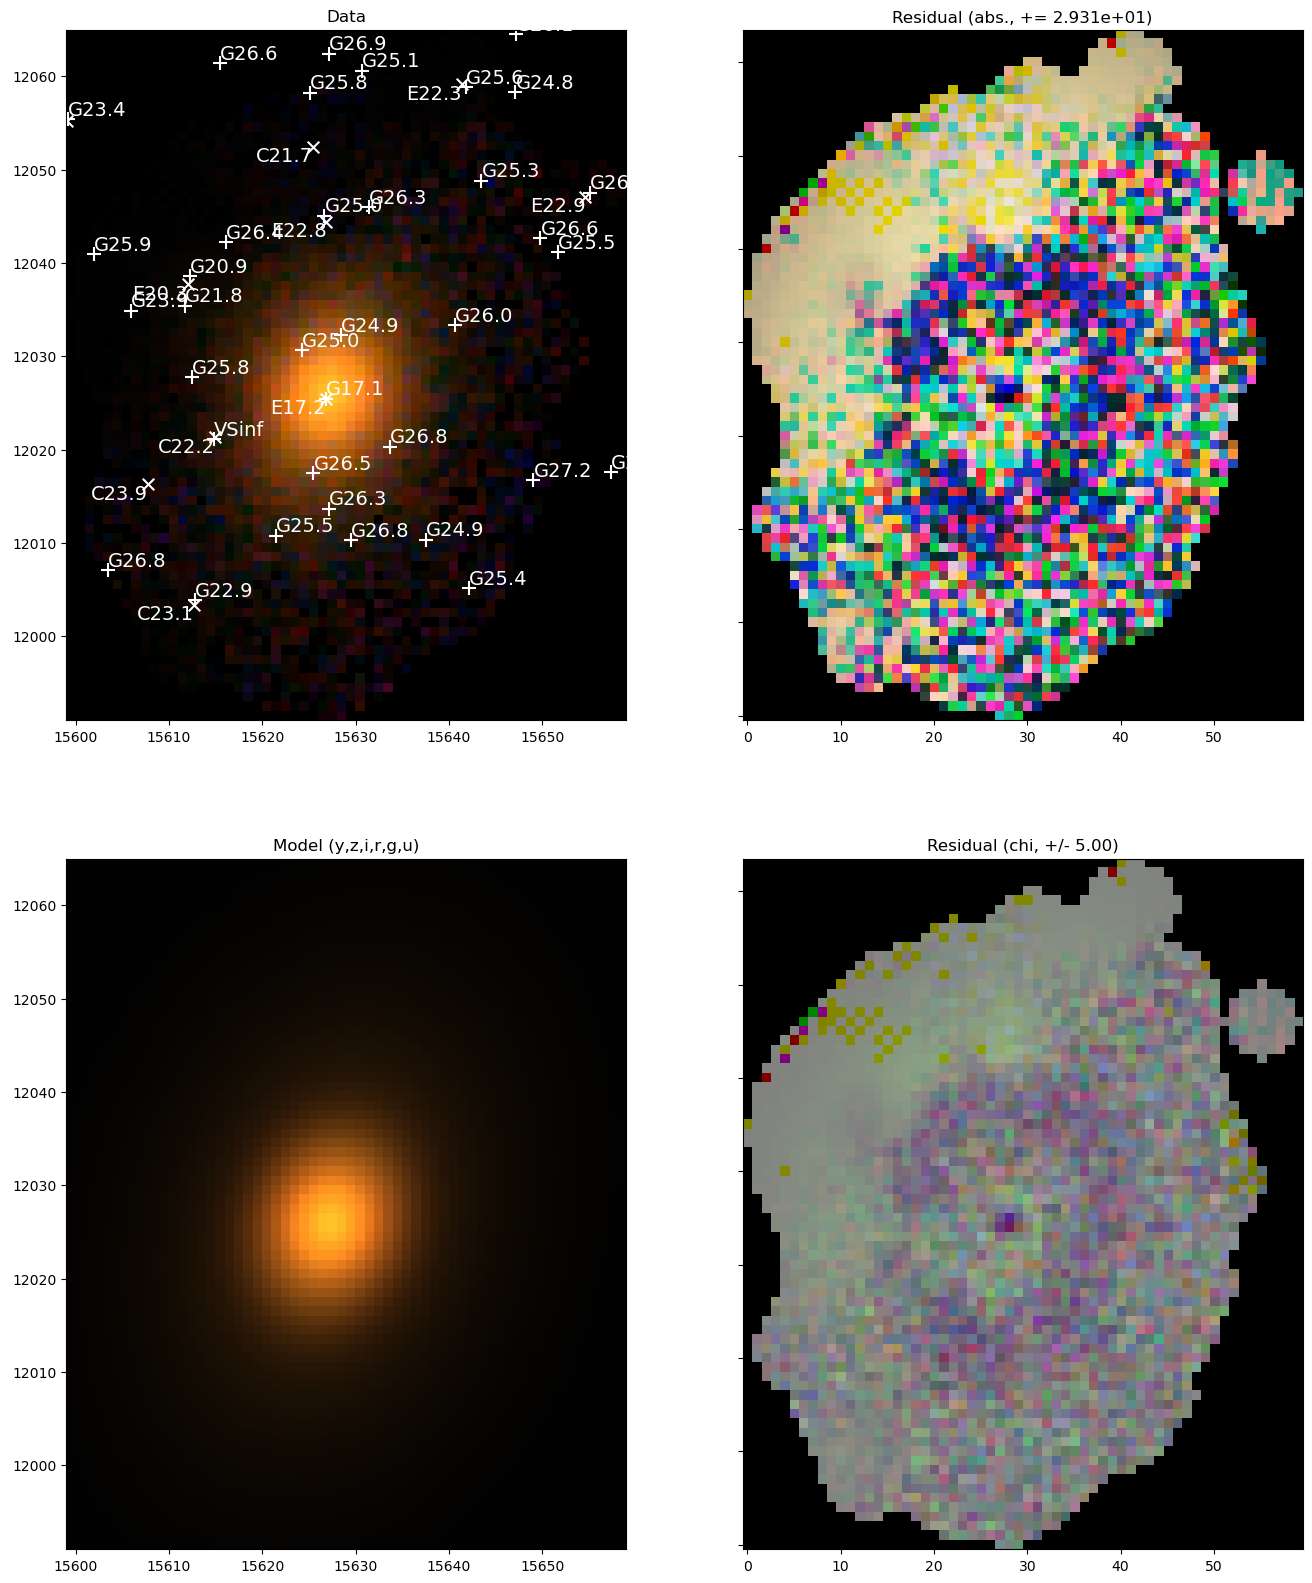

Model: cModel
Model: ser_fixedcen


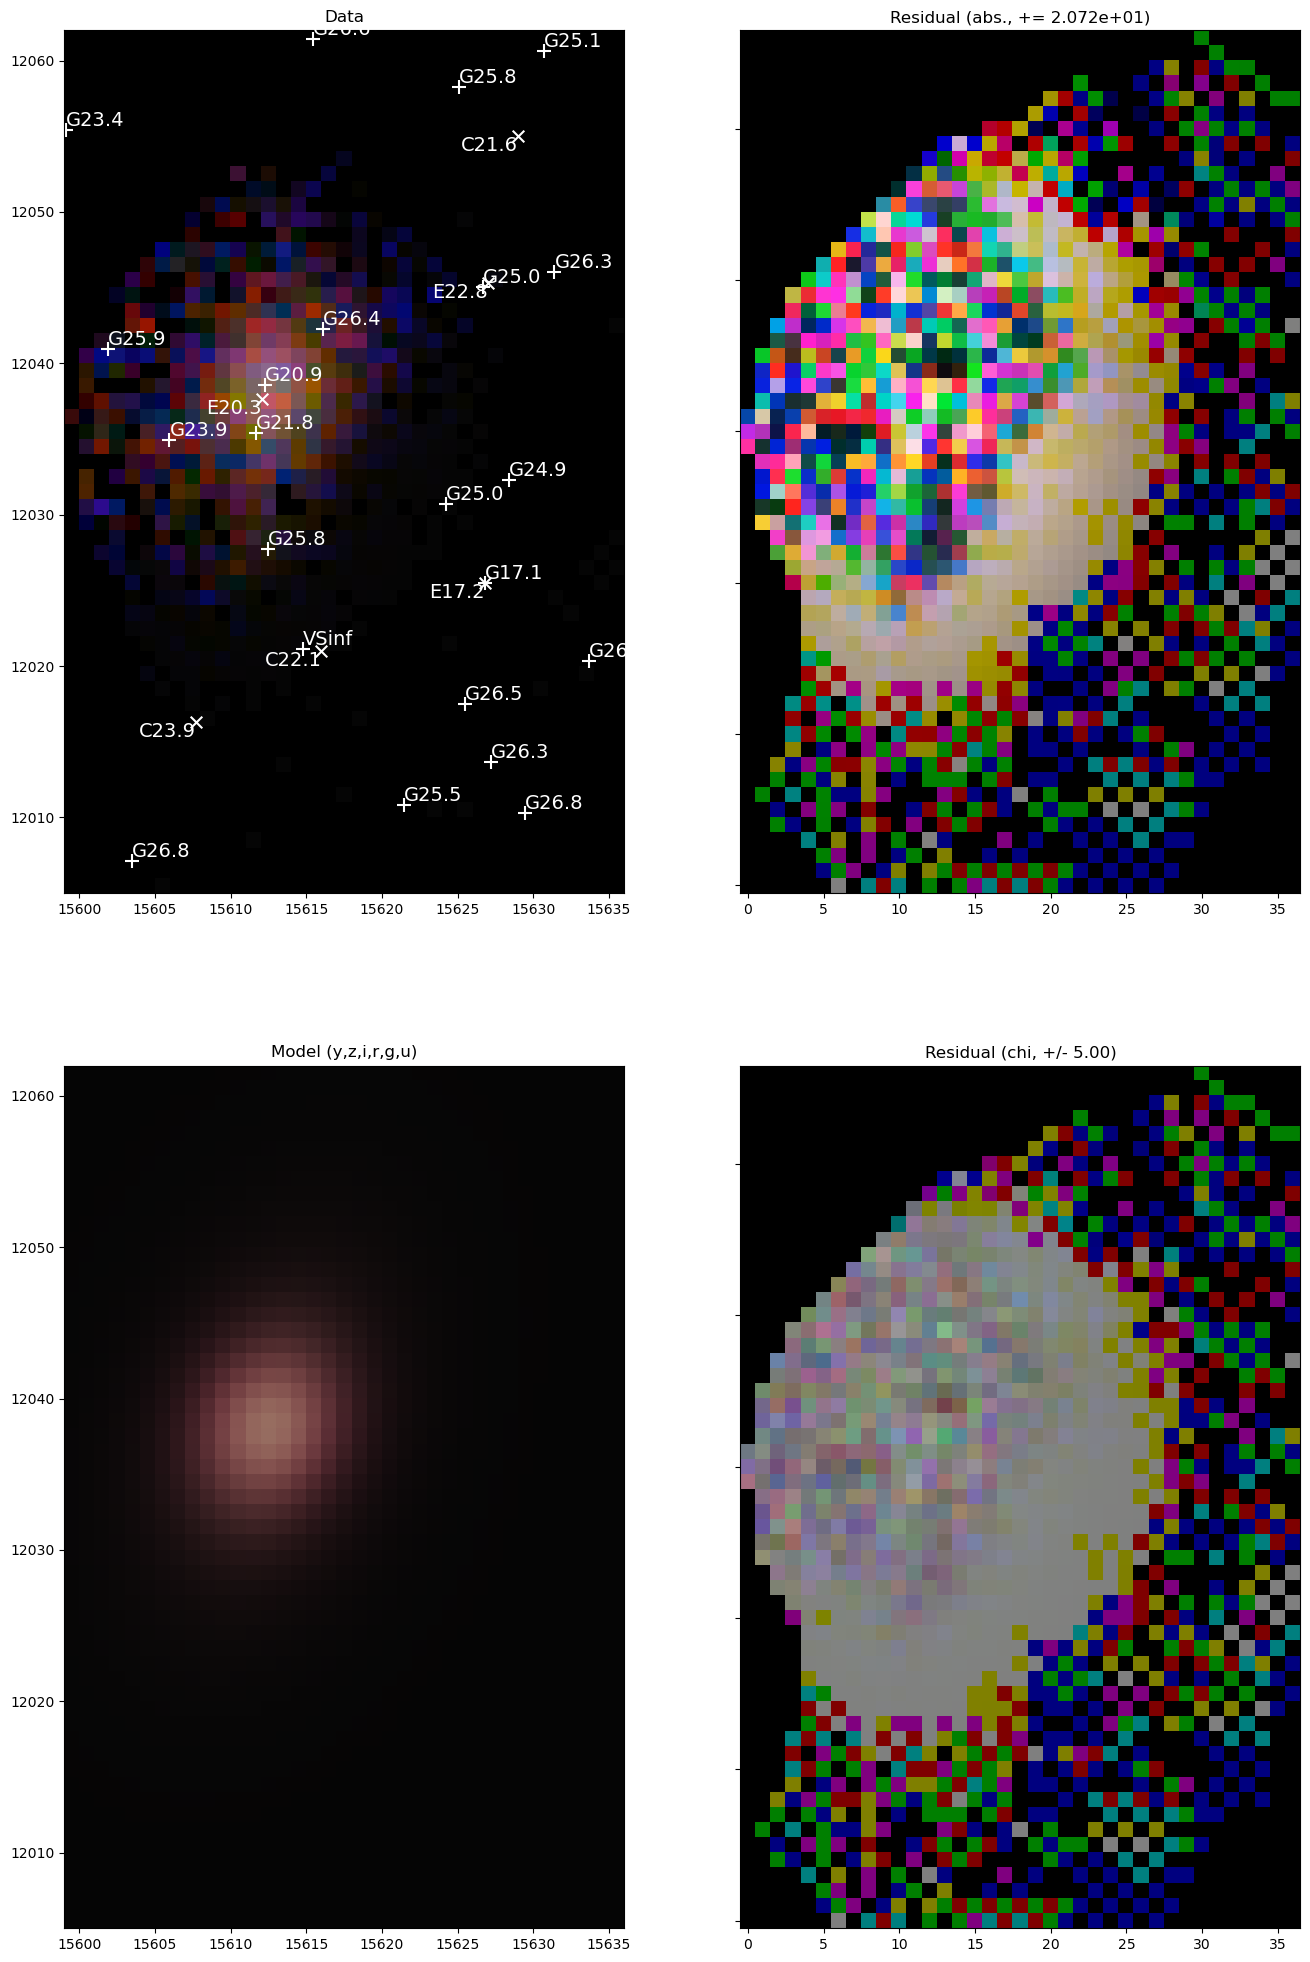

Model: ser


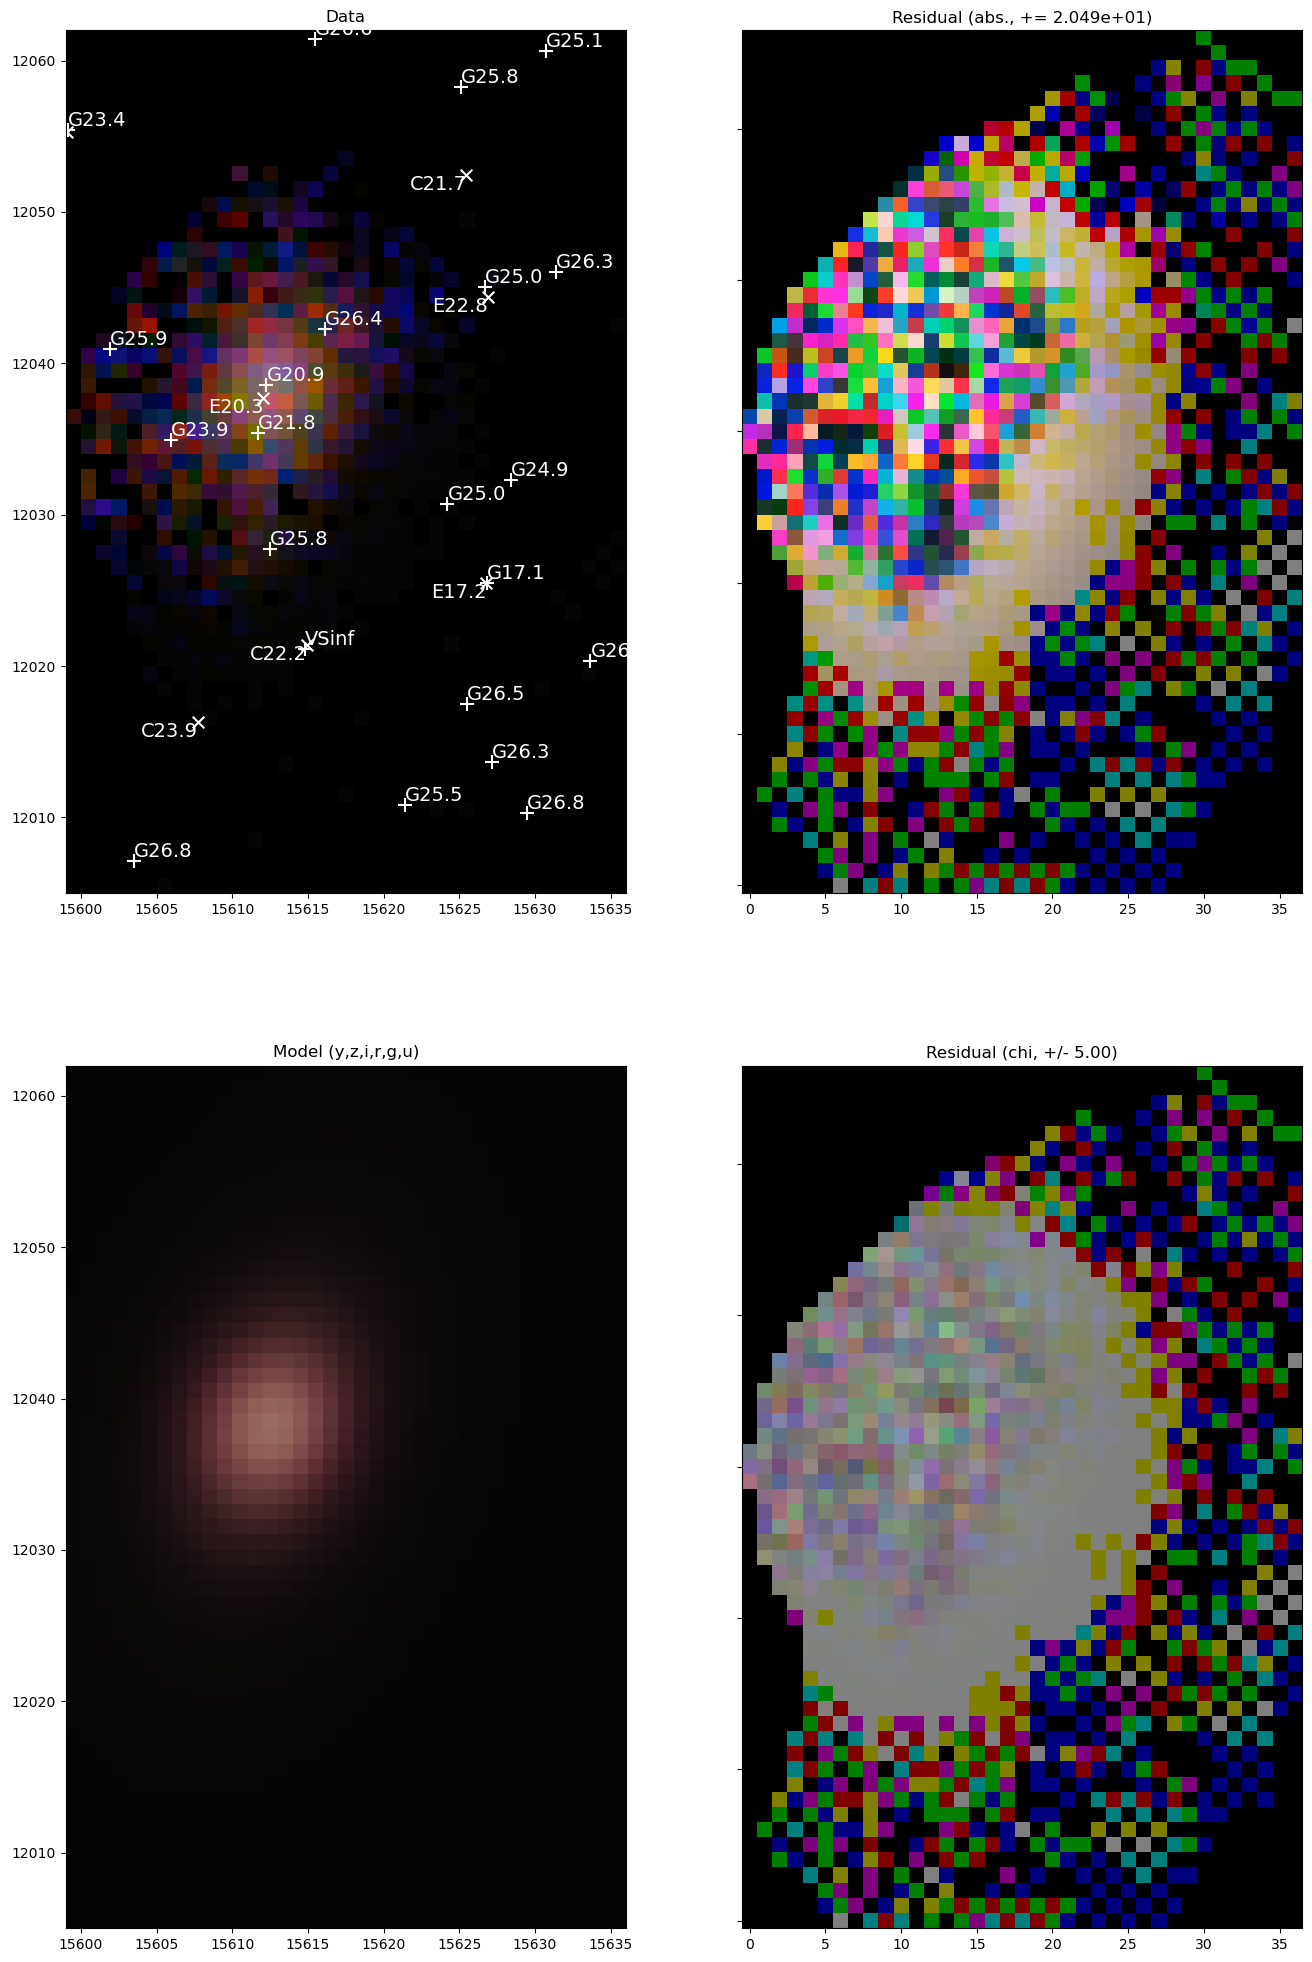

Model: cModel
Model: ser_fixedcen


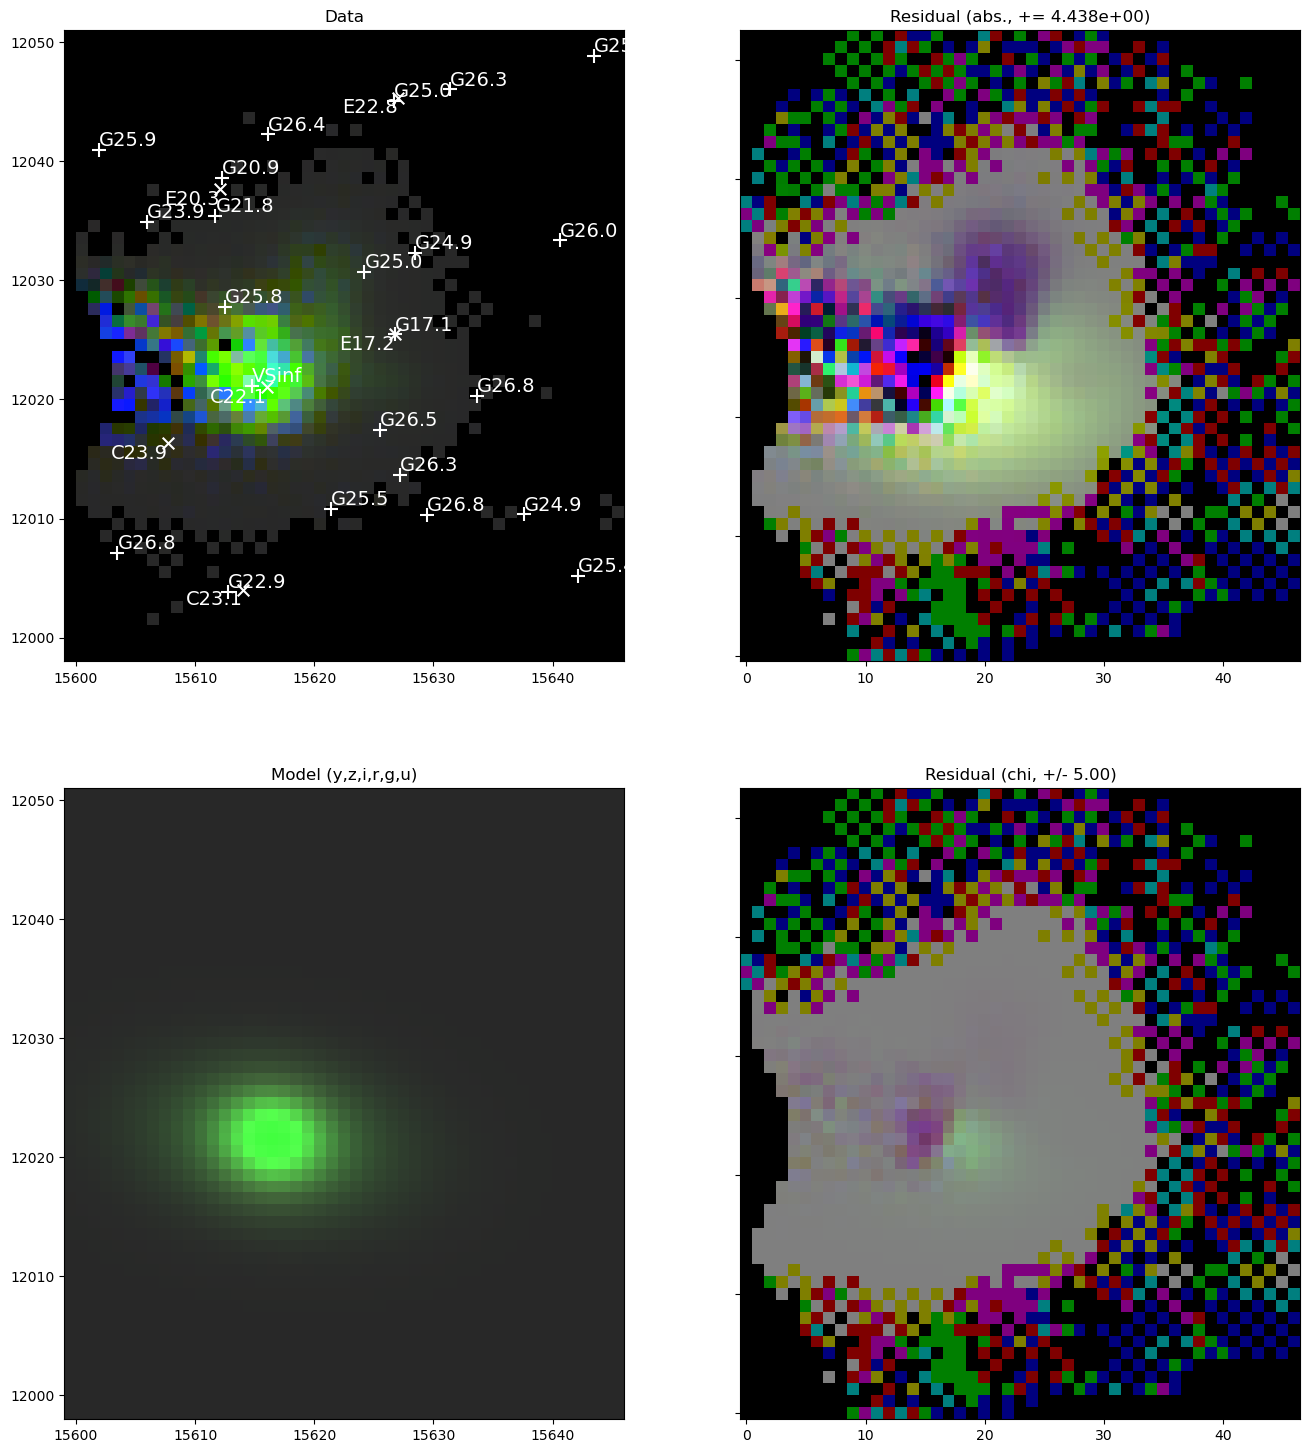

Model: ser


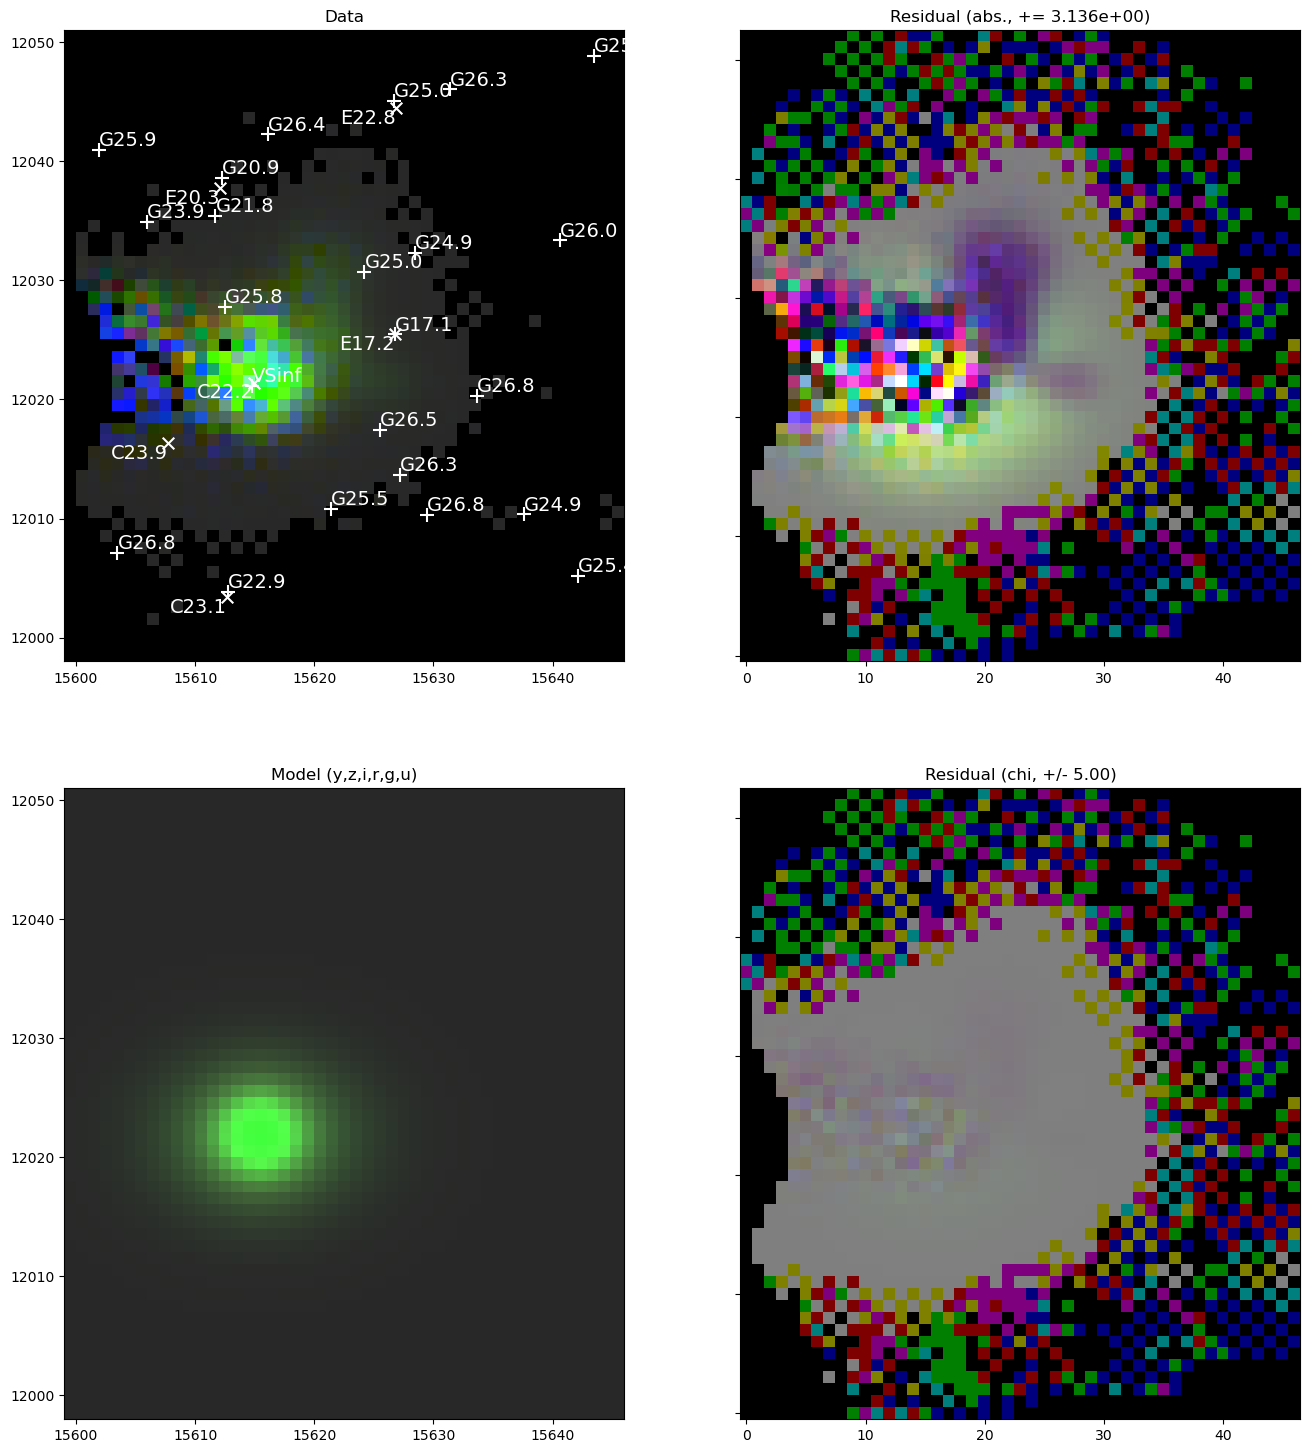

Model: cModel
Model: ser_fixedcen


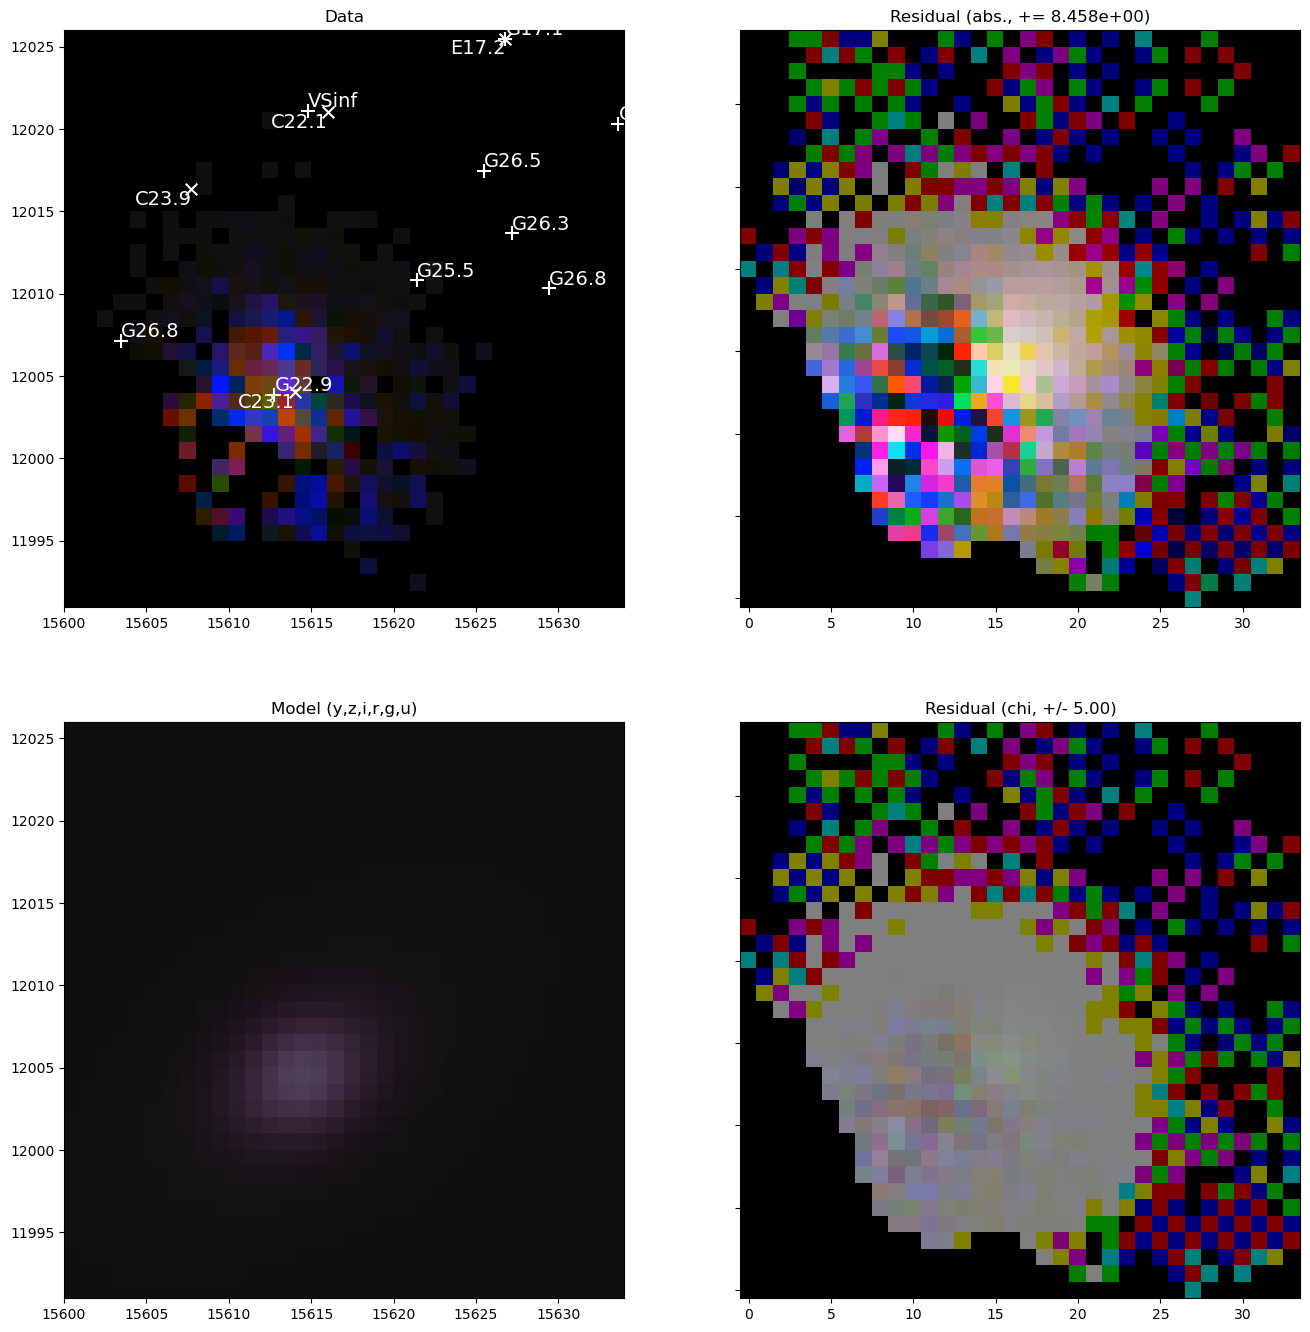

Model: ser


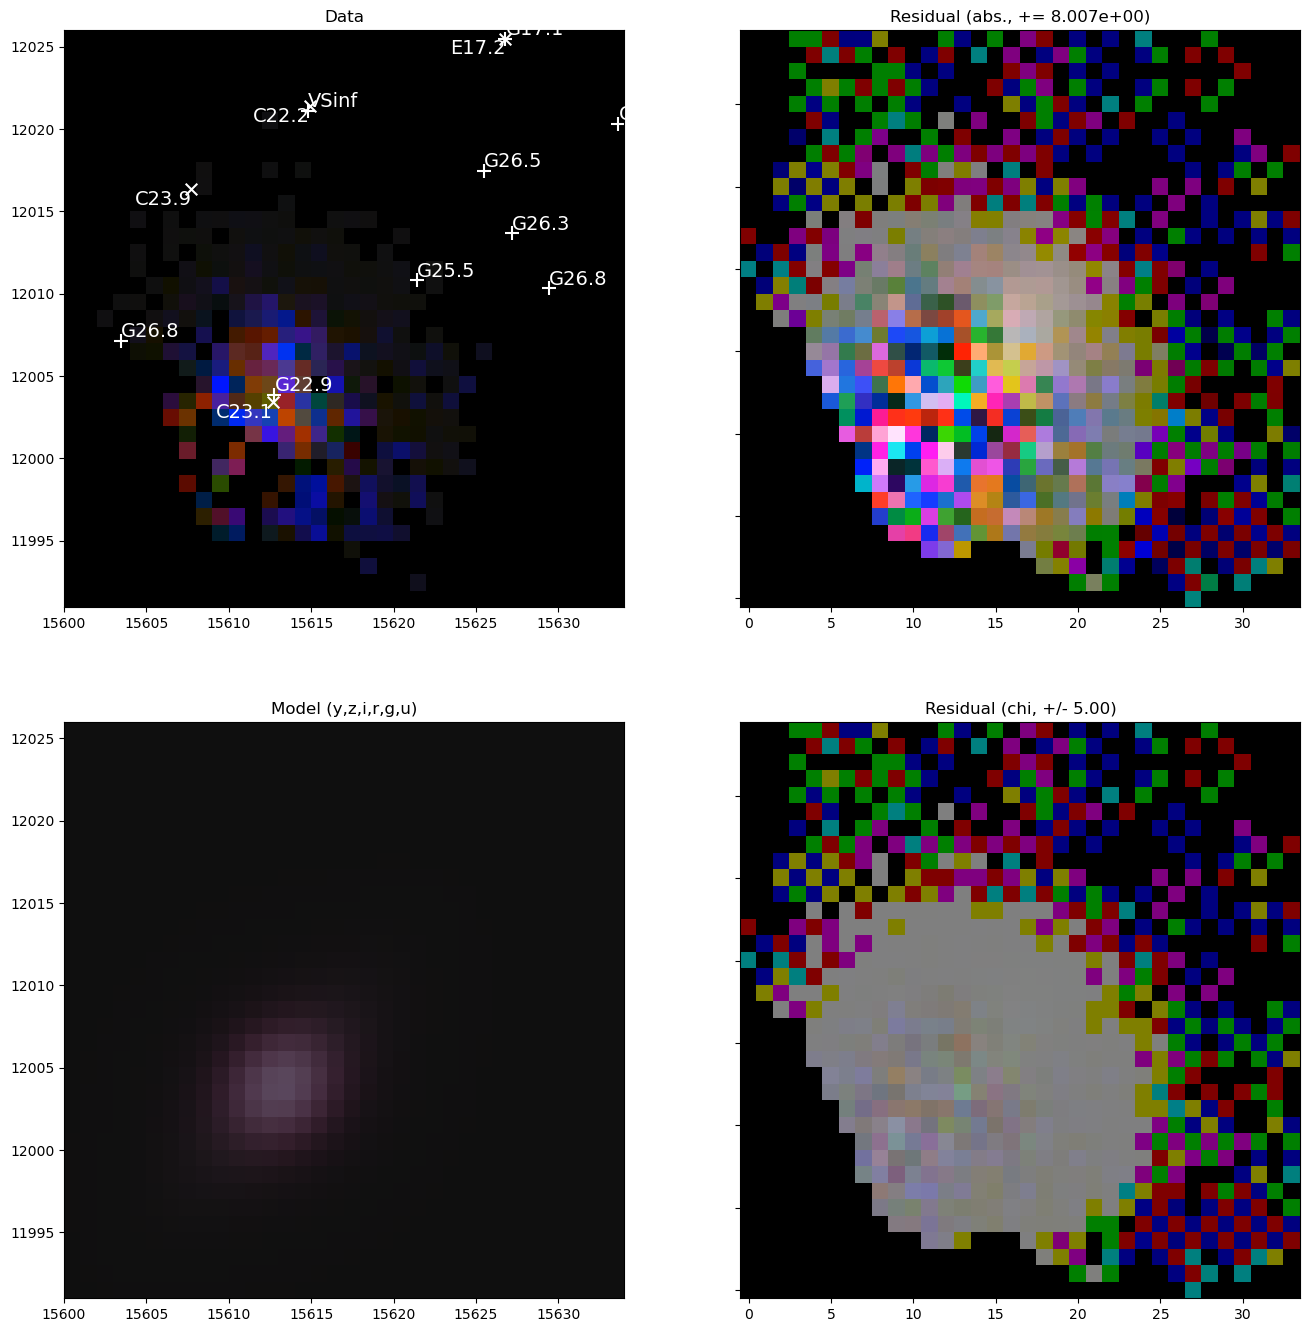

Model: cModel
Model: ser_fixedcen


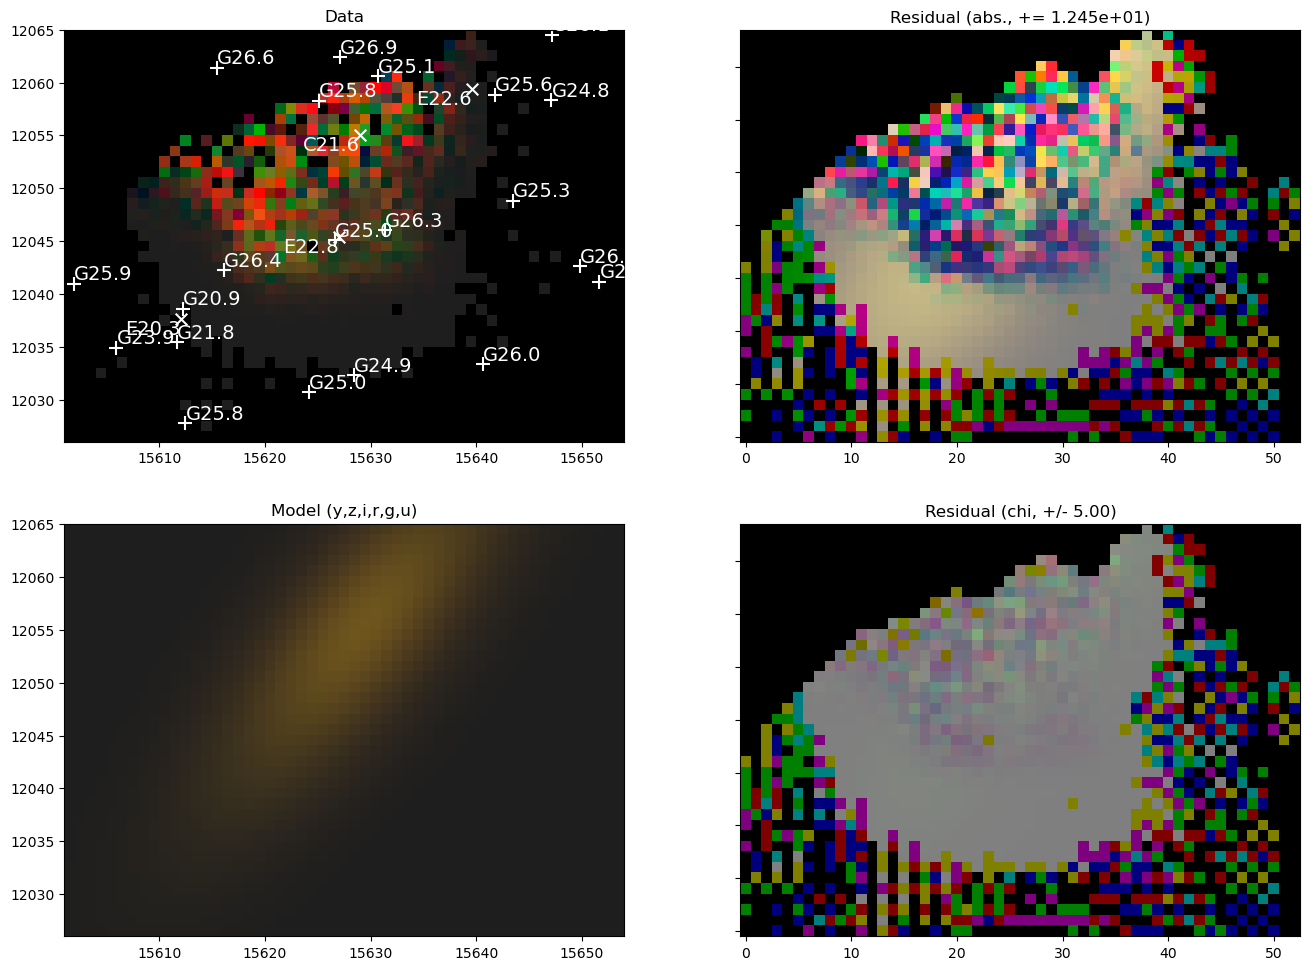

Model: ser


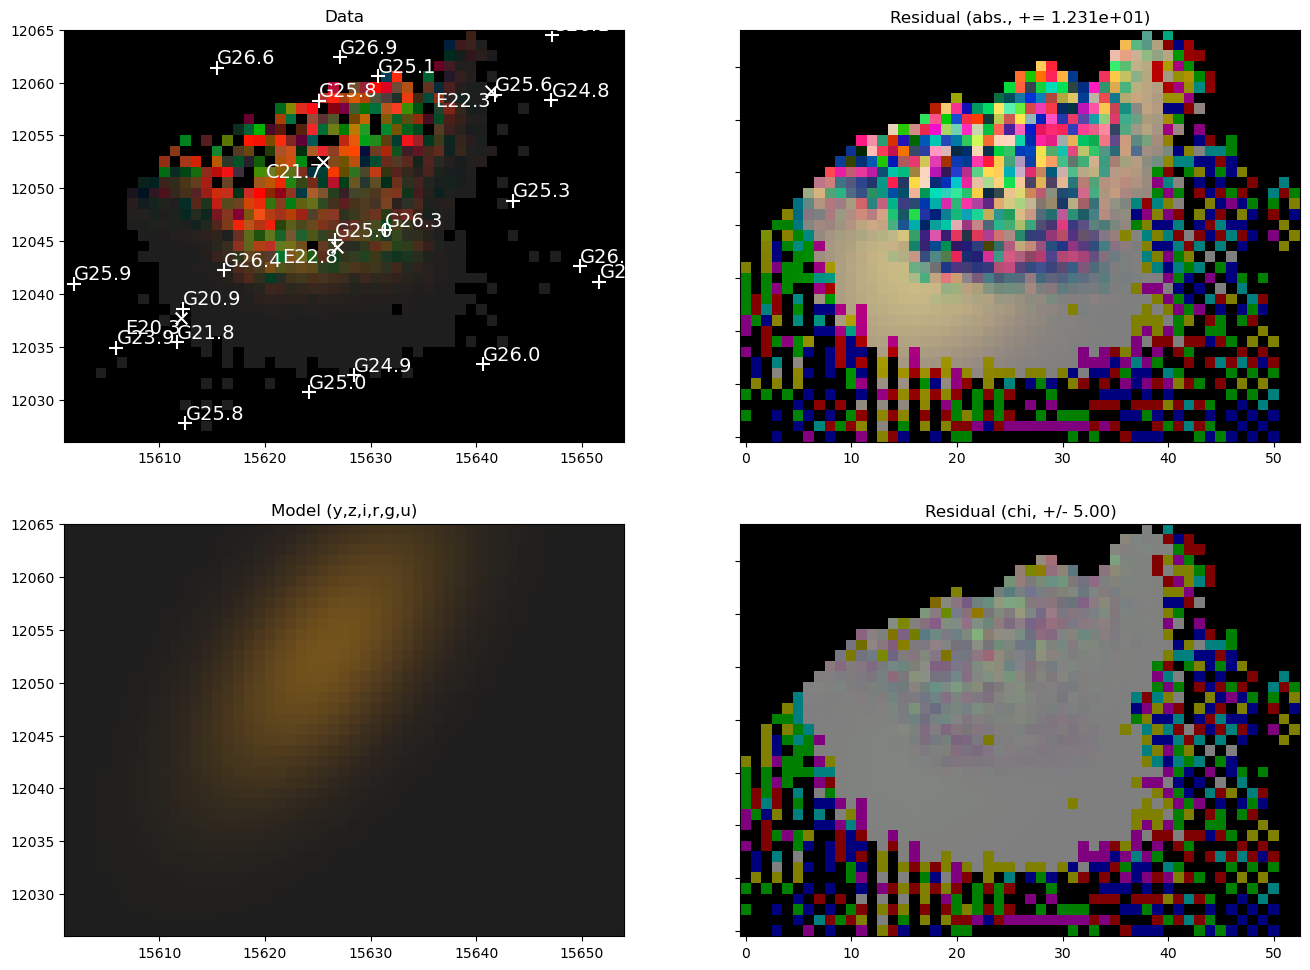

Model: cModel
Model: ser_fixedcen


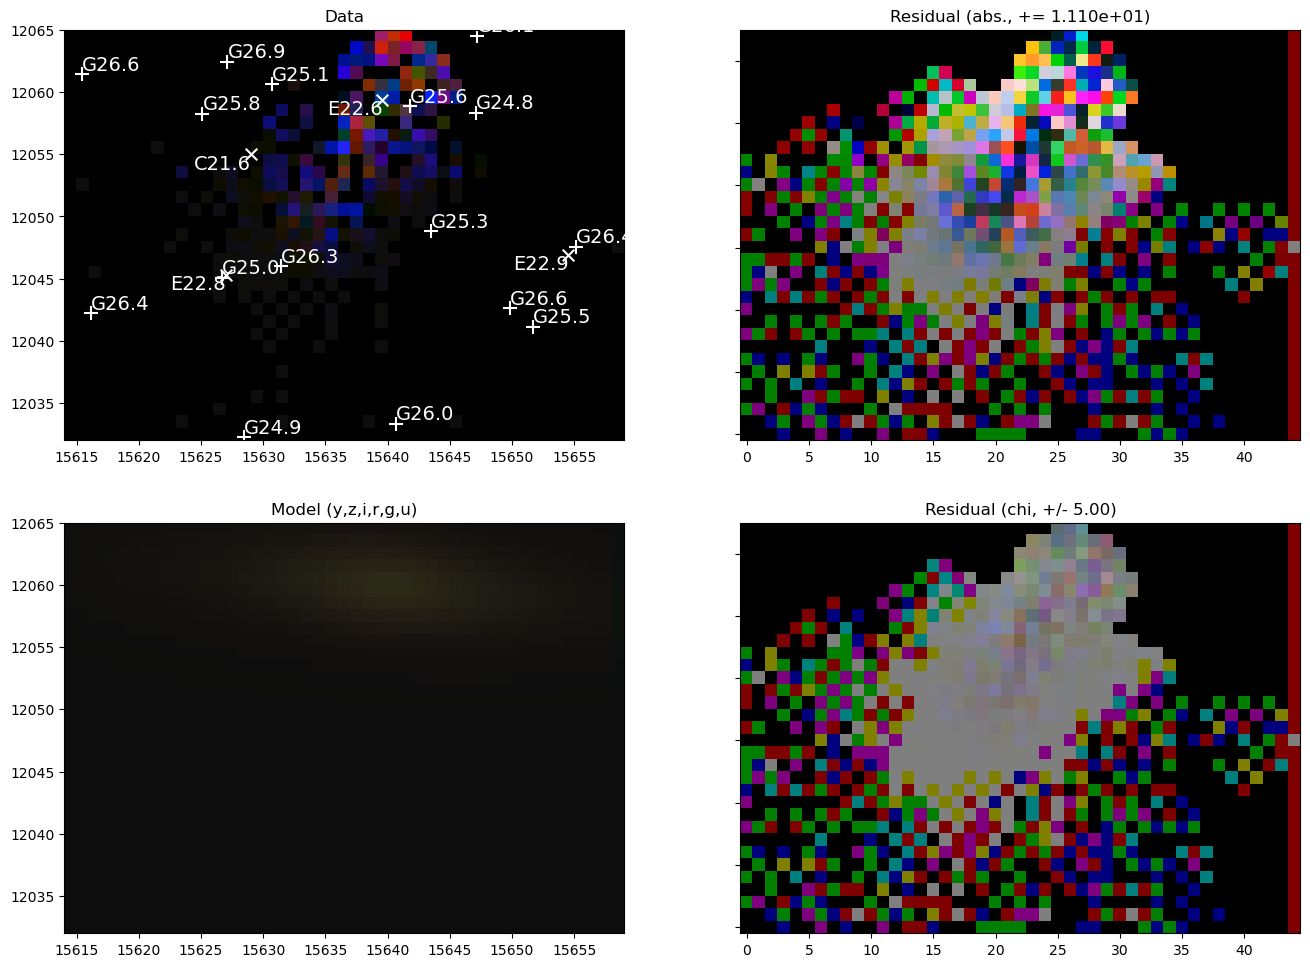

Model: ser


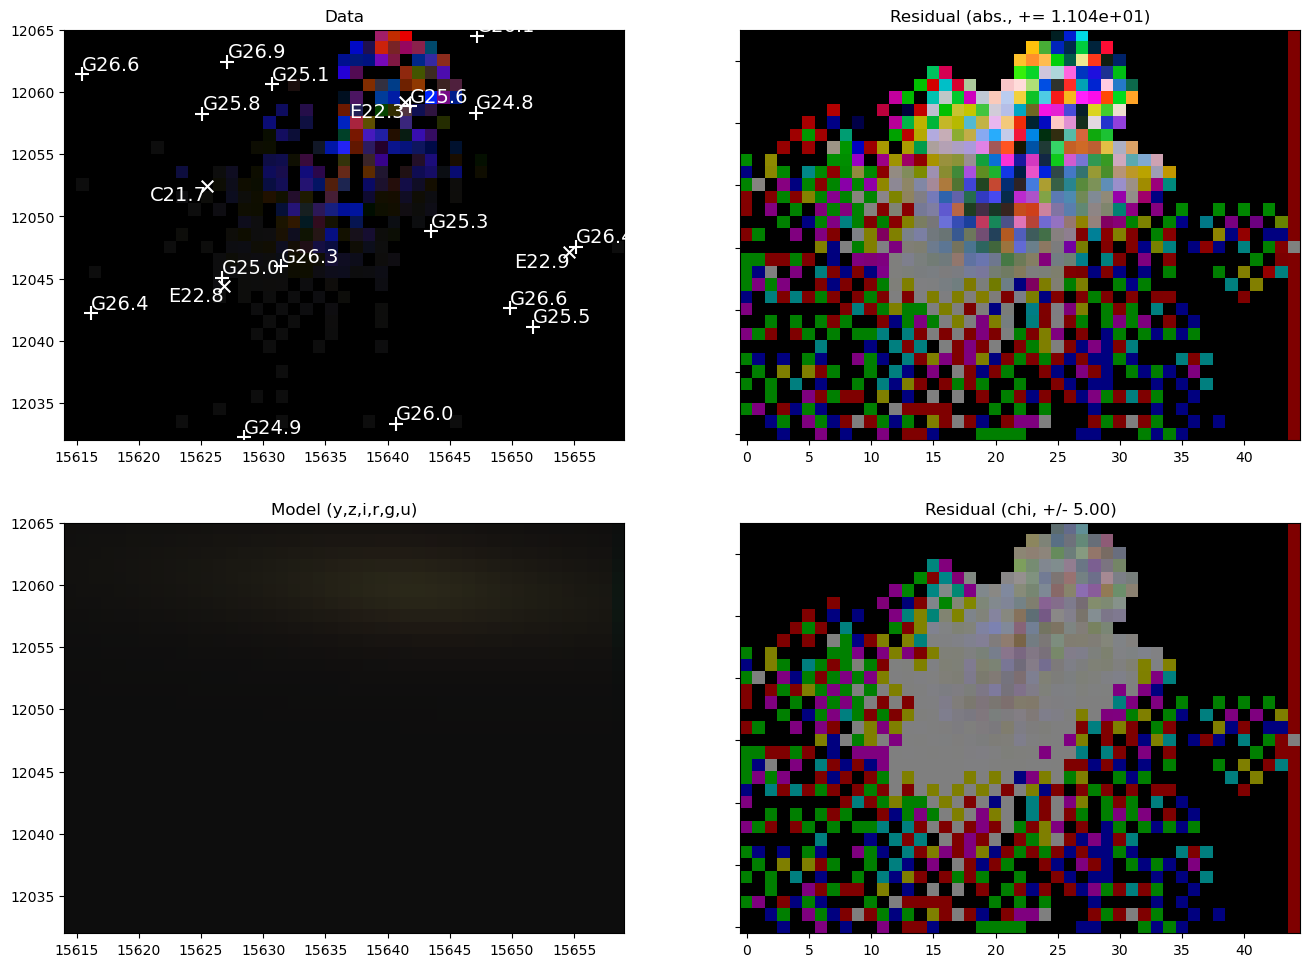

Model: cModel
Model: ser_fixedcen


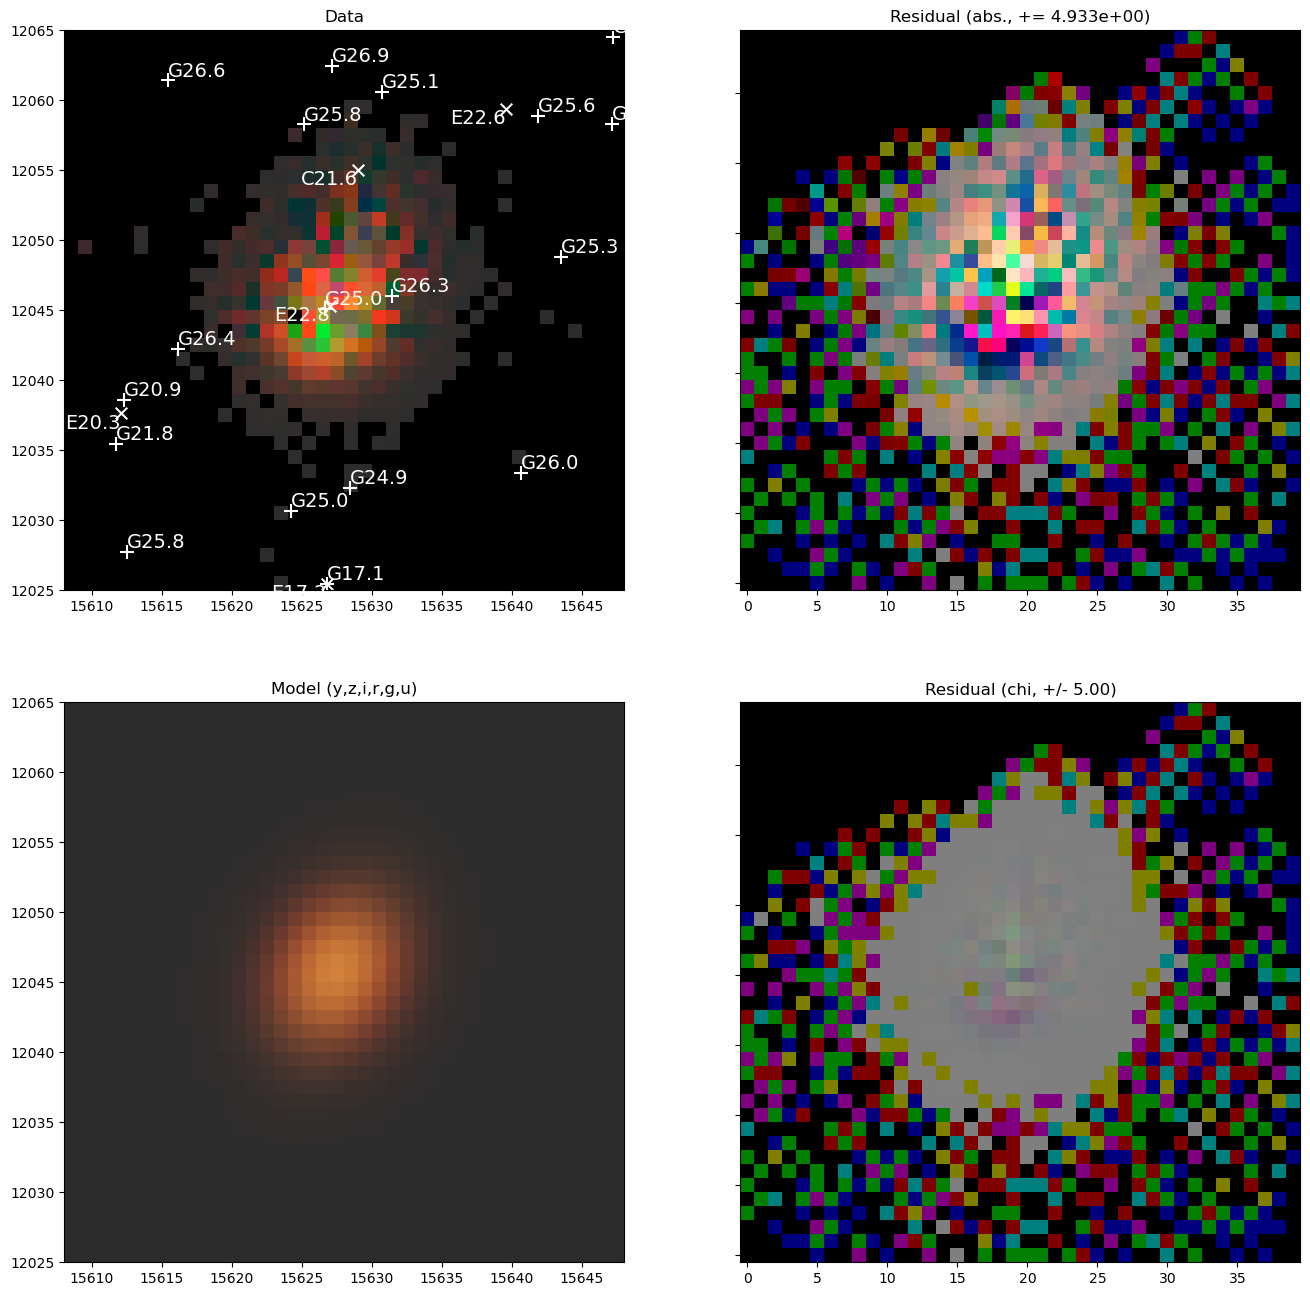

Model: ser


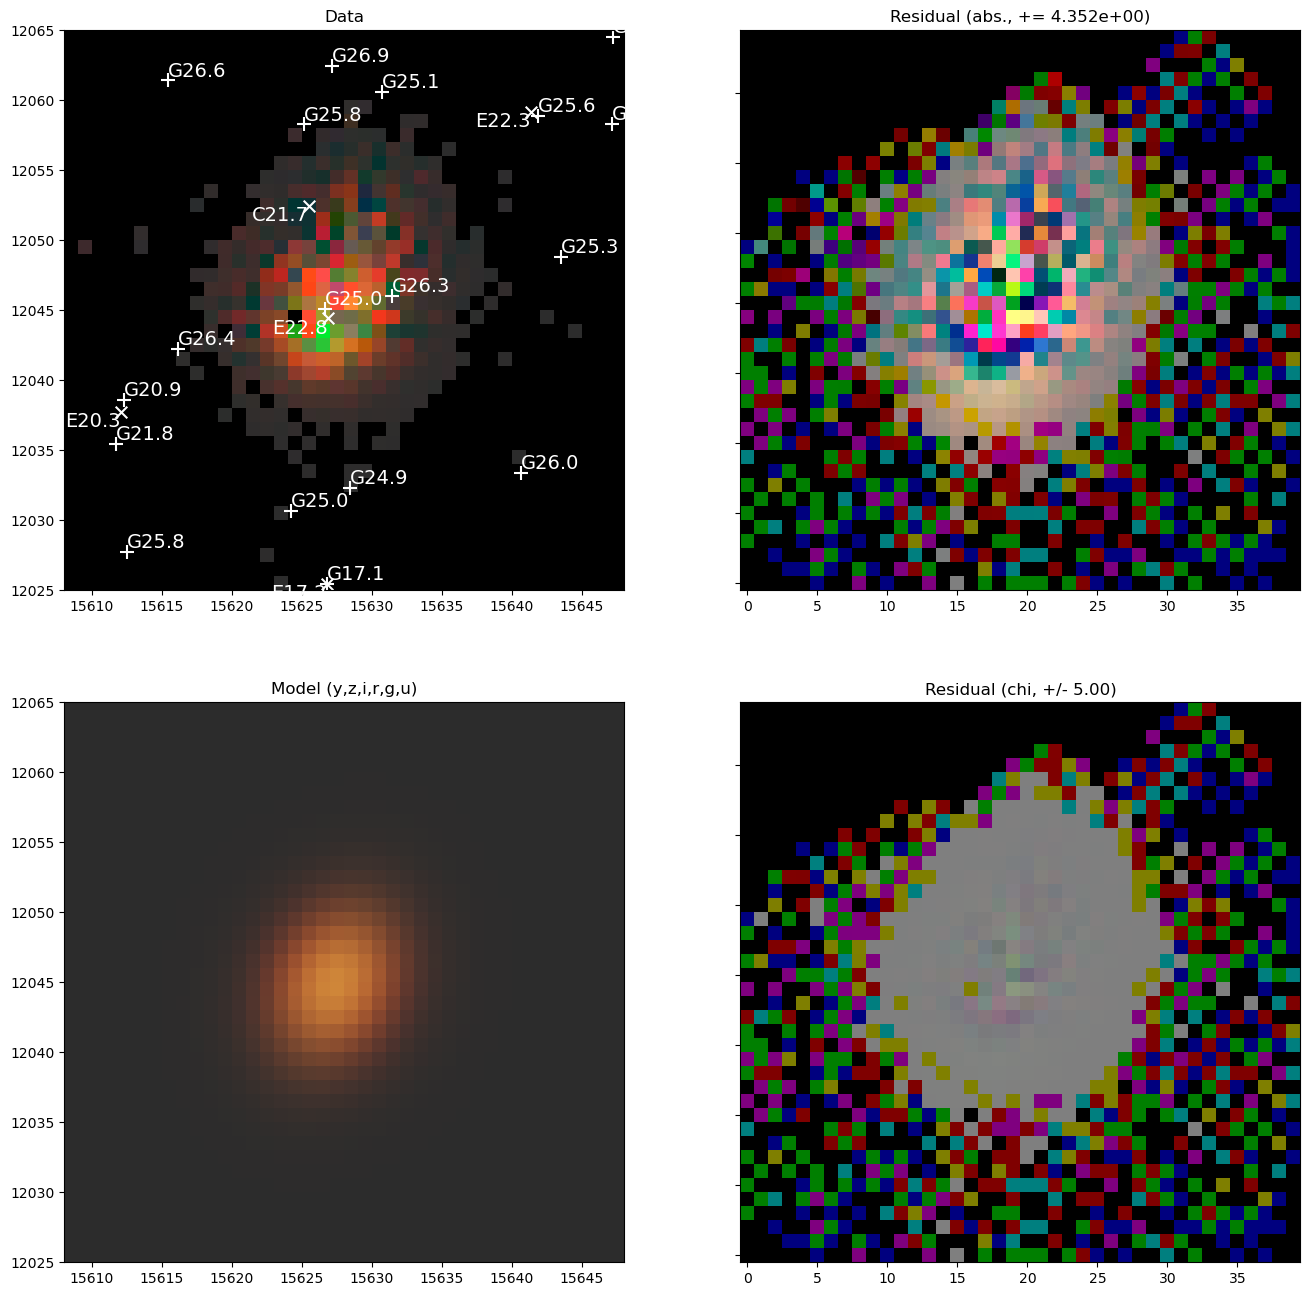

Model: cModel
Model: ser_fixedcen


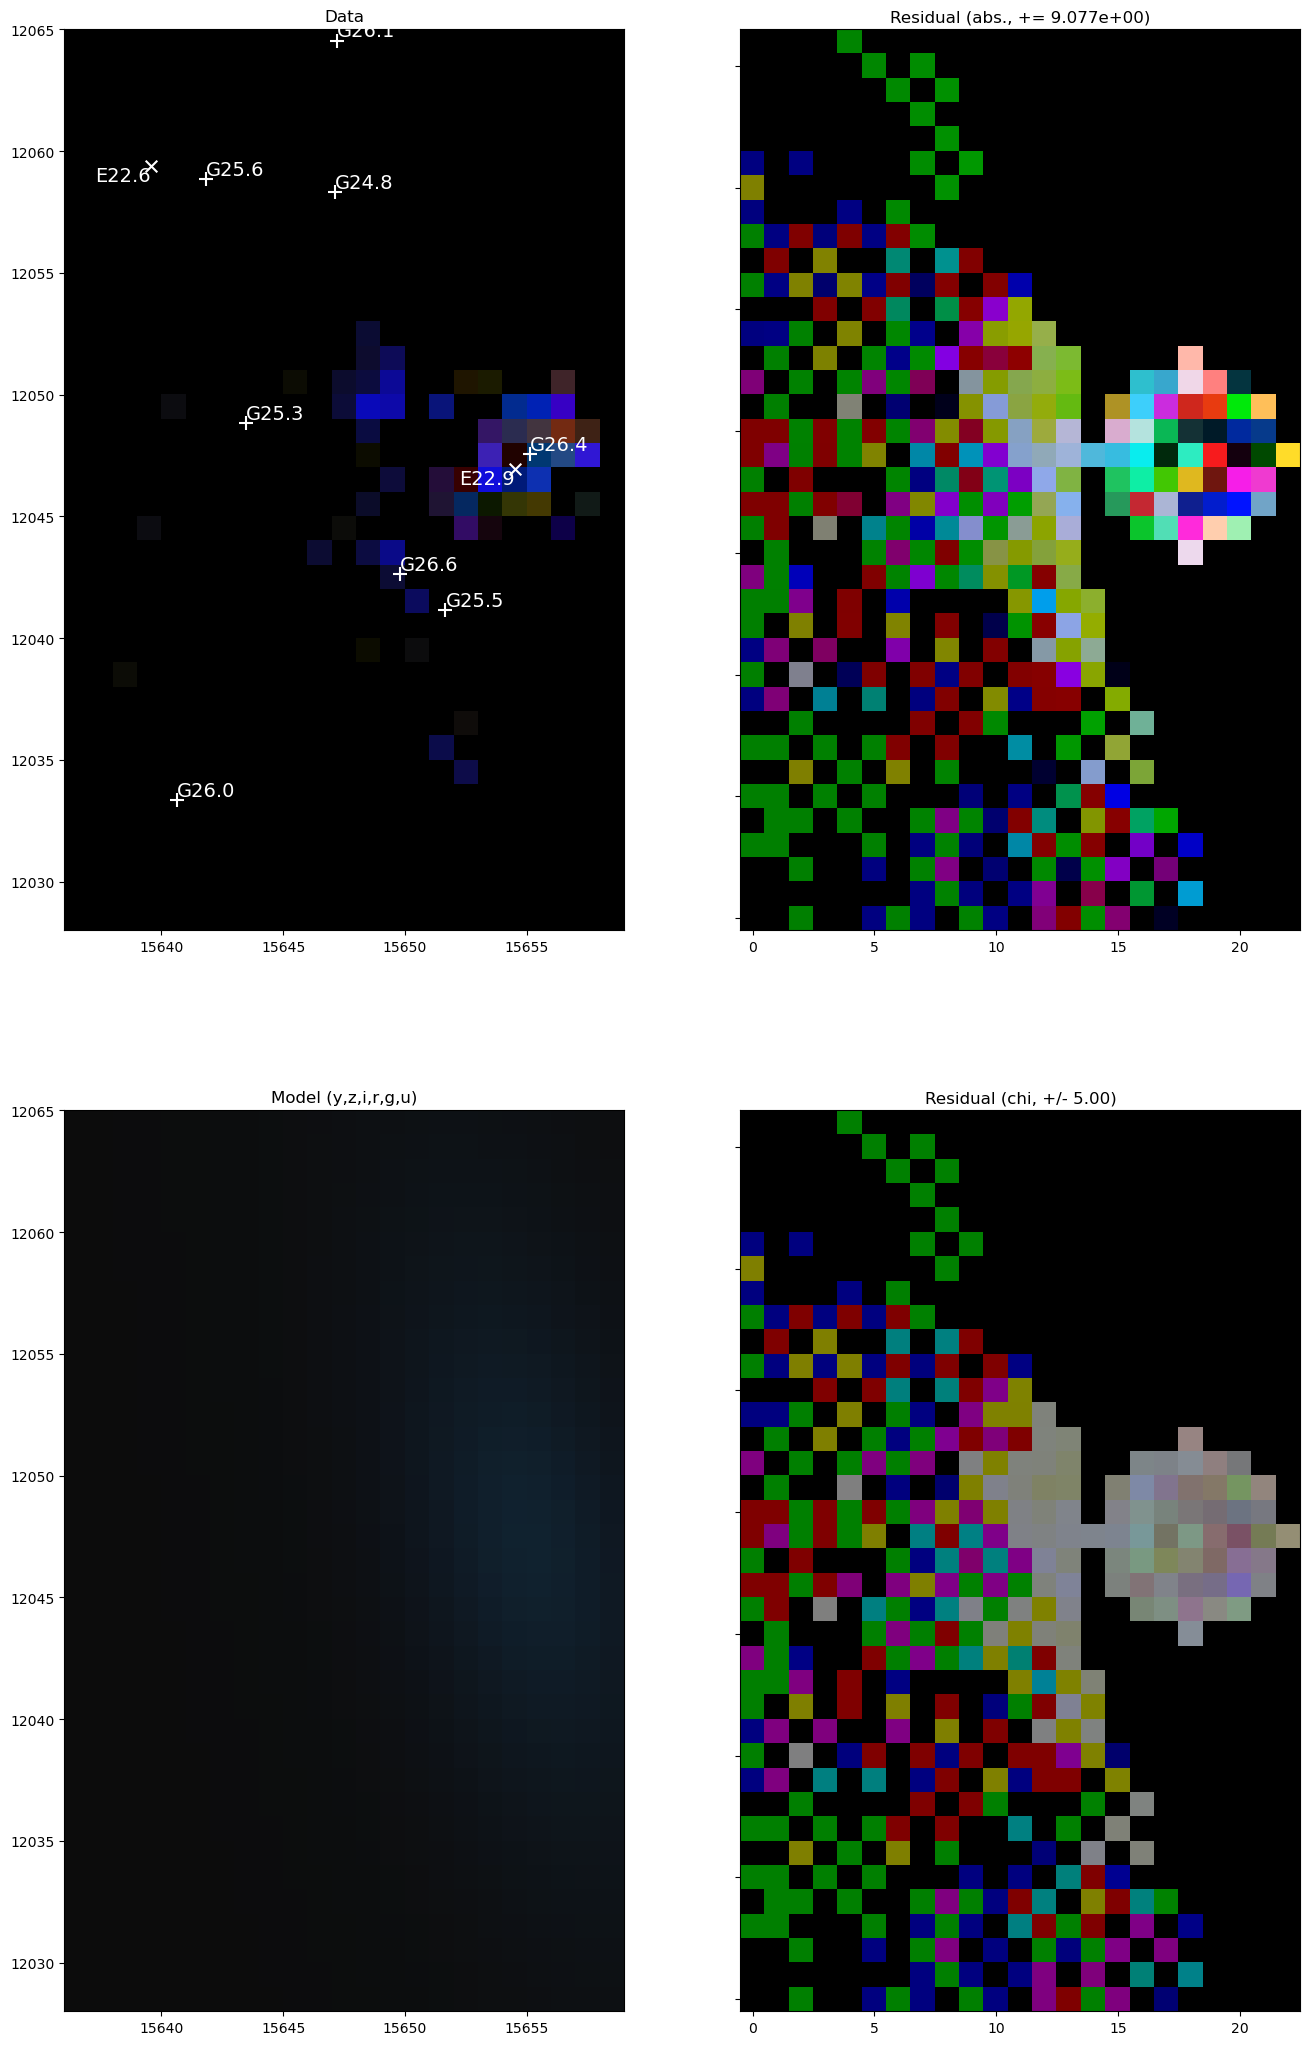

Model: ser


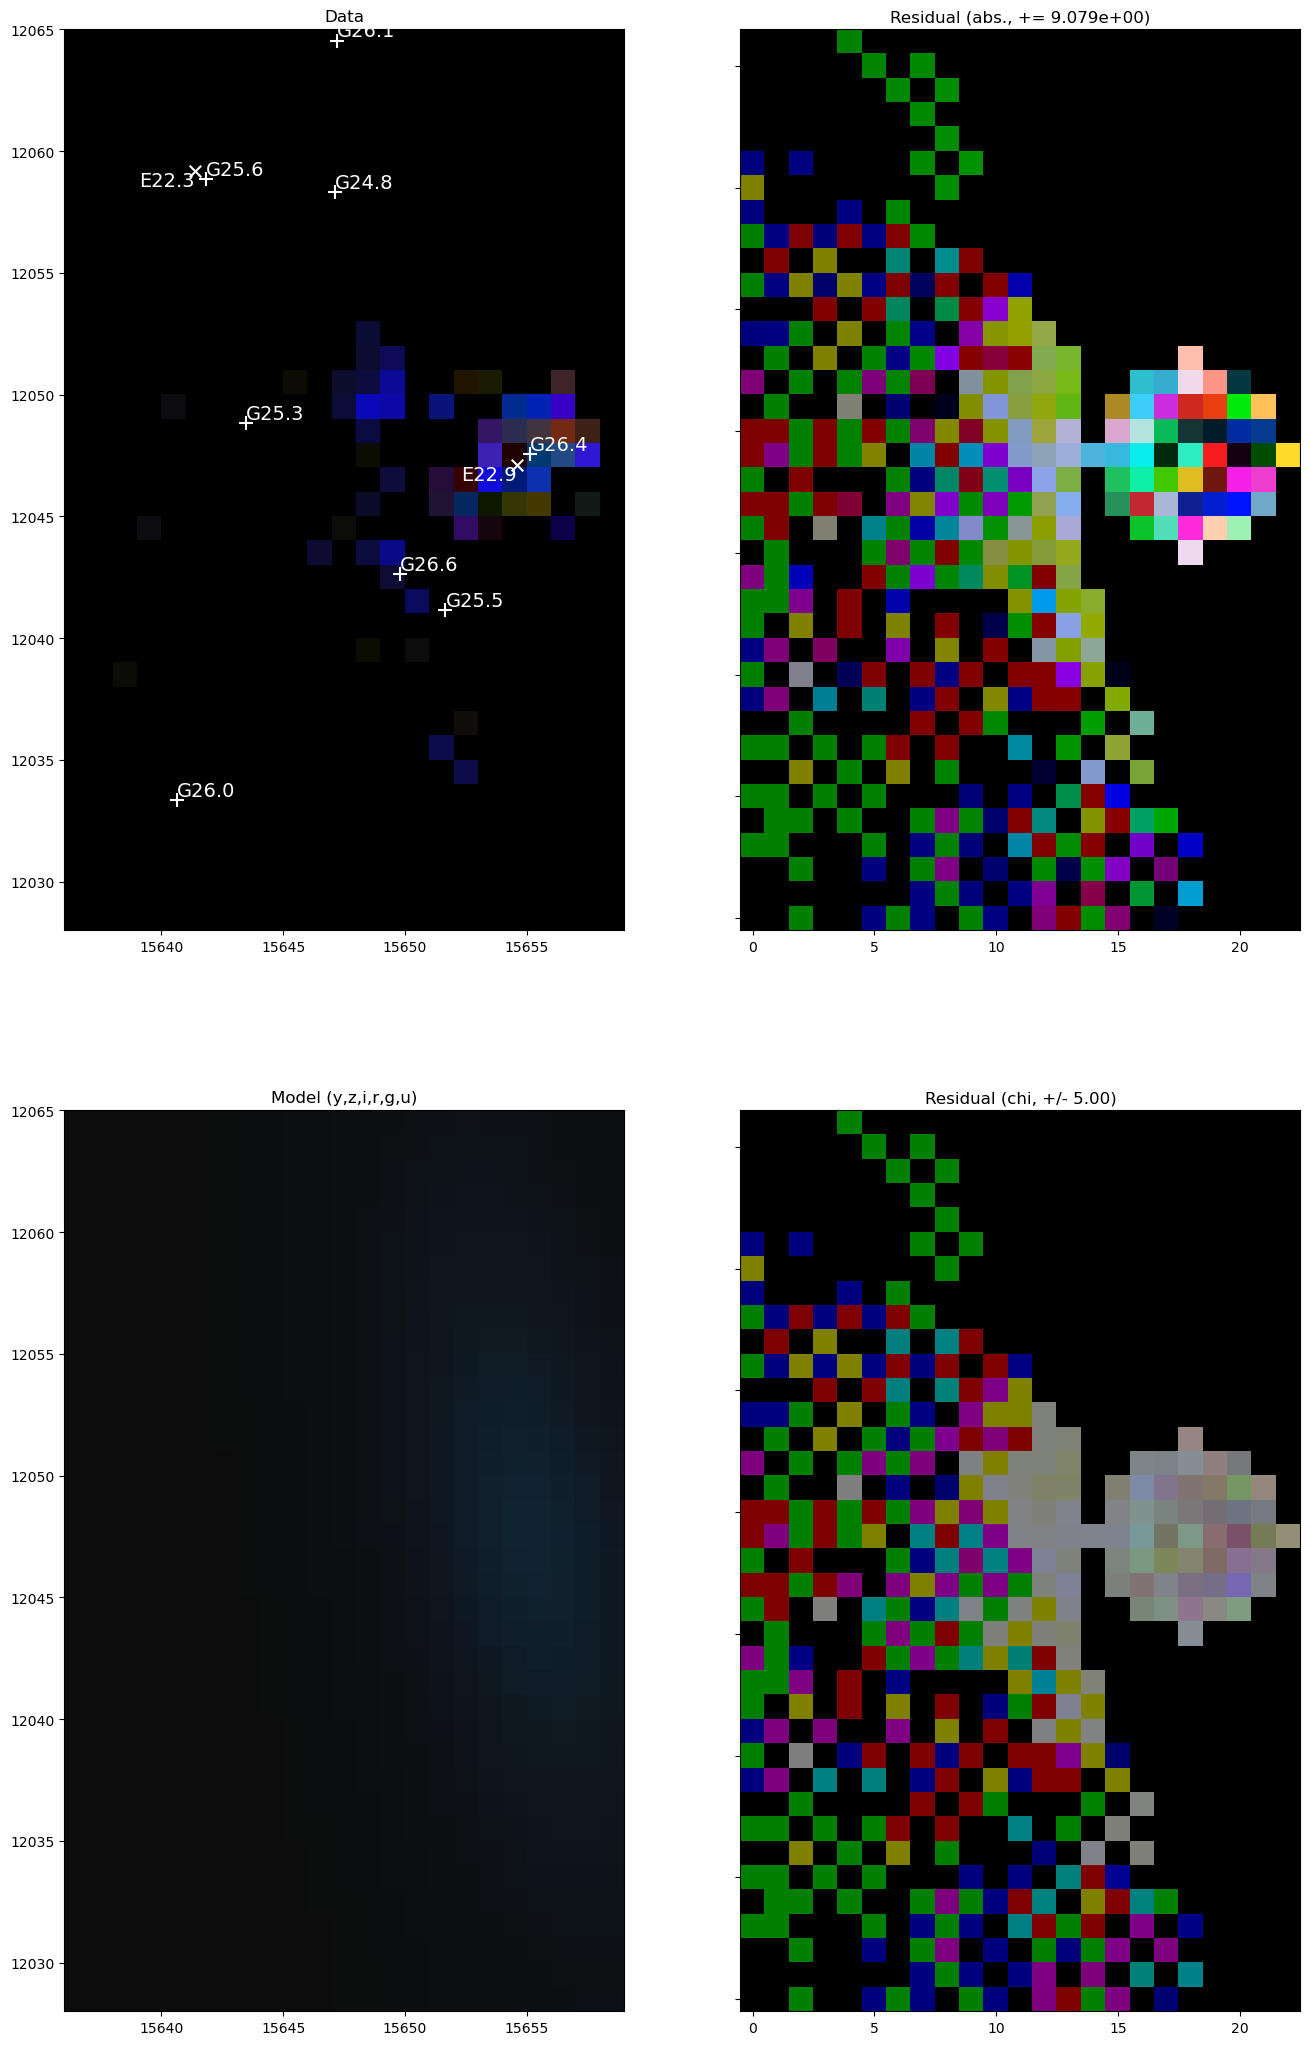

Model: cModel
Model: ser_fixedcen


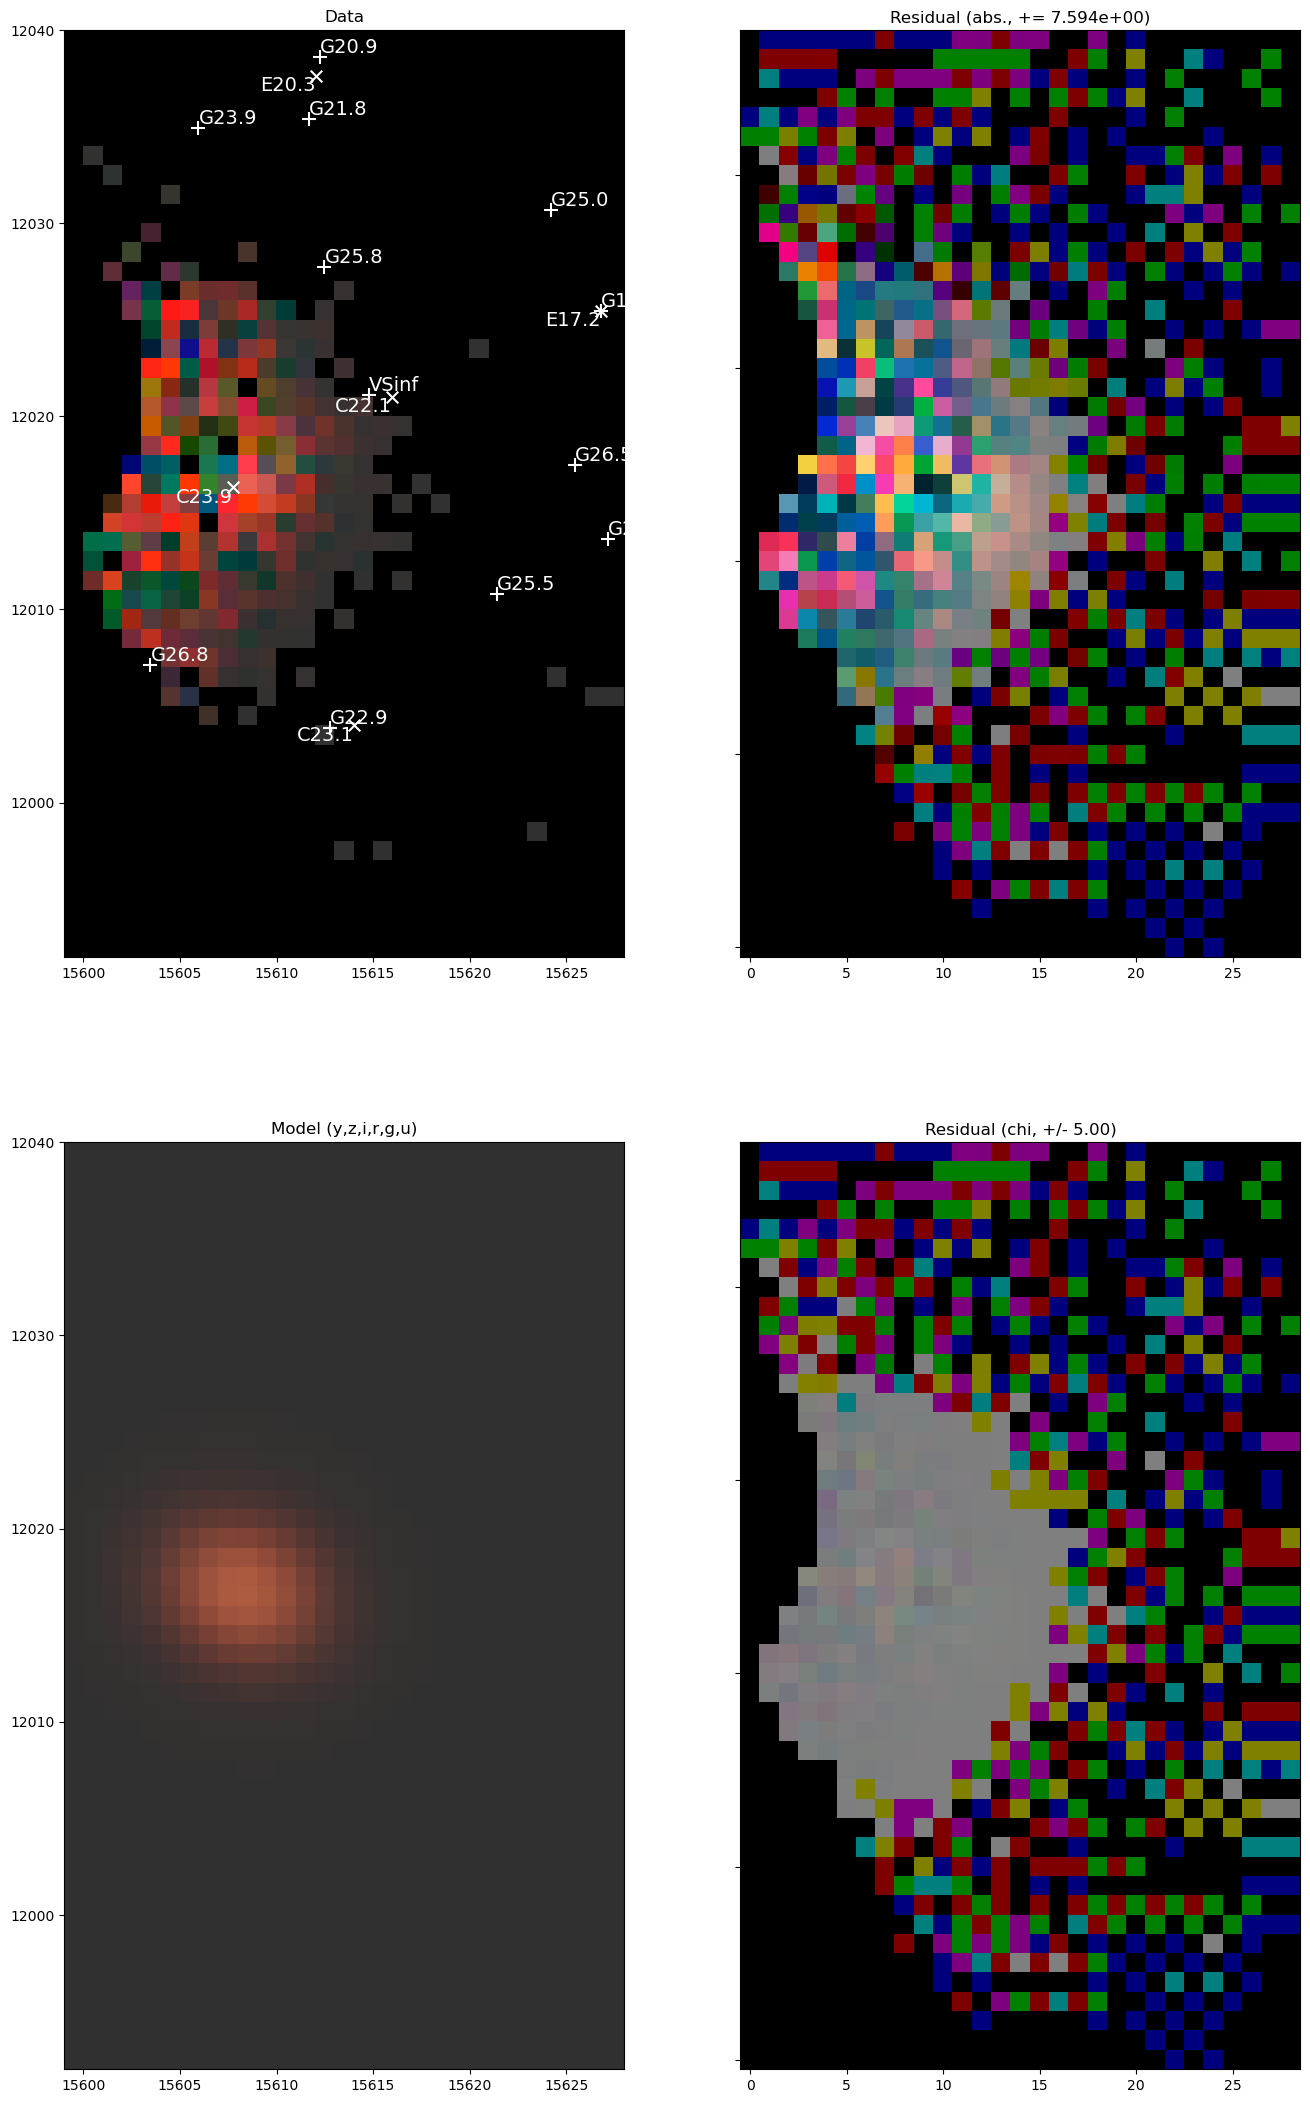

Model: ser


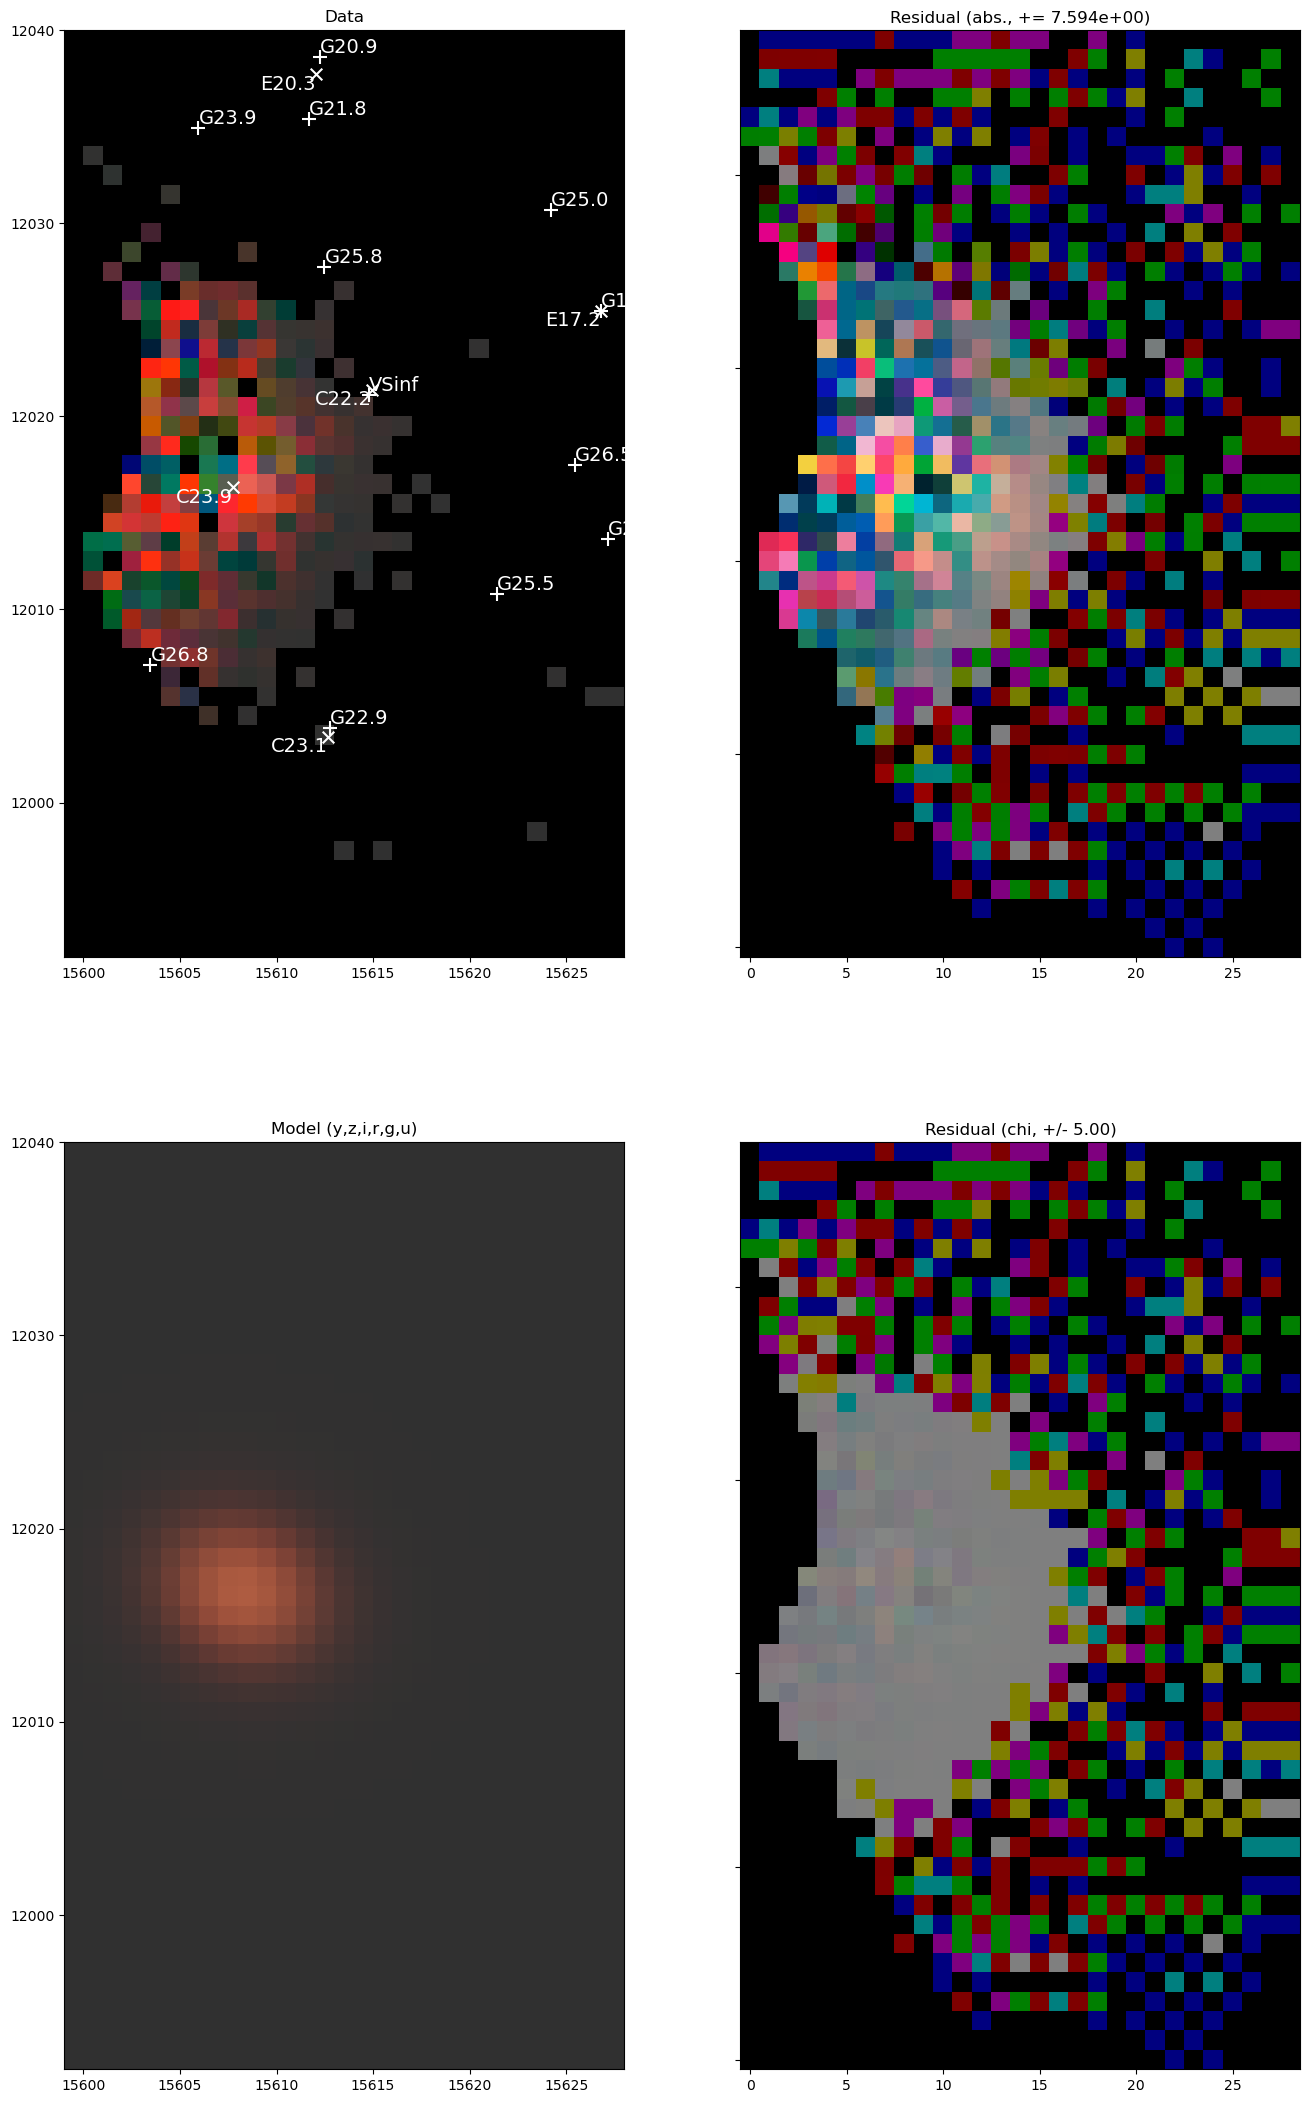

In [7]:
# plot the biggest blend that gets processed in ci_imsim
ra_ref, dec_ref = (x*np.pi/180 for x in (56.53716733, -36.55586800))
row_parent = np.where(
    np.hypot(catalog_multi["coord_ra"] - ra_ref, catalog_multi["coord_dec"] - dec_ref) < dradec
)[0][0]

fig_rgb, ax_rgb, fig_gs, ax_gs = plot_blend(rebuilder, row_parent, kwargs_plot_parent=kwargs_parent, kwargs_plot_children=kwargs_children)

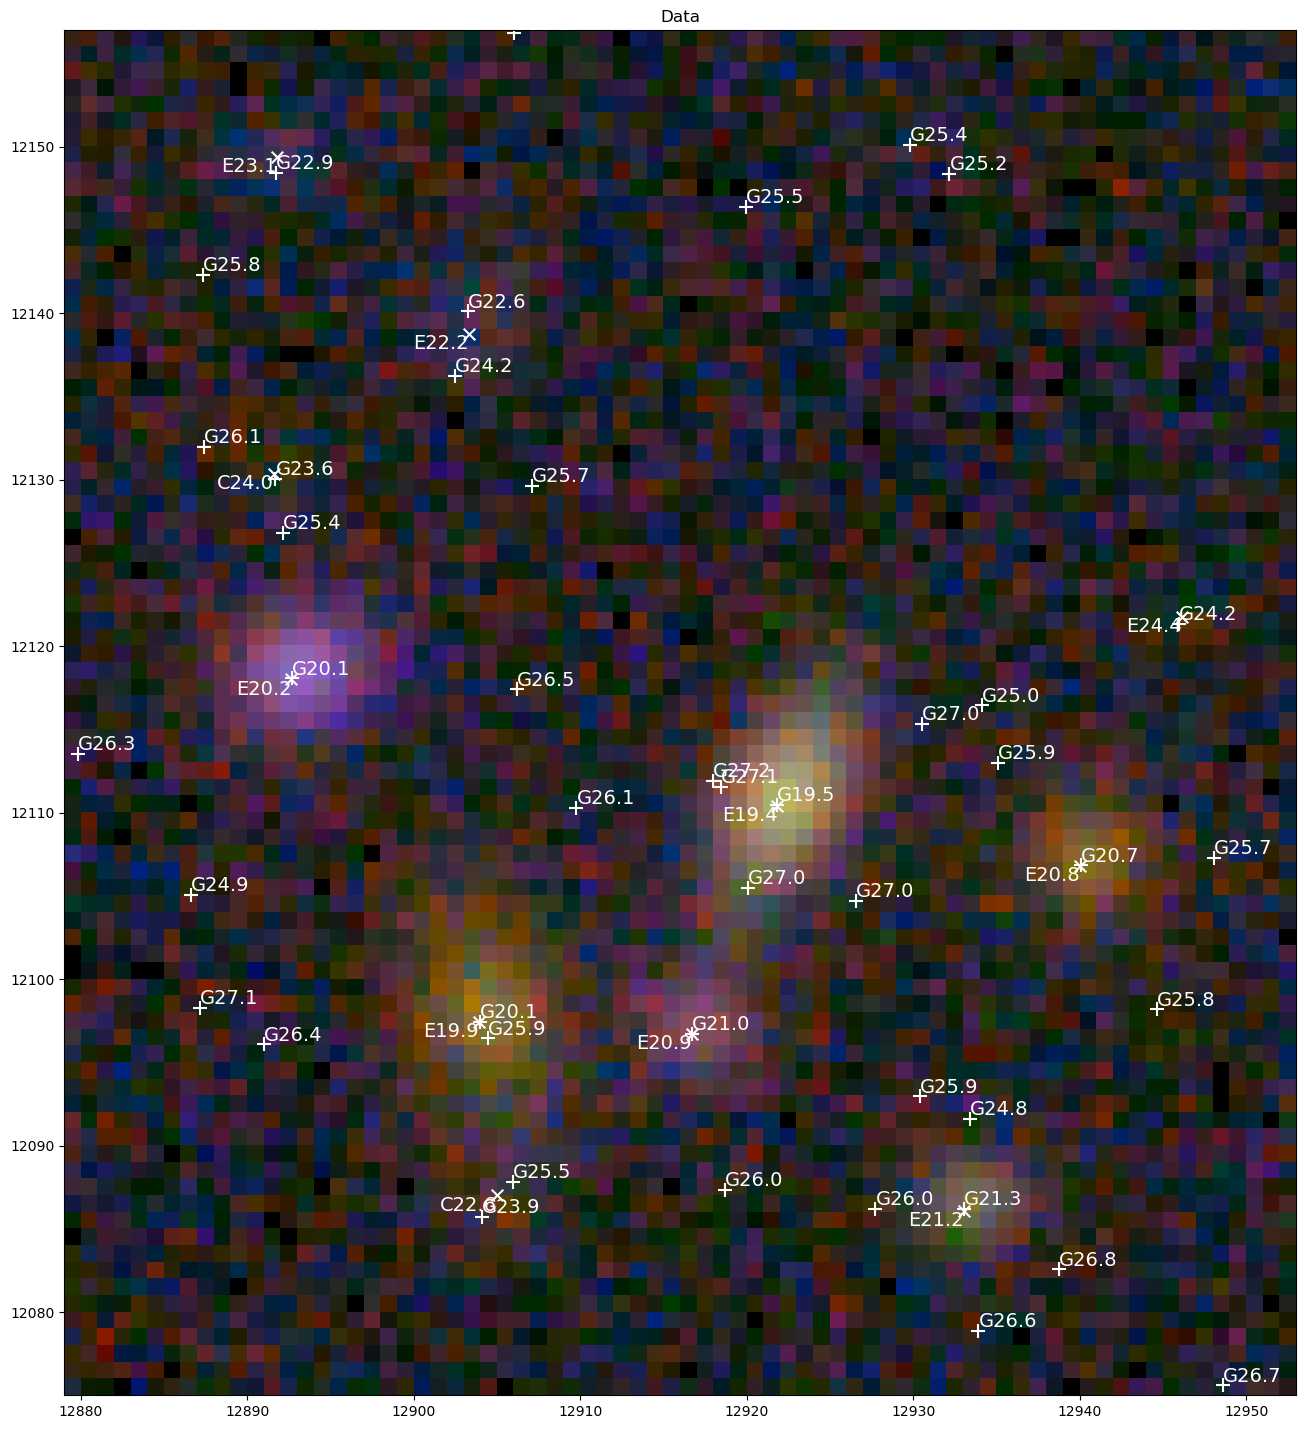

Model: cModel
Model: ser_fixedcen


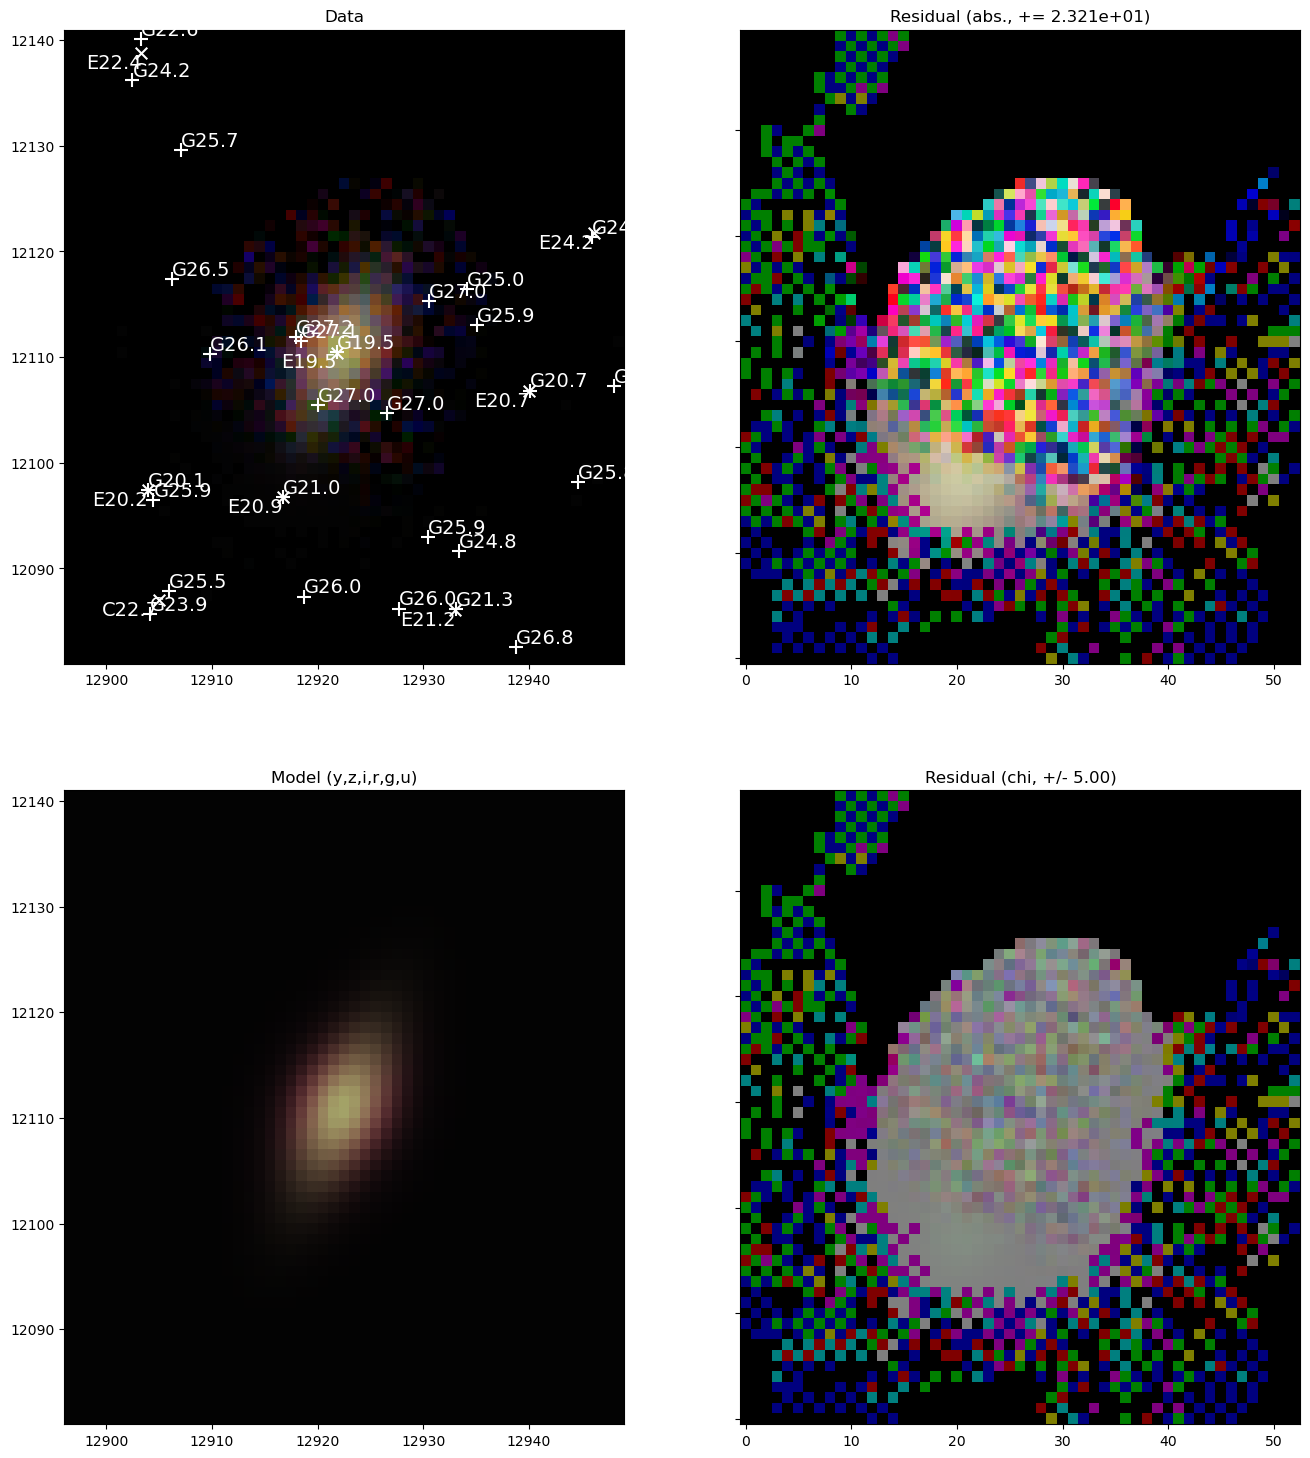

Model: ser


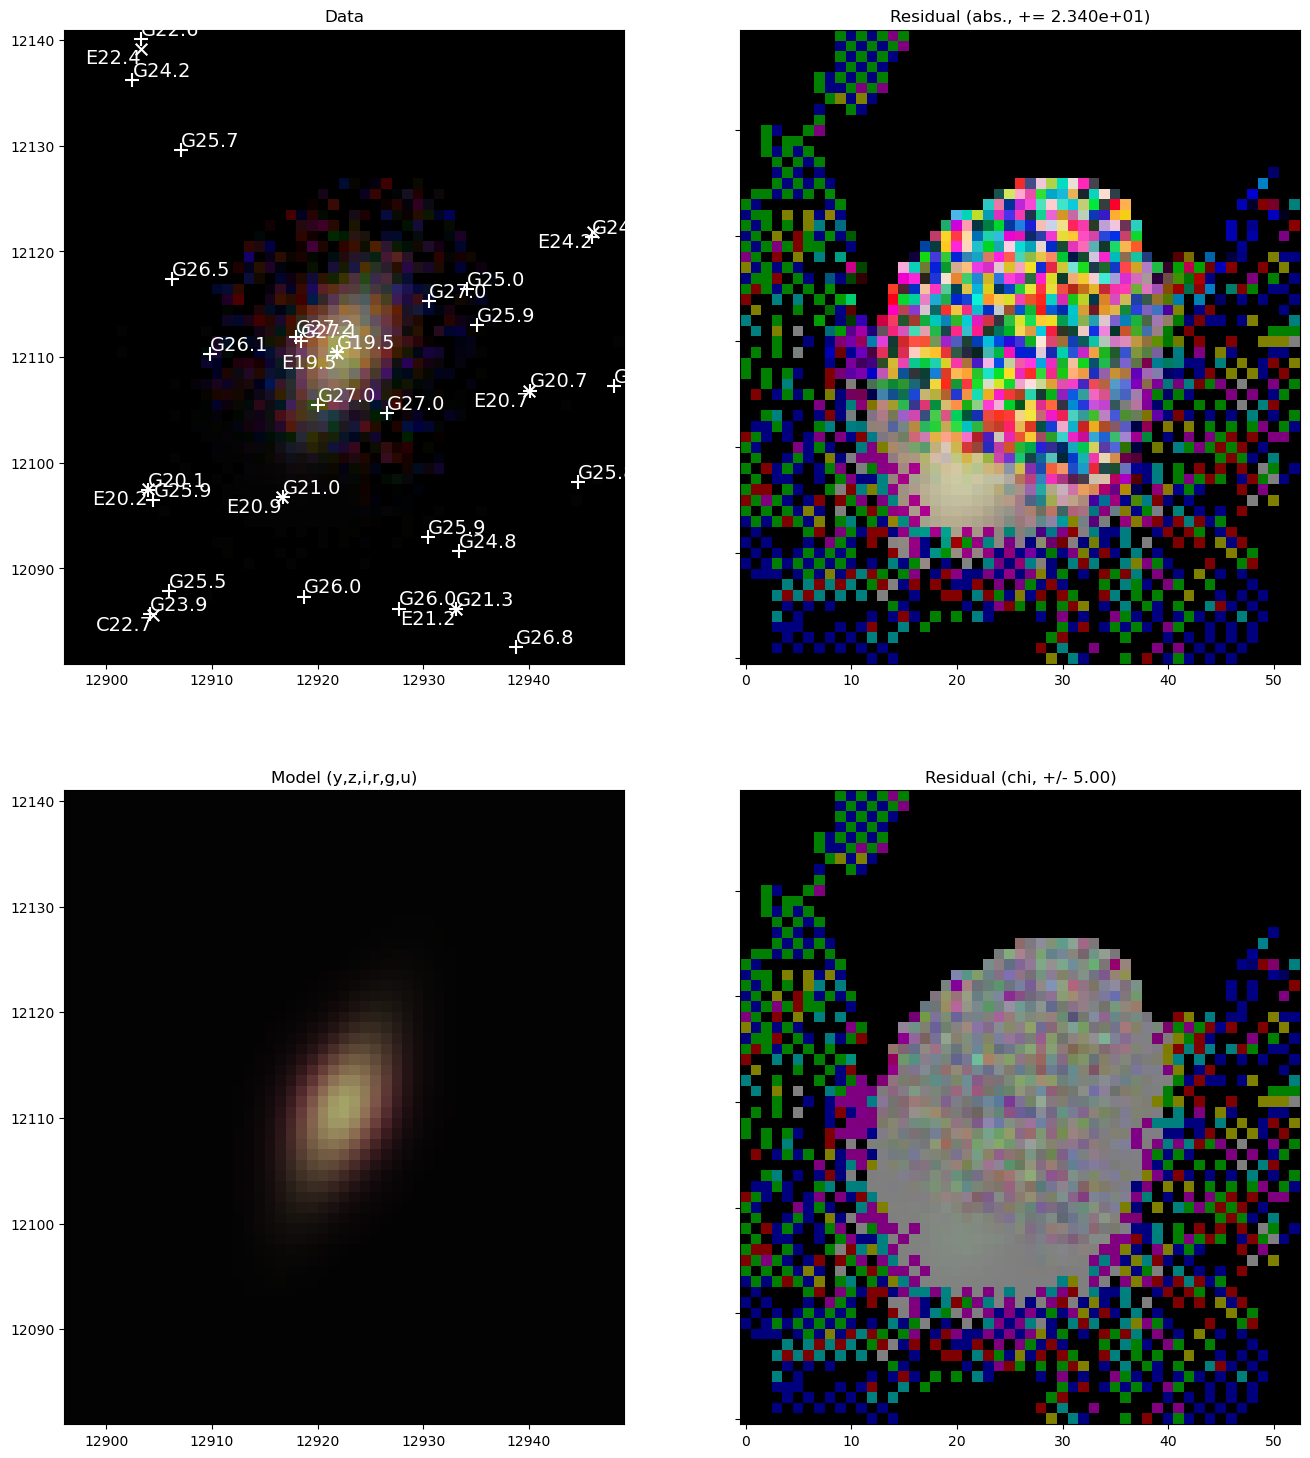

Model: cModel
Model: ser_fixedcen


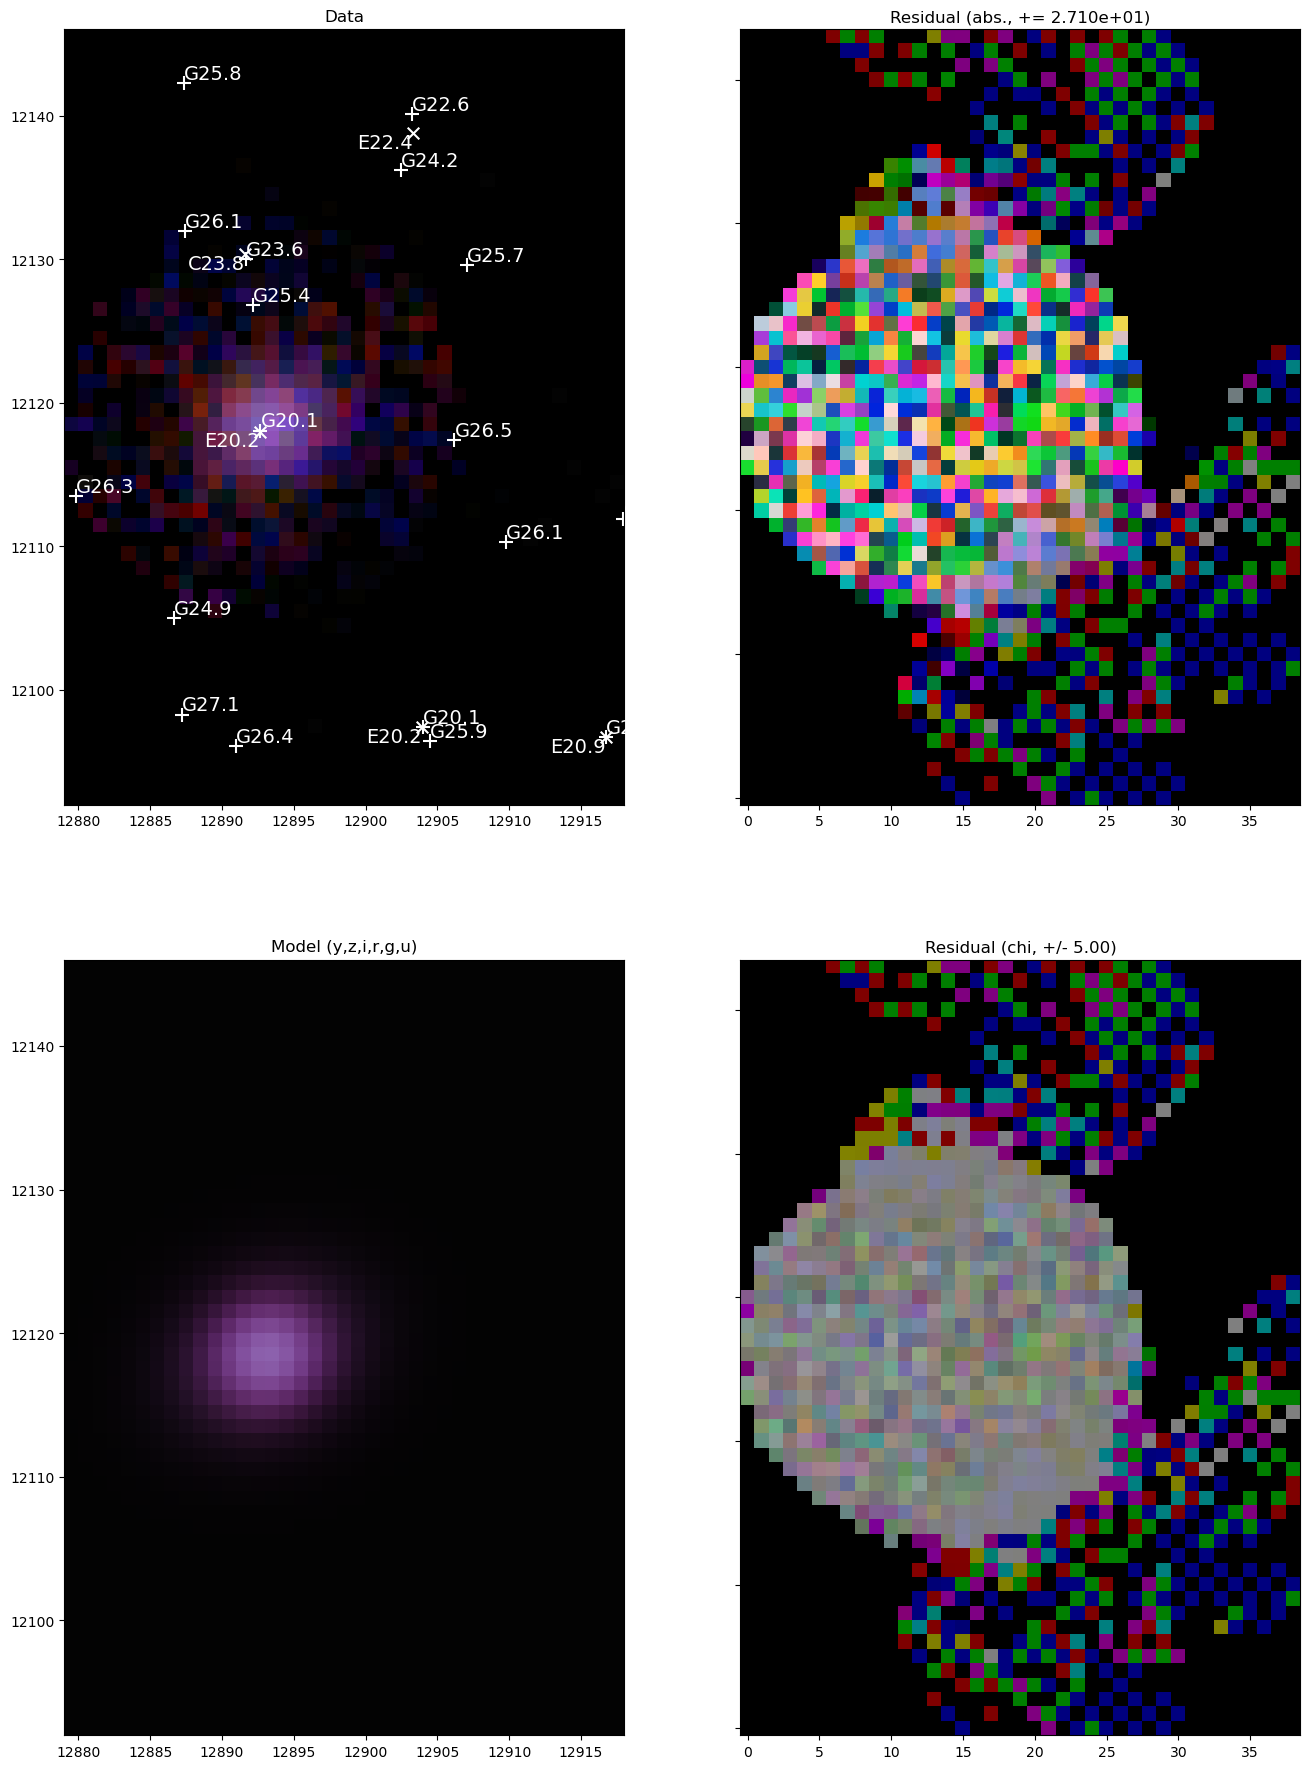

Model: ser


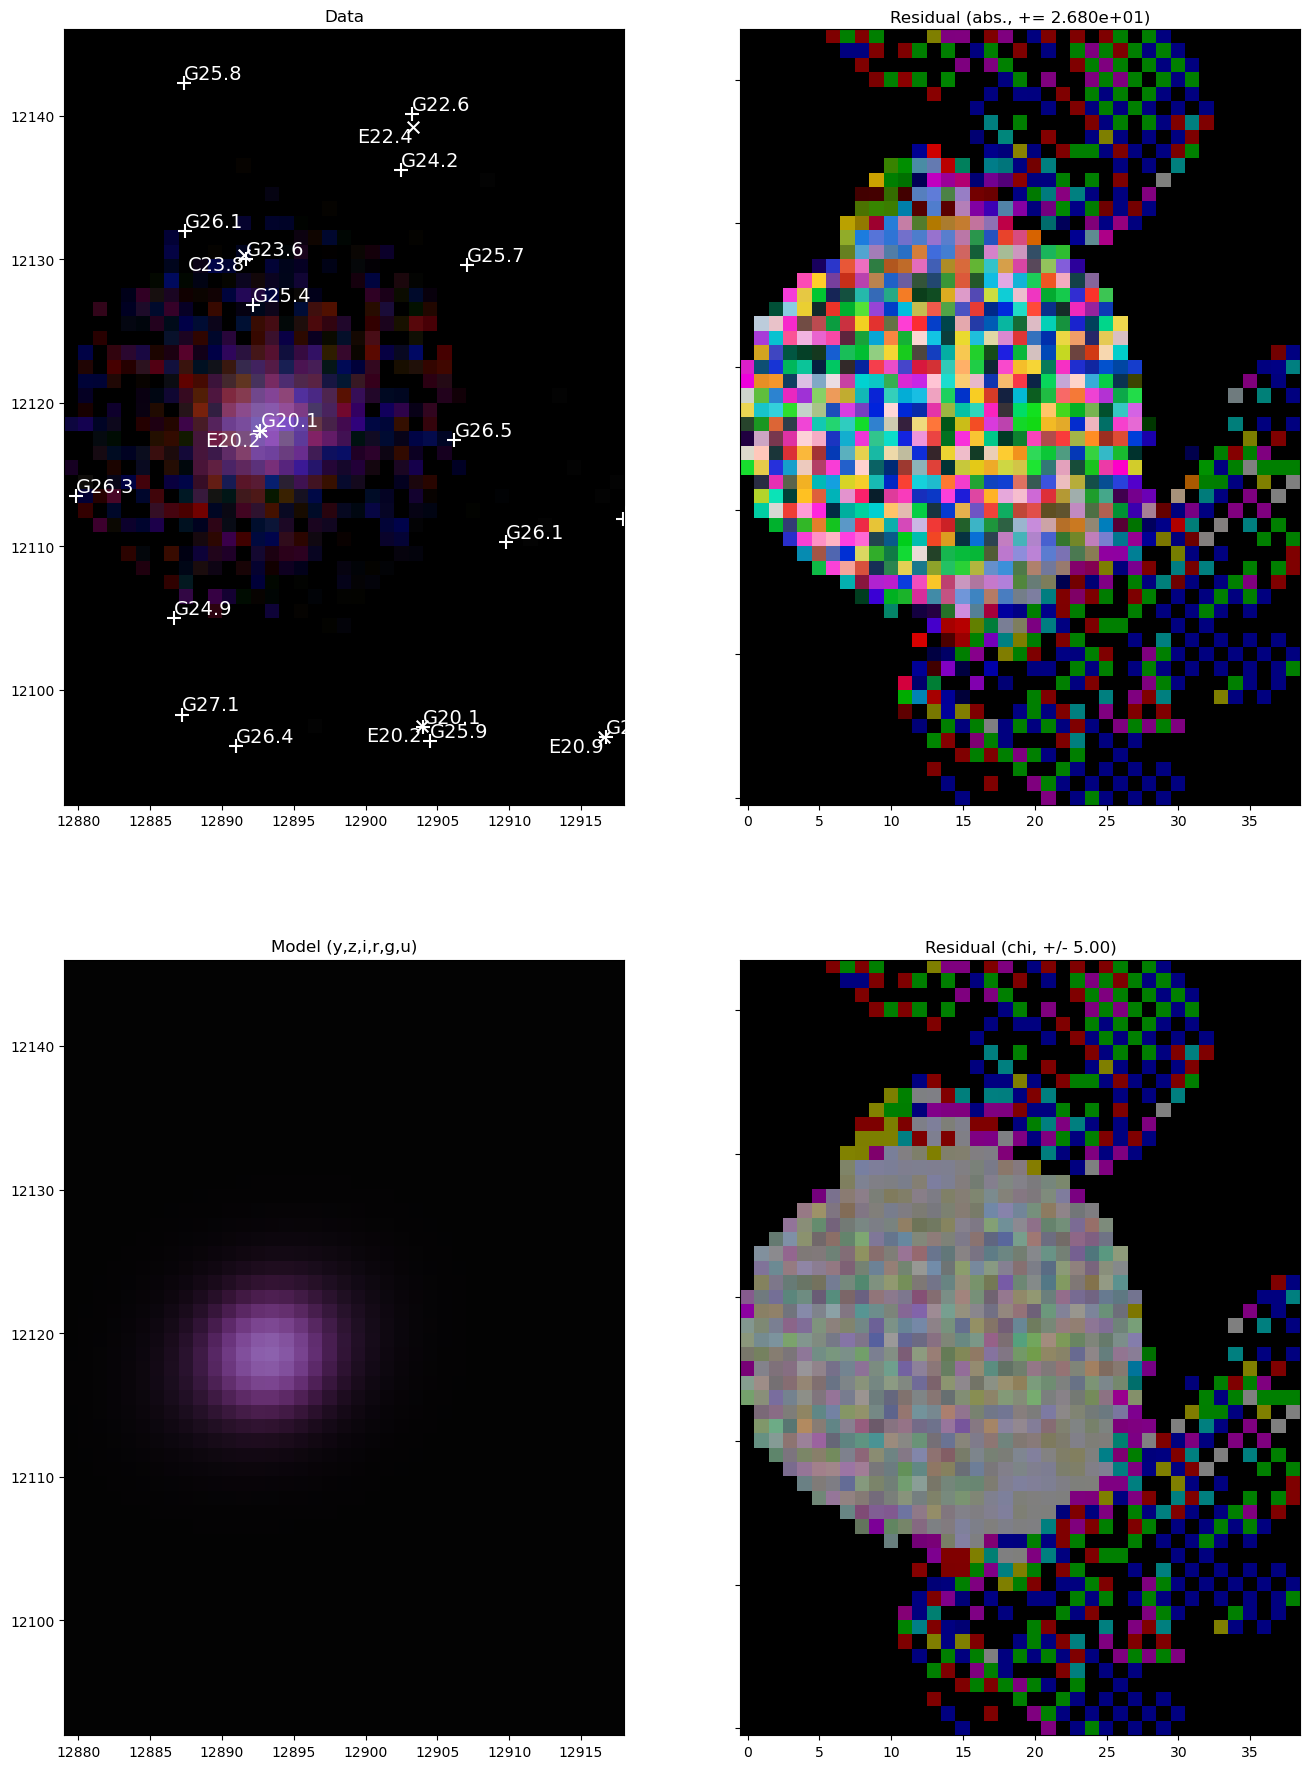

Model: cModel
Model: ser_fixedcen


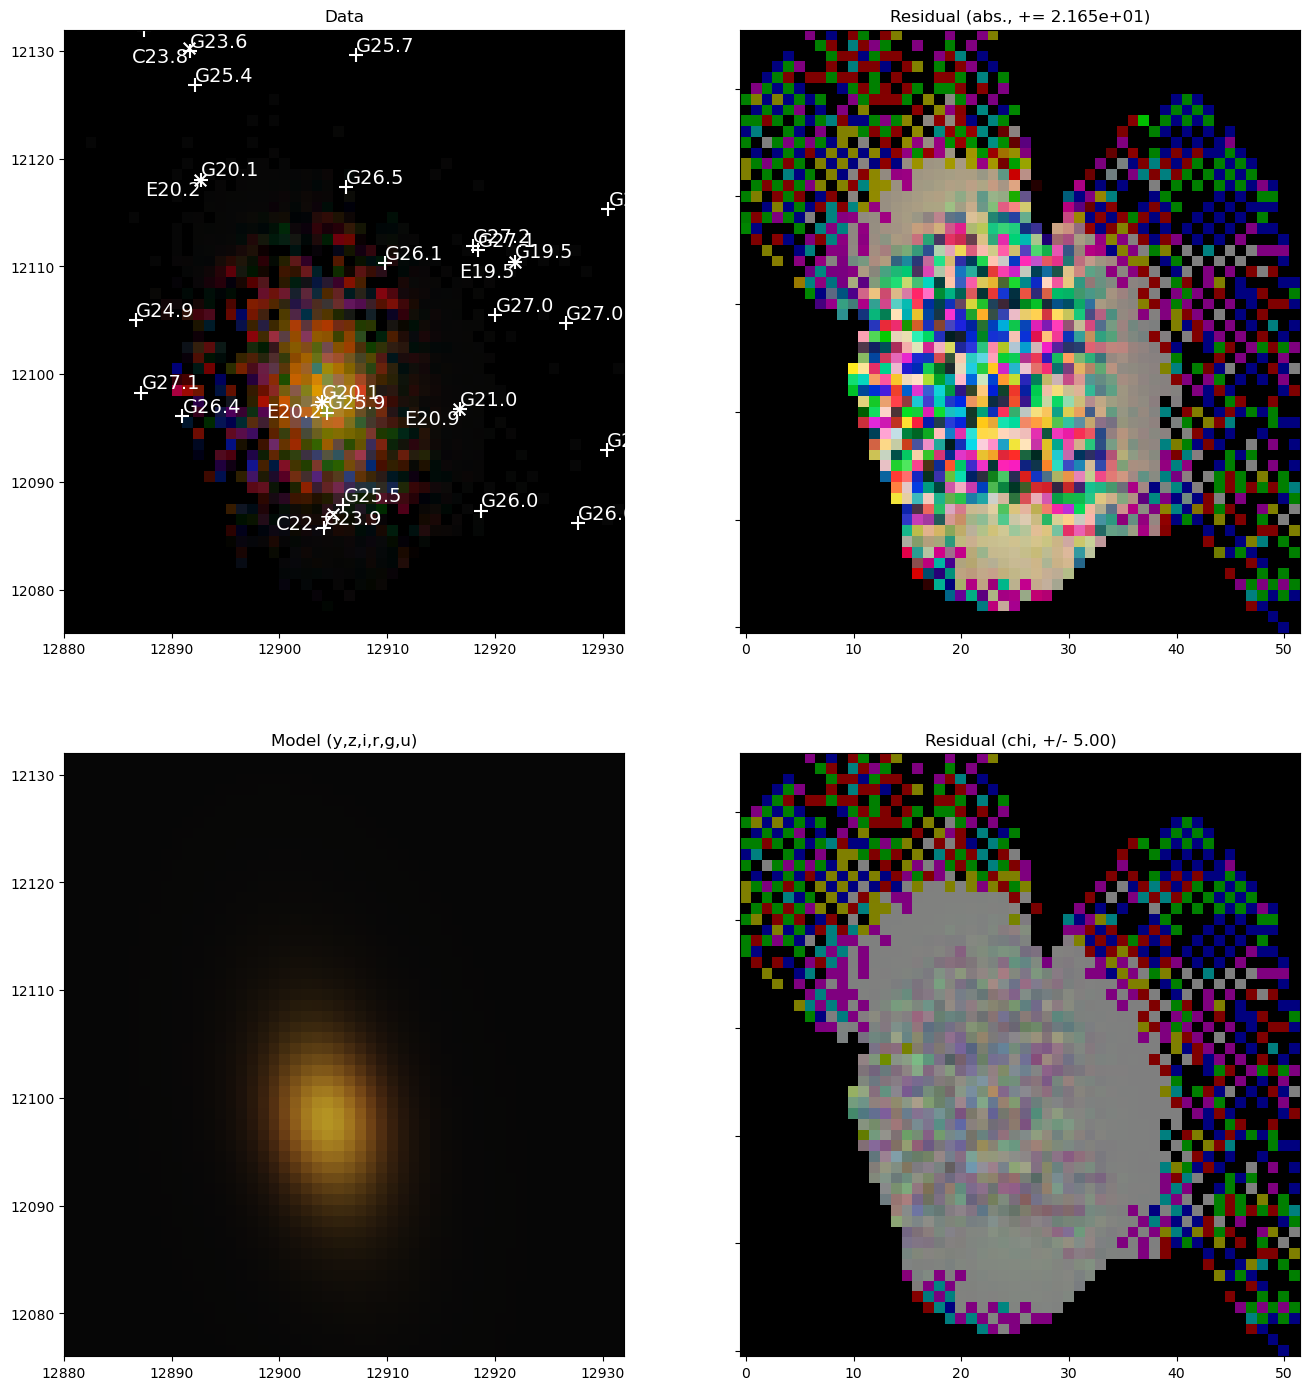

Model: ser


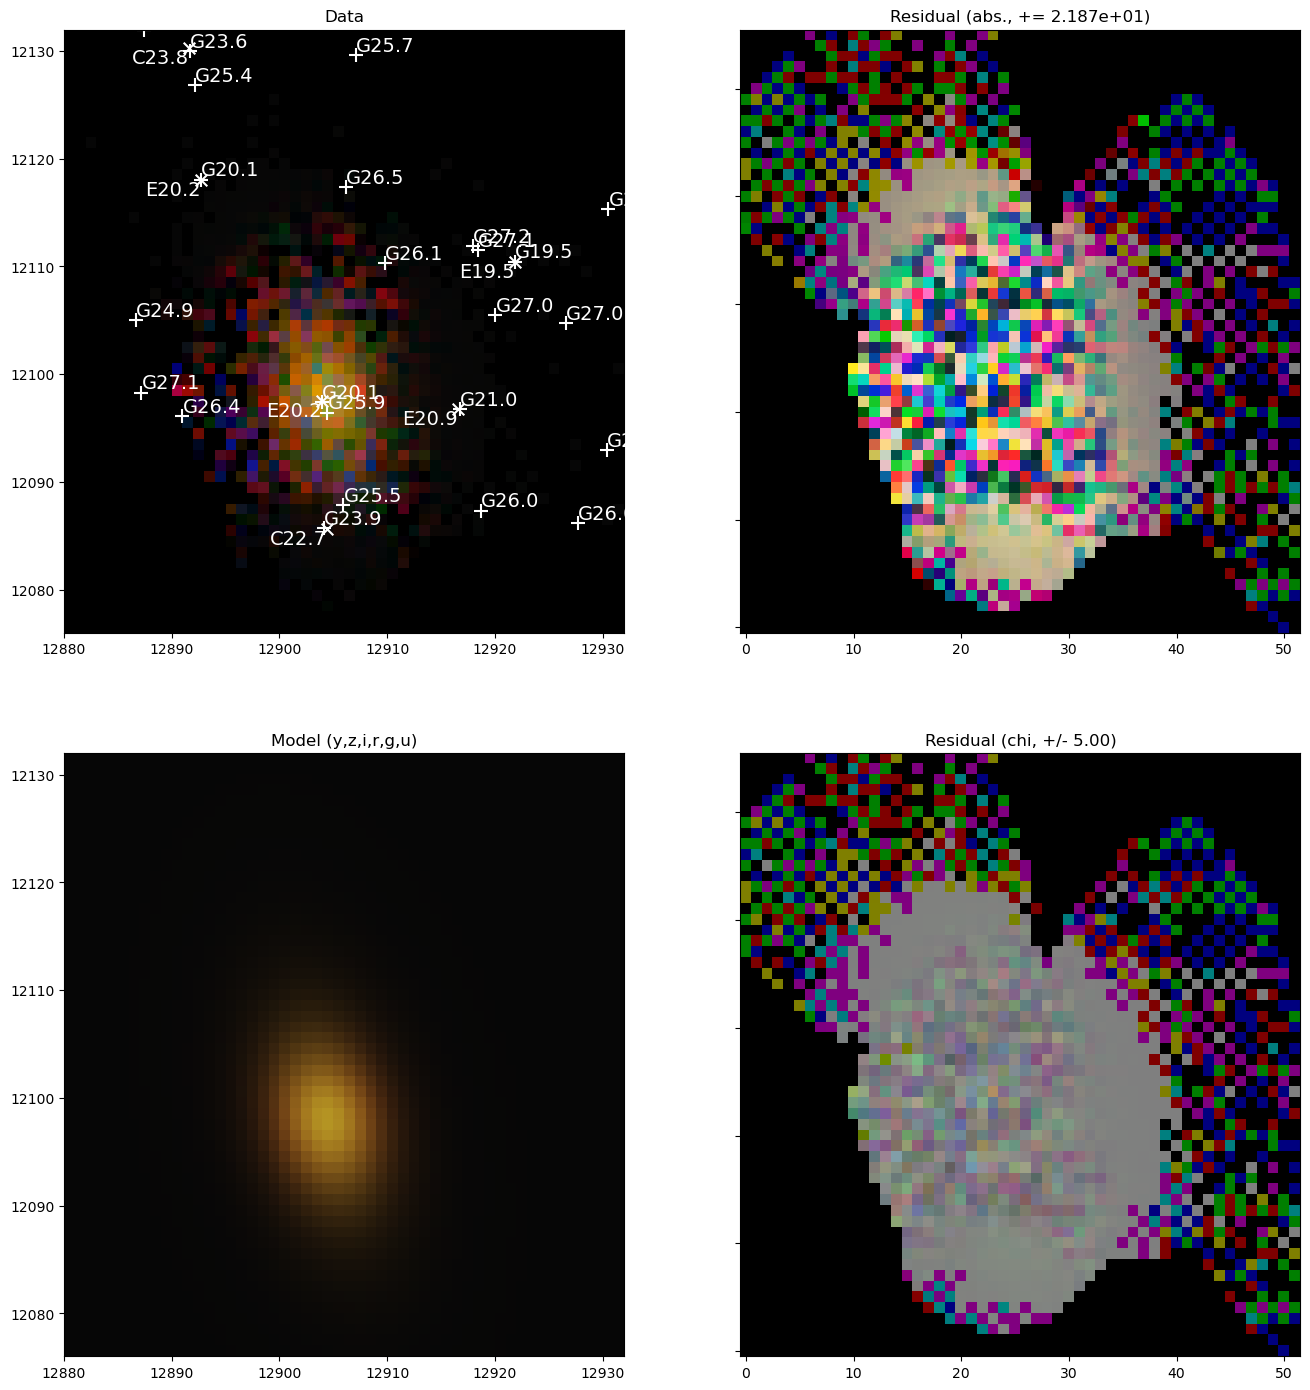

Model: cModel
Model: ser_fixedcen


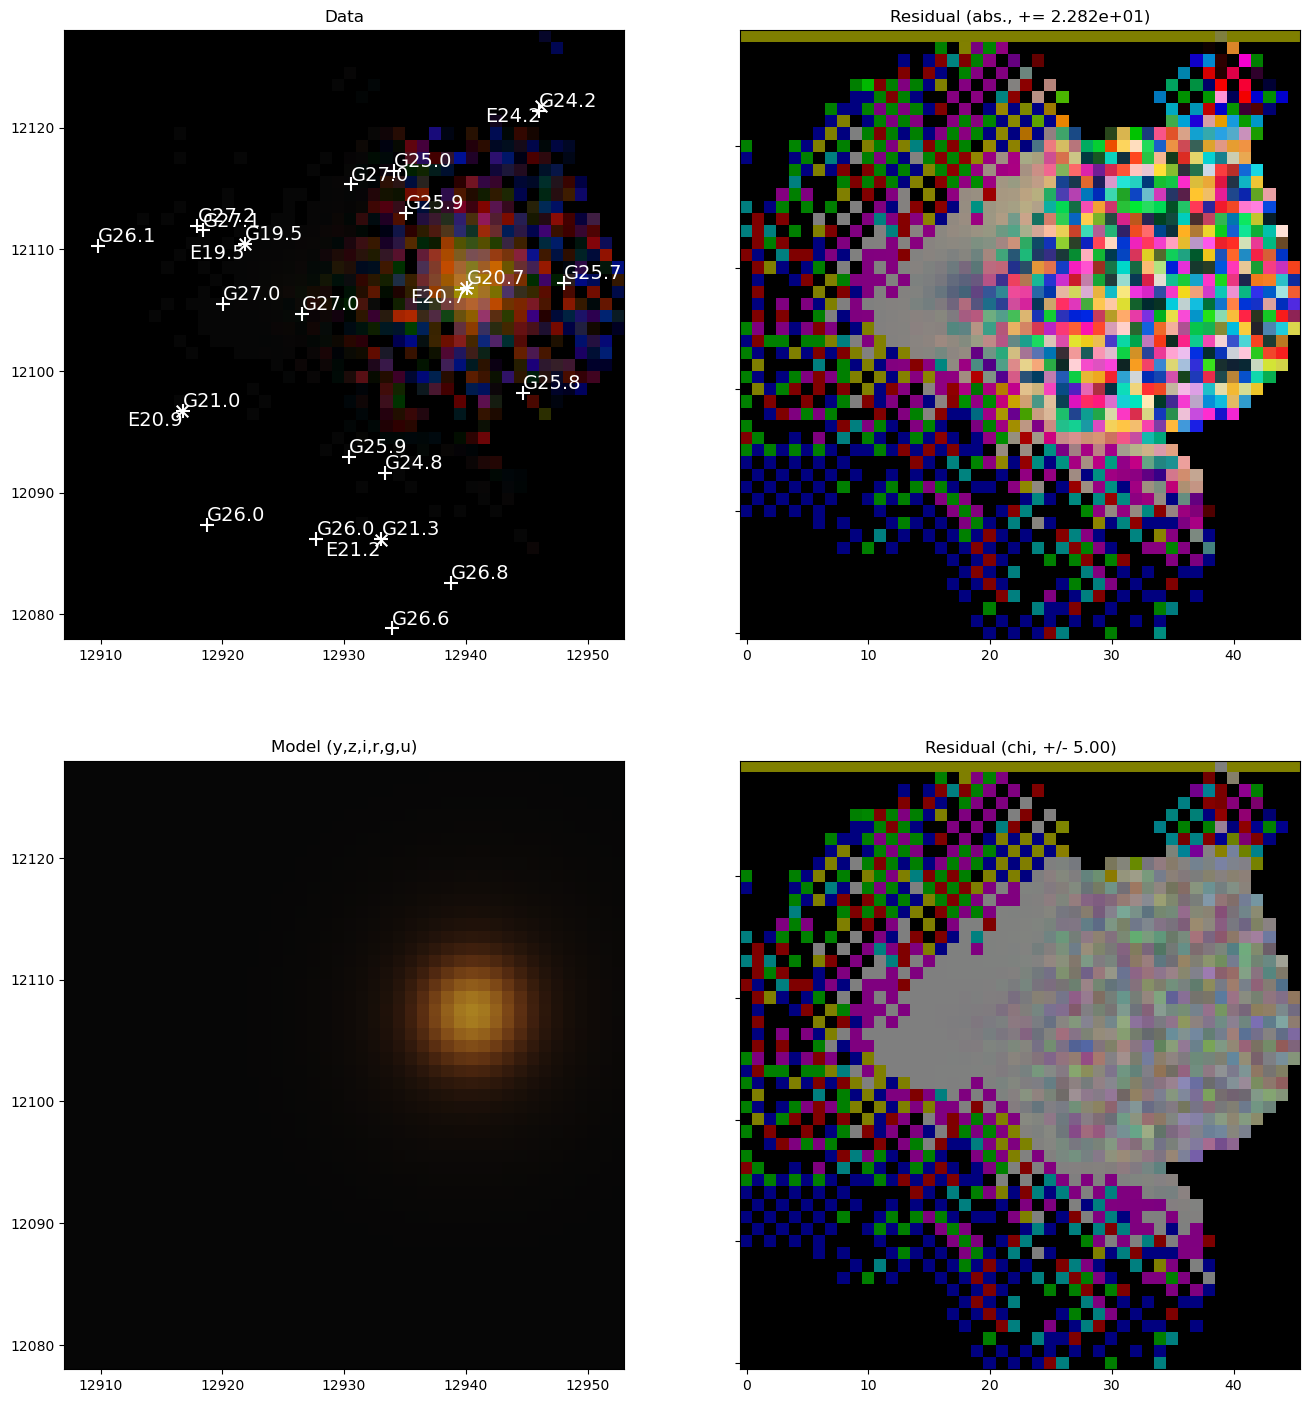

Model: ser


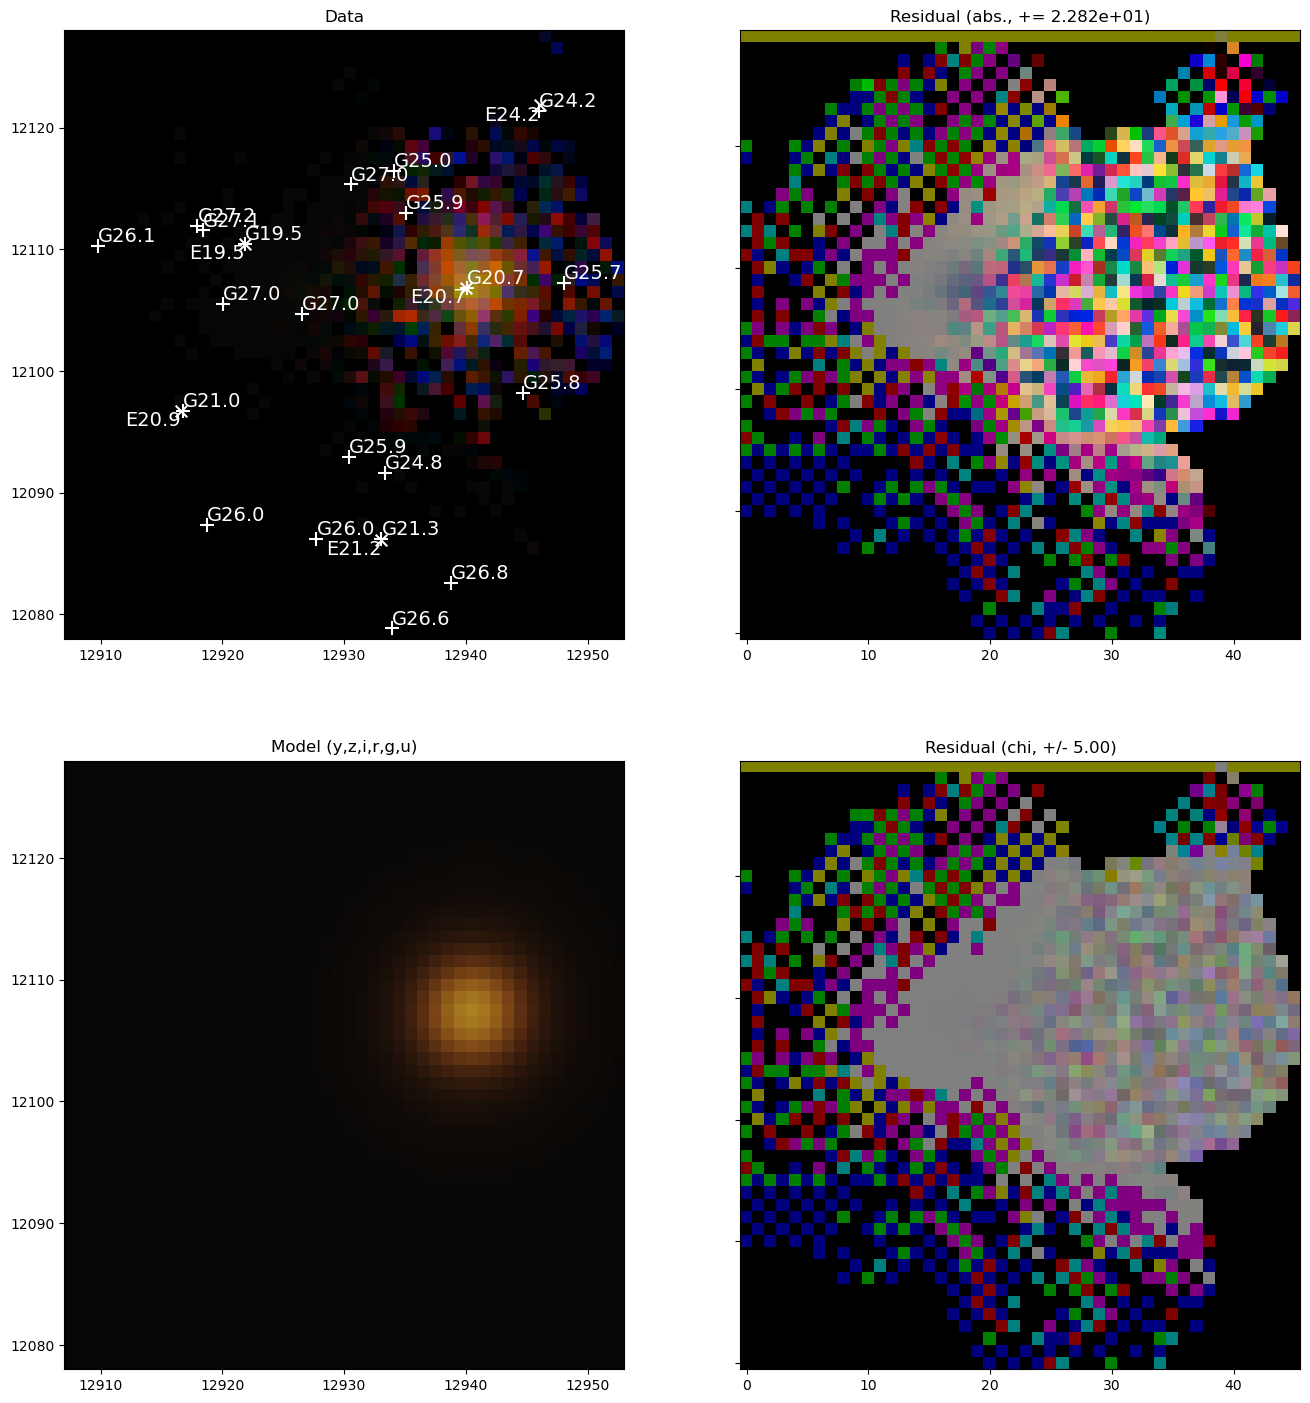

Model: cModel
Model: ser_fixedcen


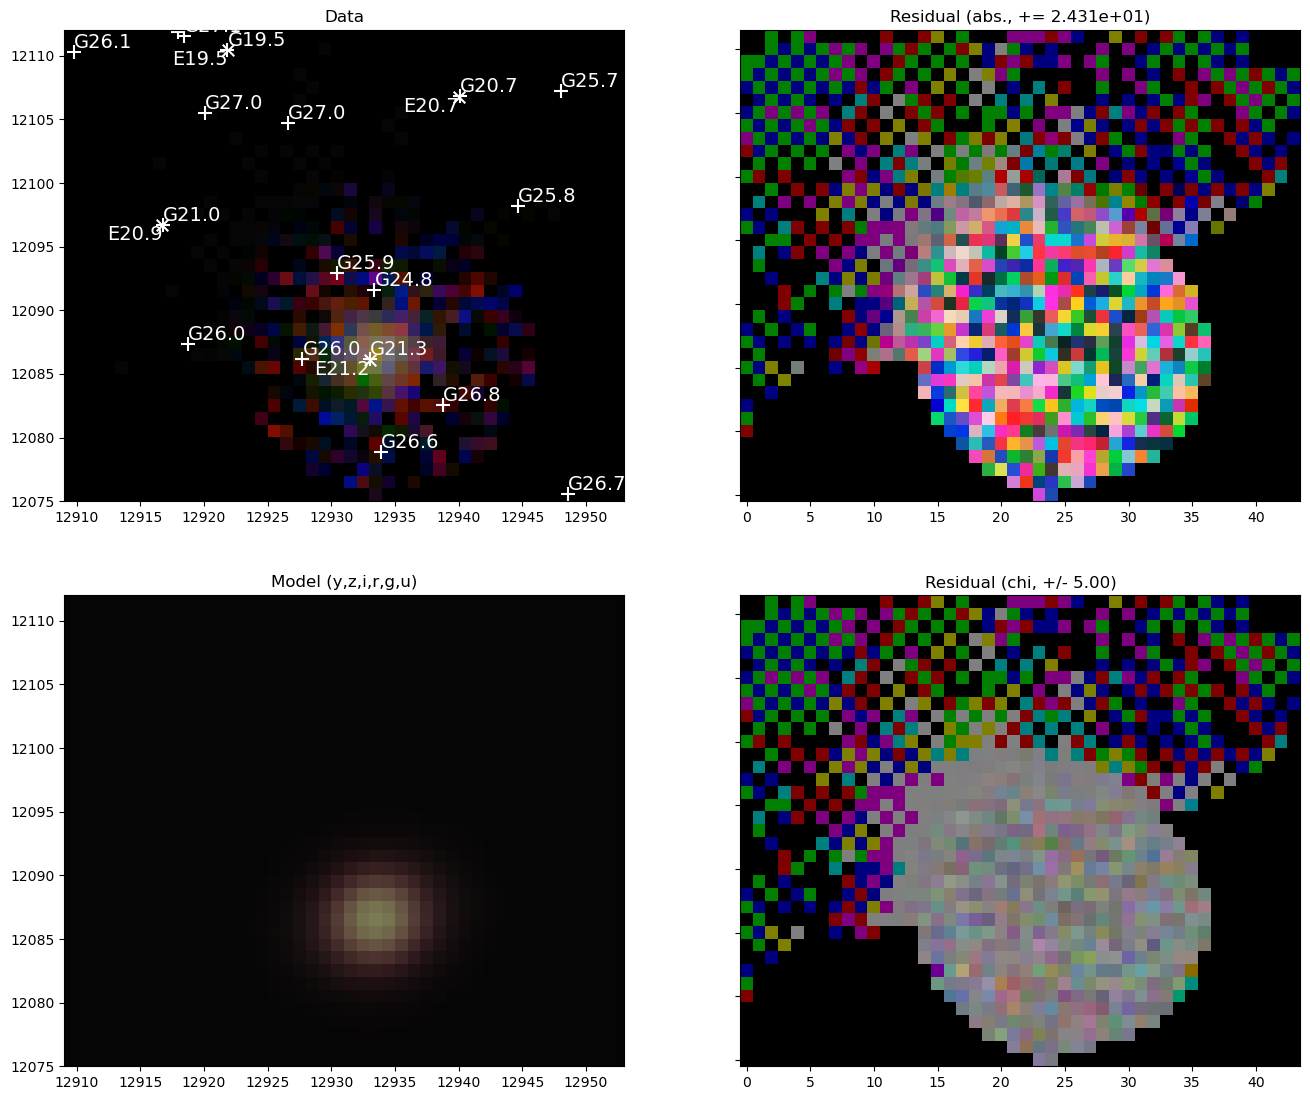

Model: ser


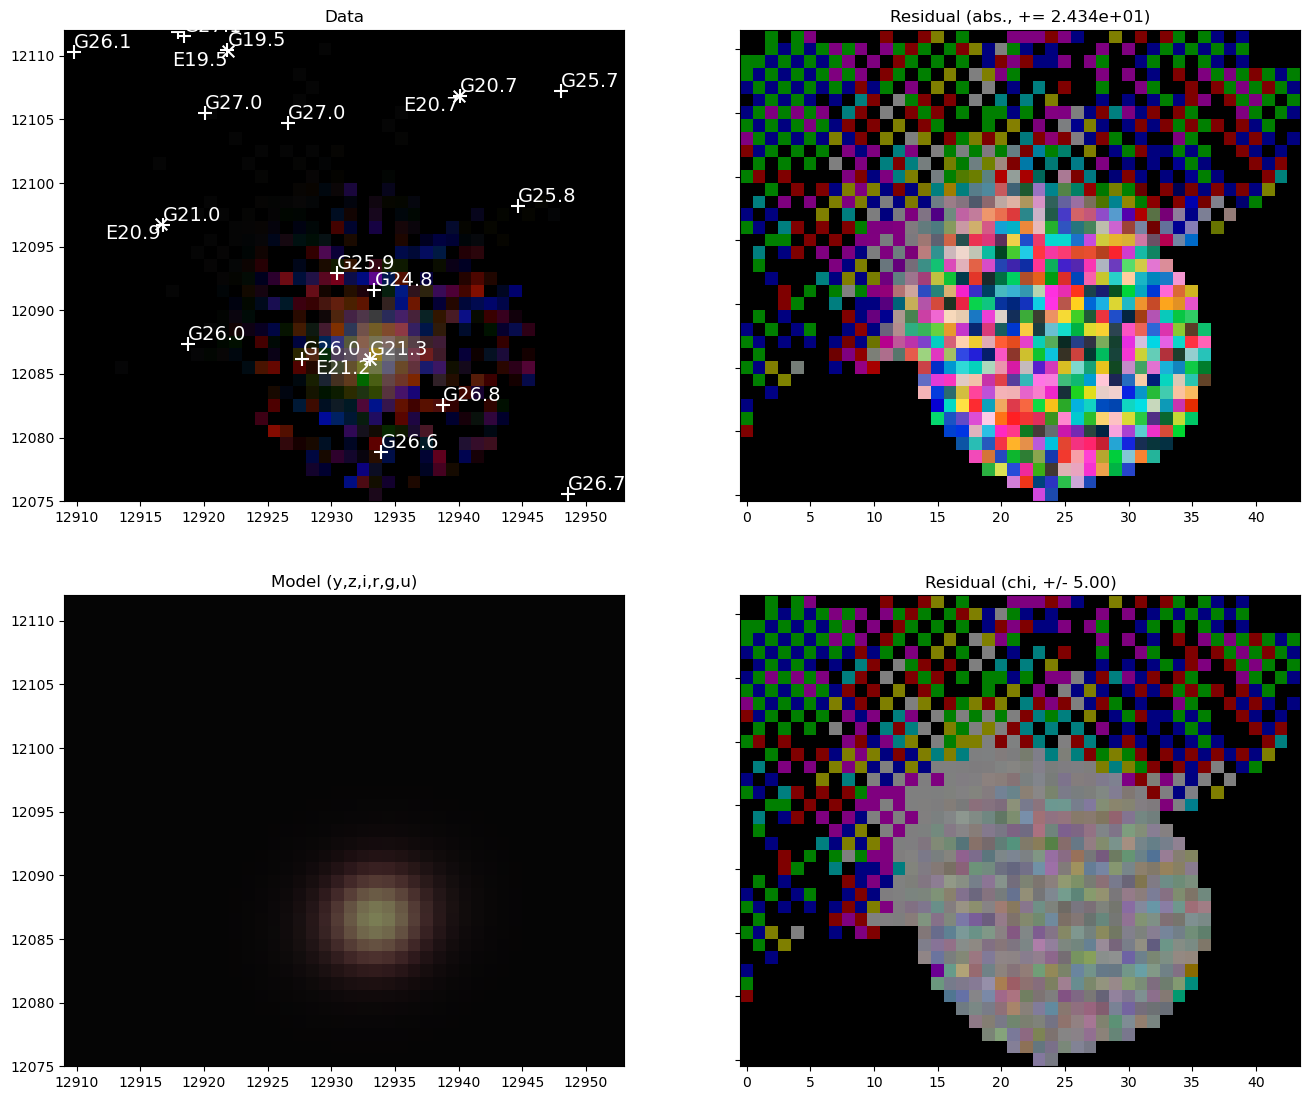

Model: cModel
Model: ser_fixedcen


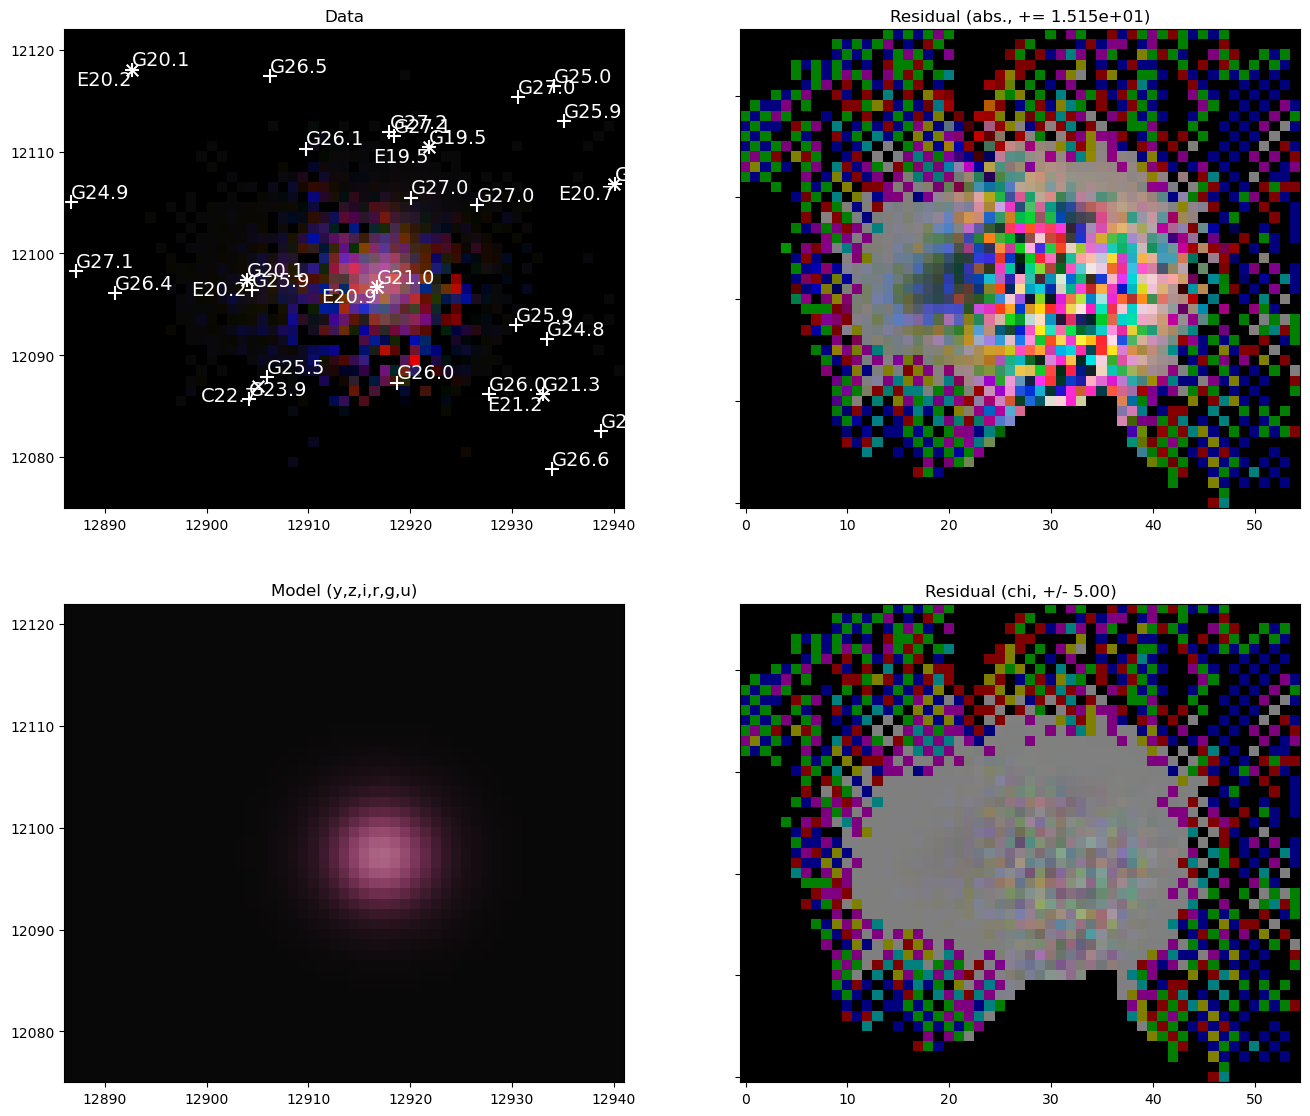

Model: ser


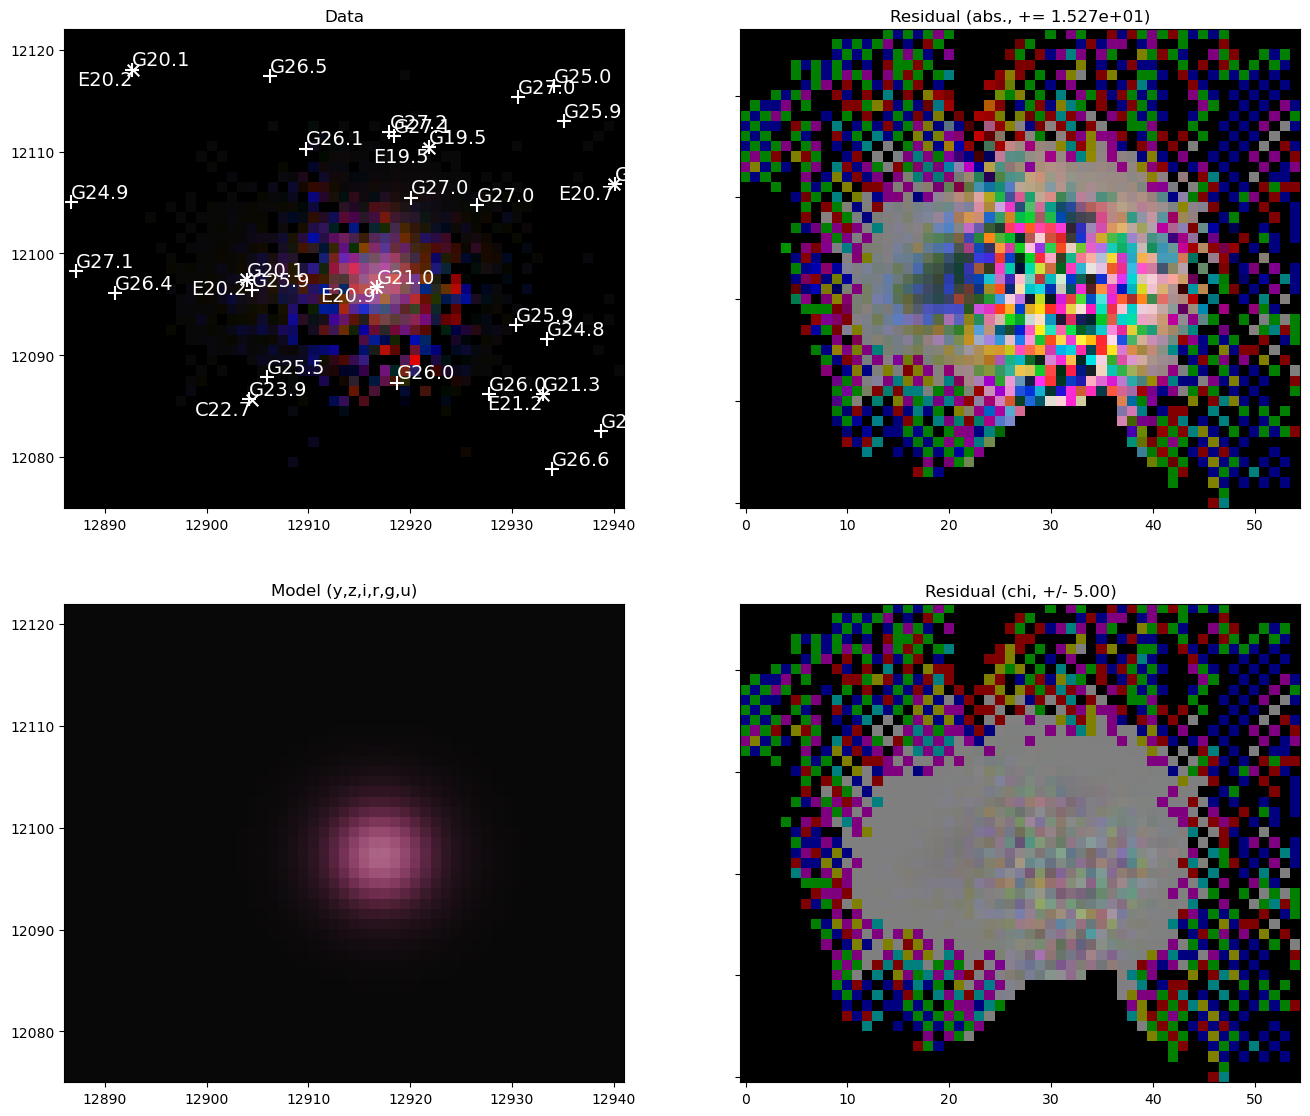

Model: cModel
Model: ser_fixedcen


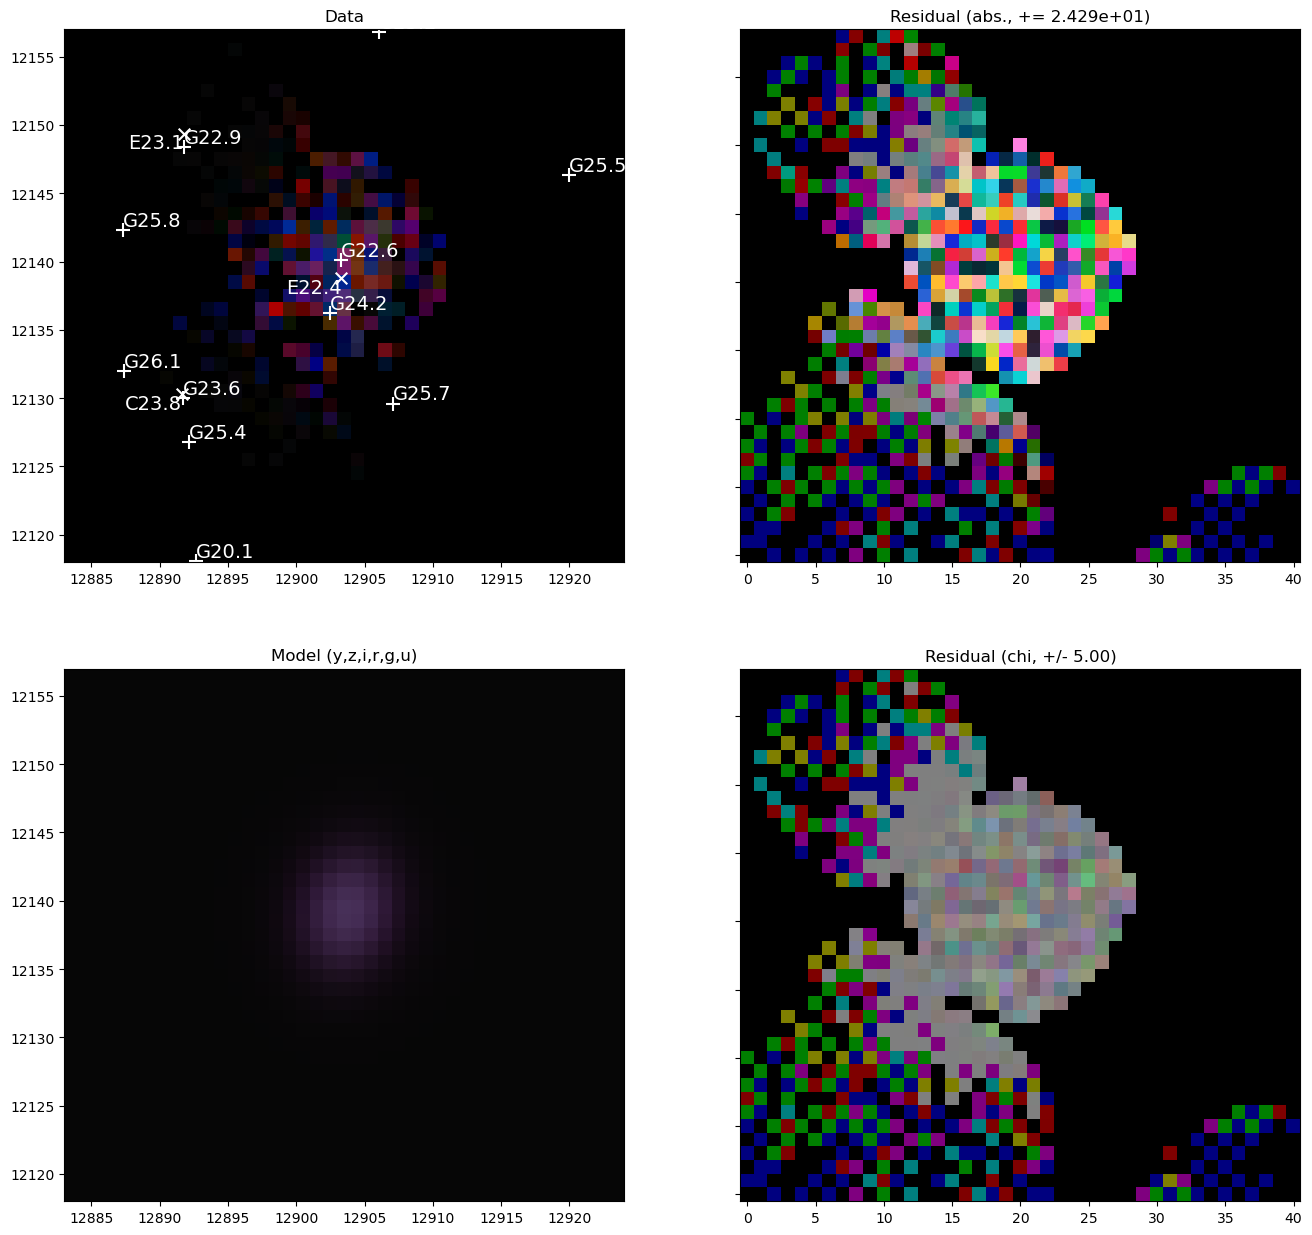

Model: ser


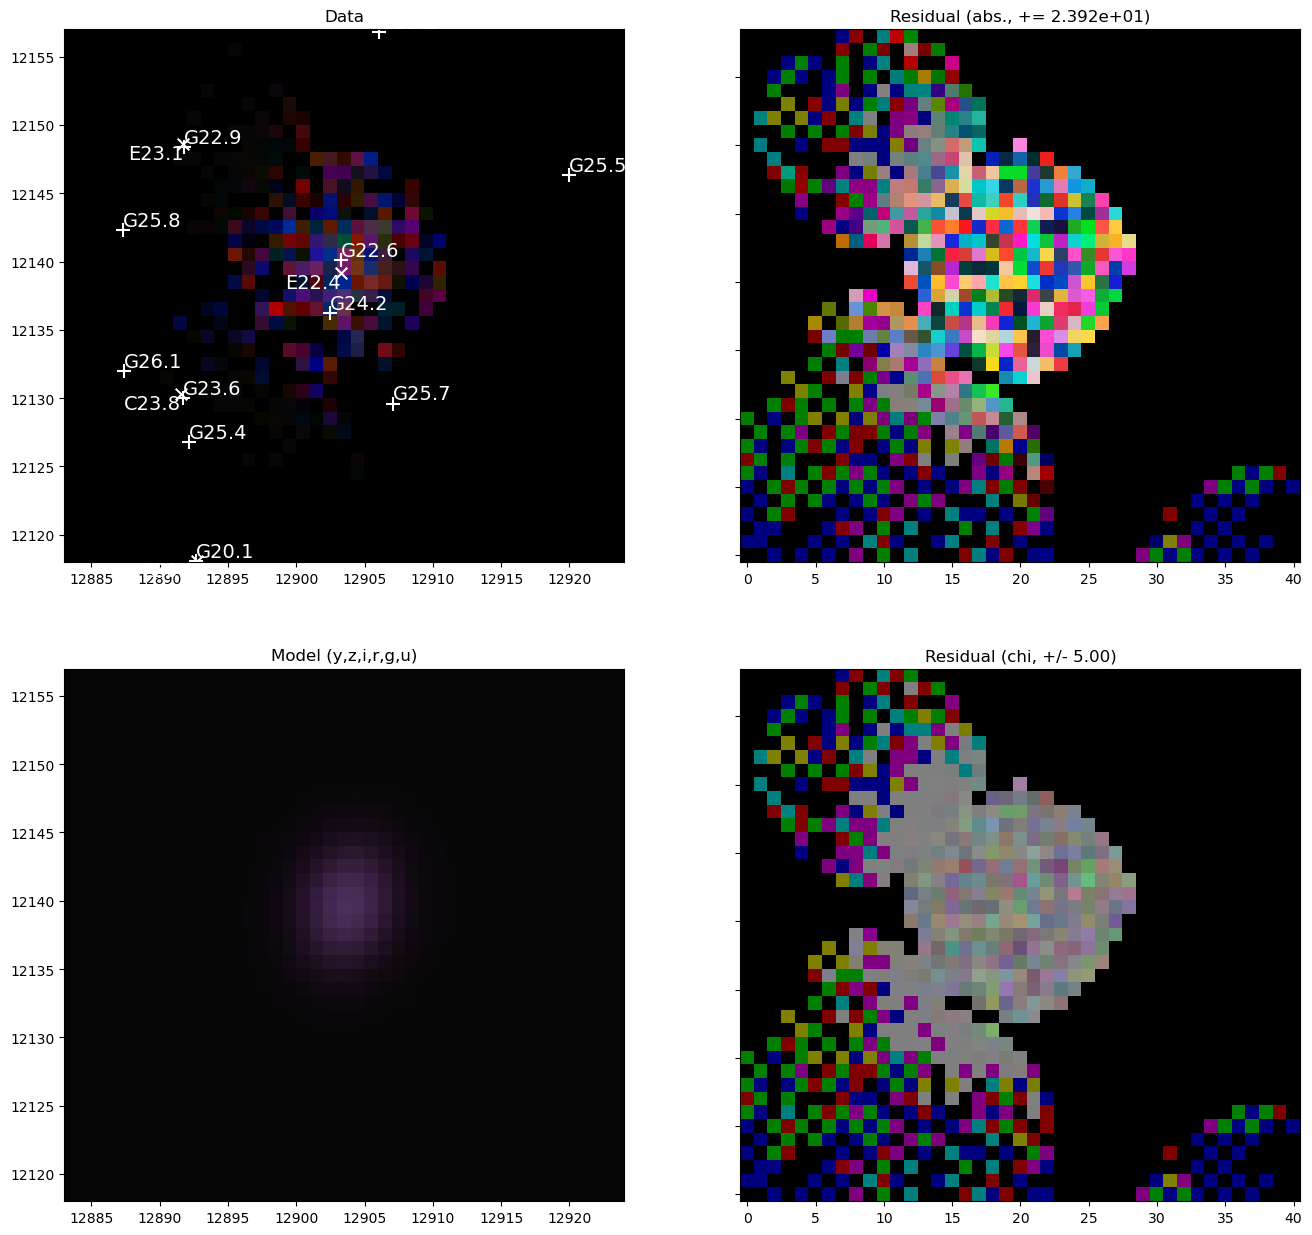

Model: cModel
Model: ser_fixedcen


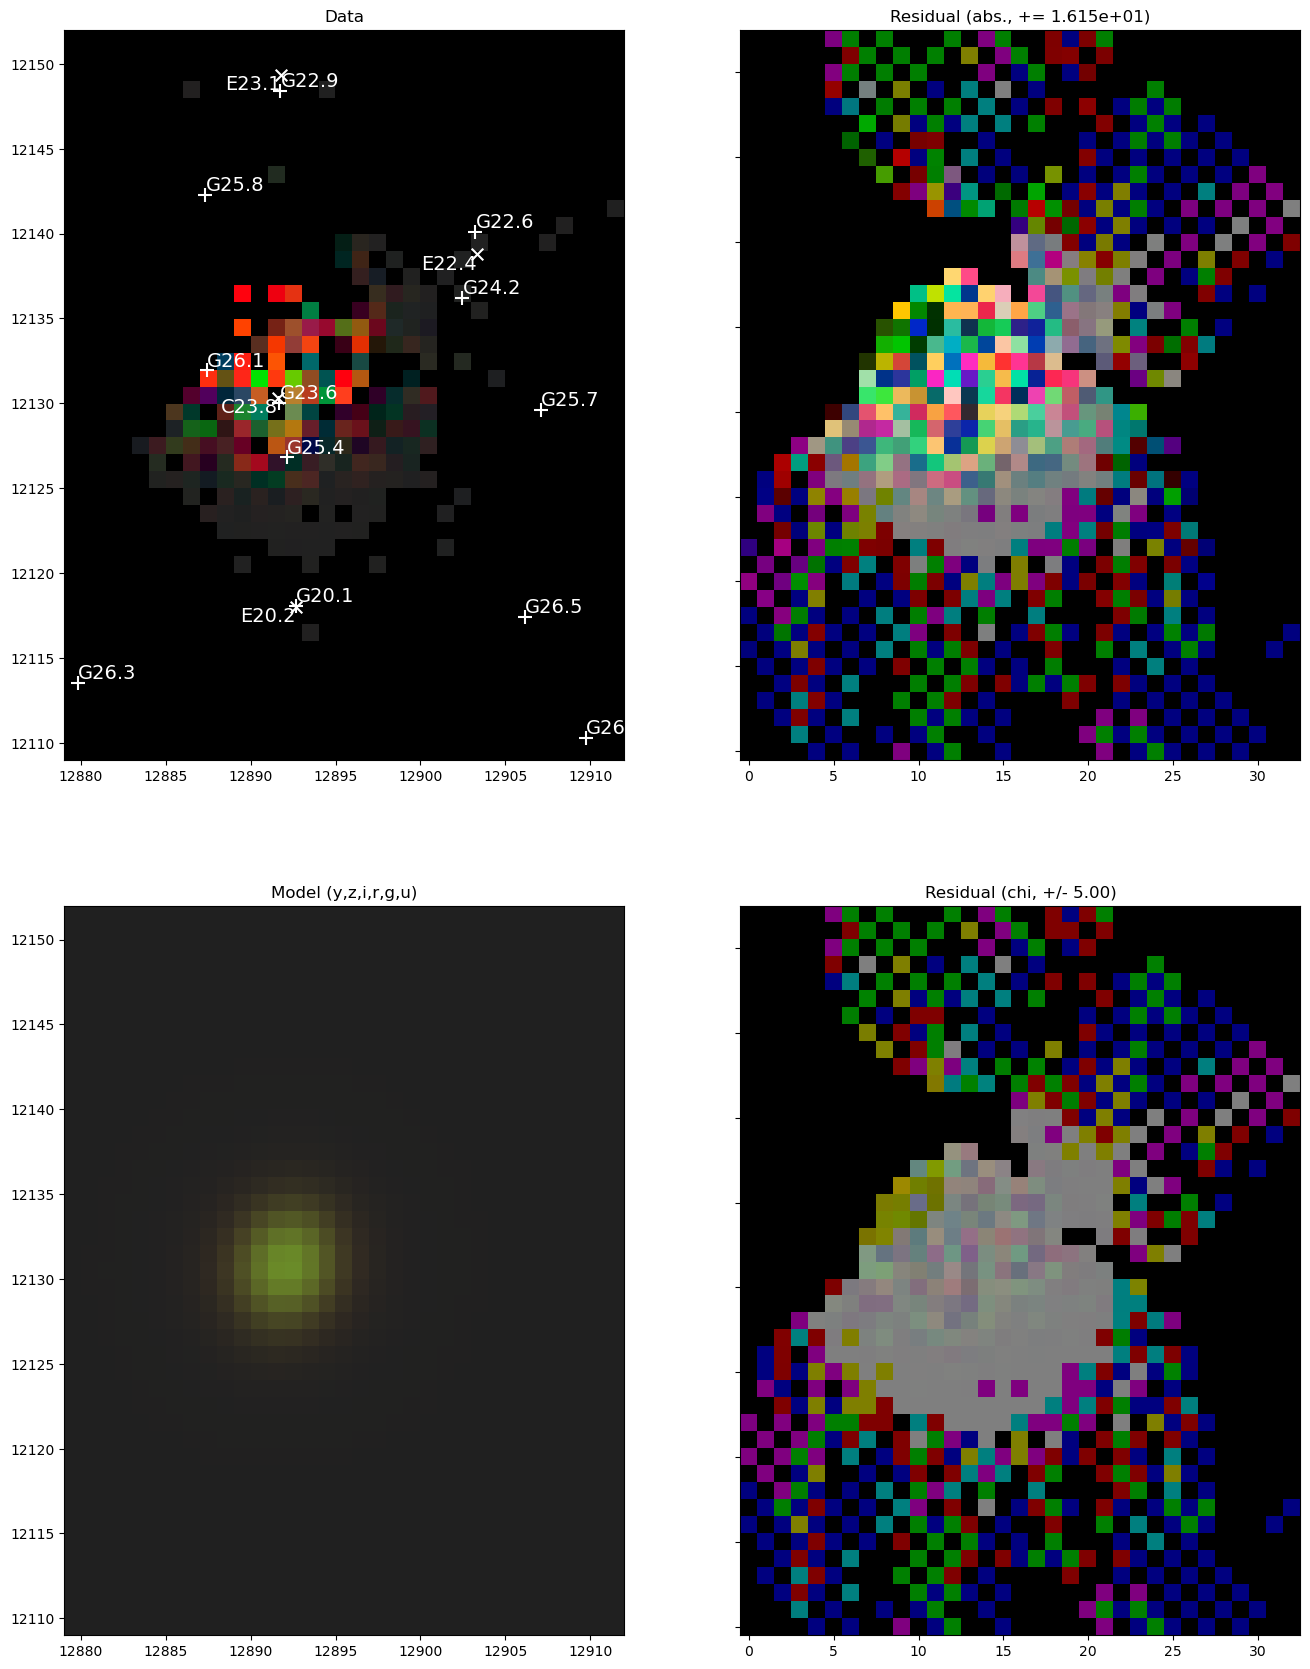

Model: ser


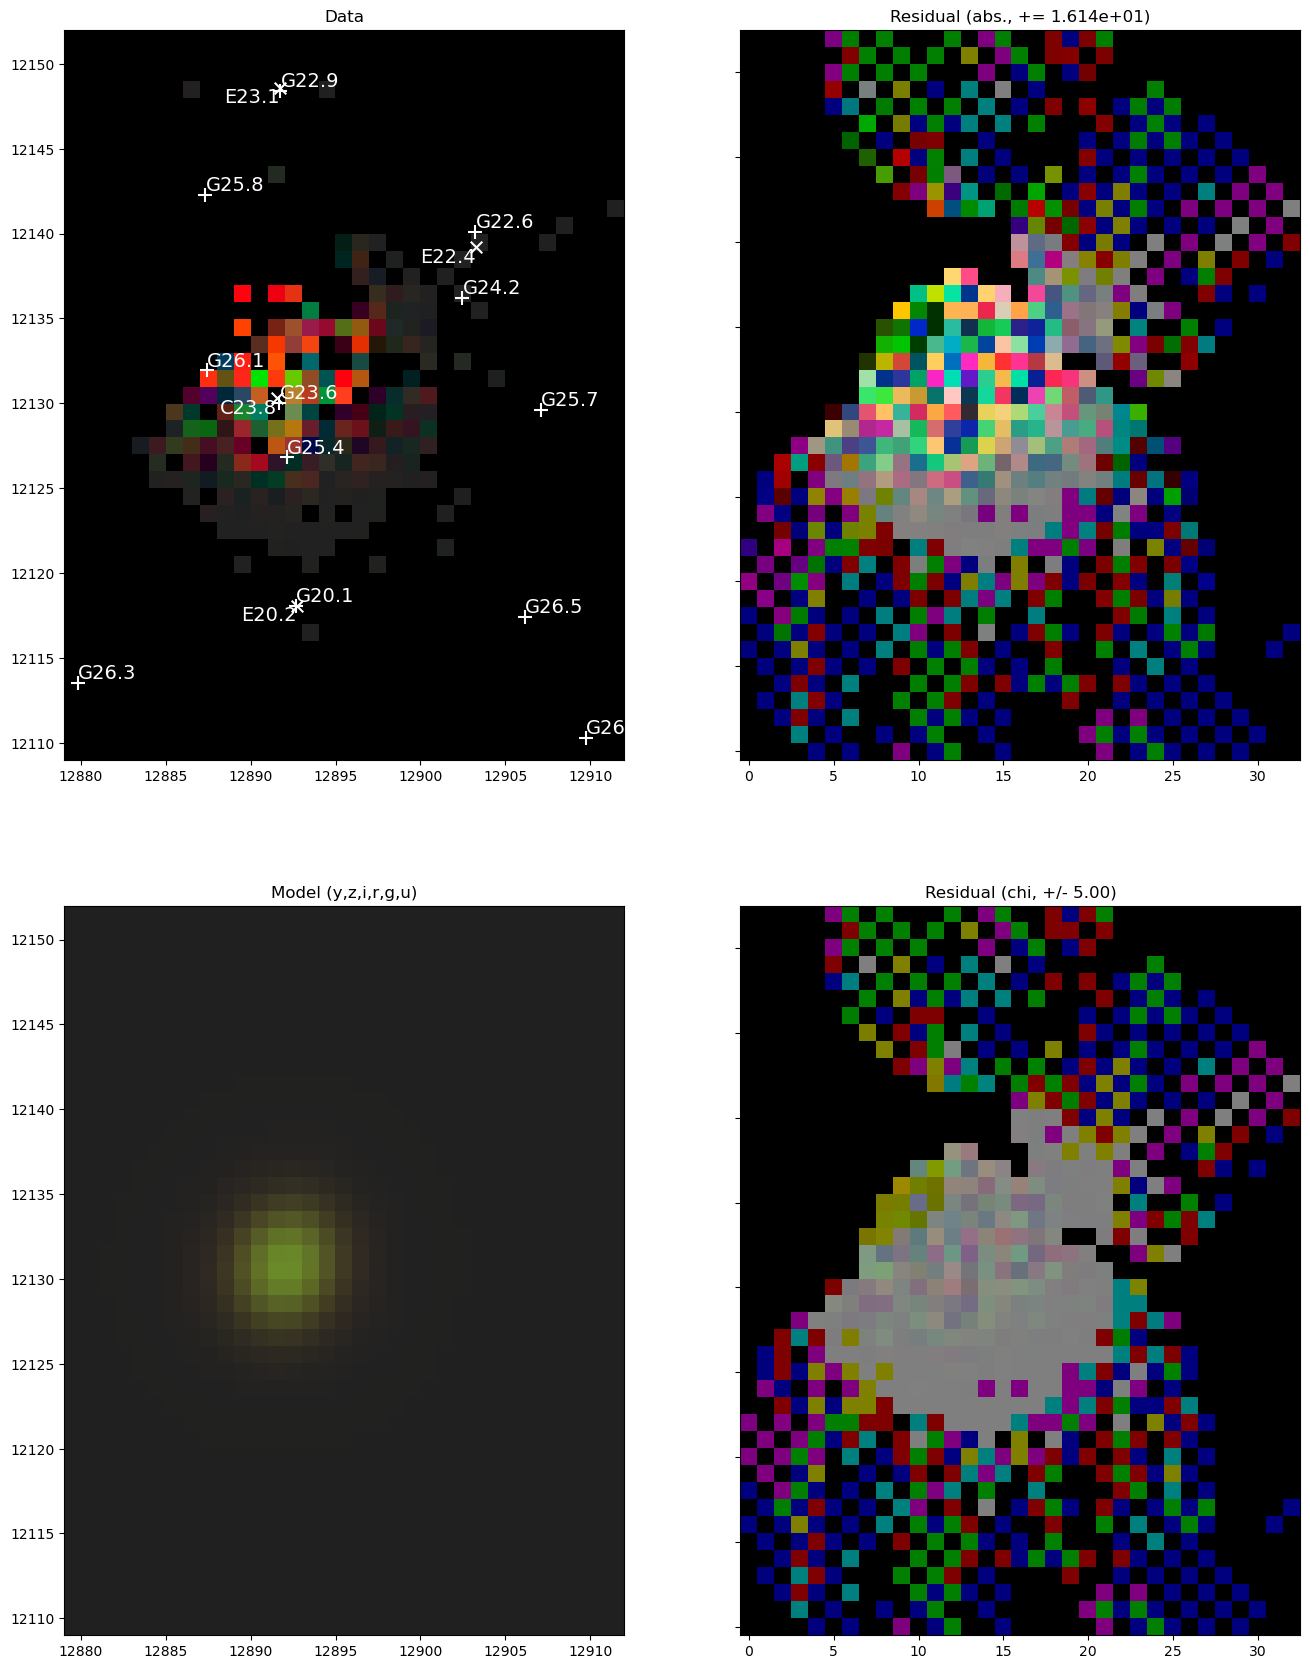

Model: cModel
Model: ser_fixedcen


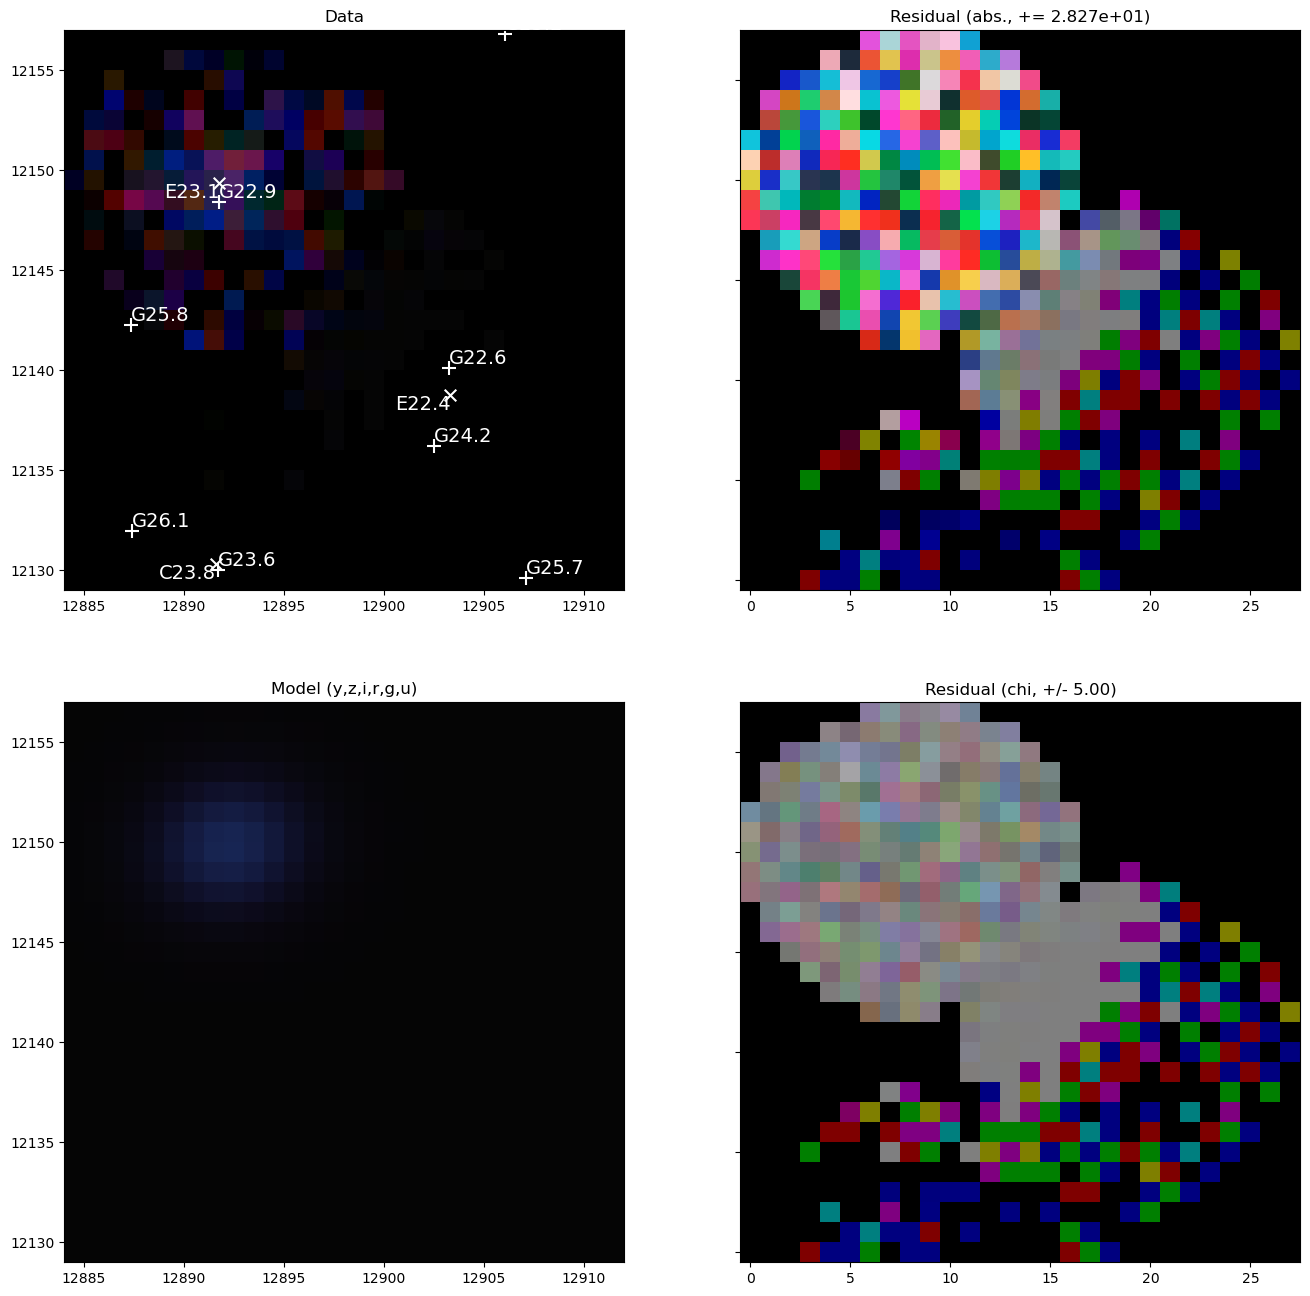

Model: ser


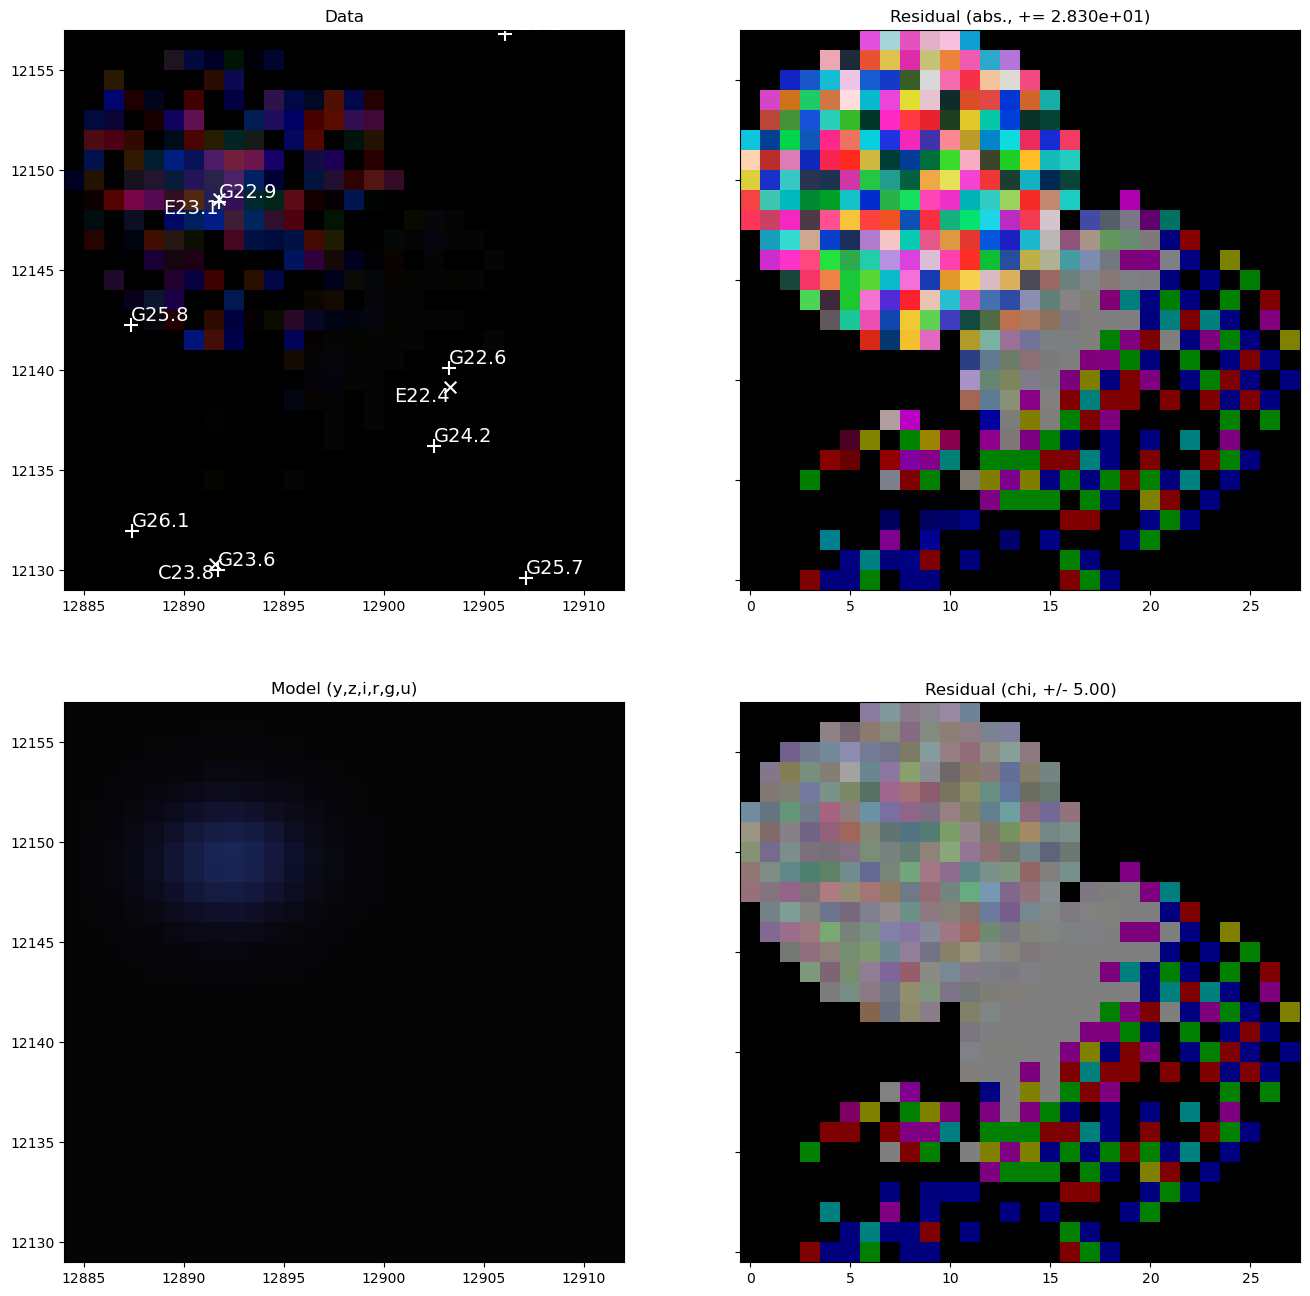

Model: cModel
Model: ser_fixedcen


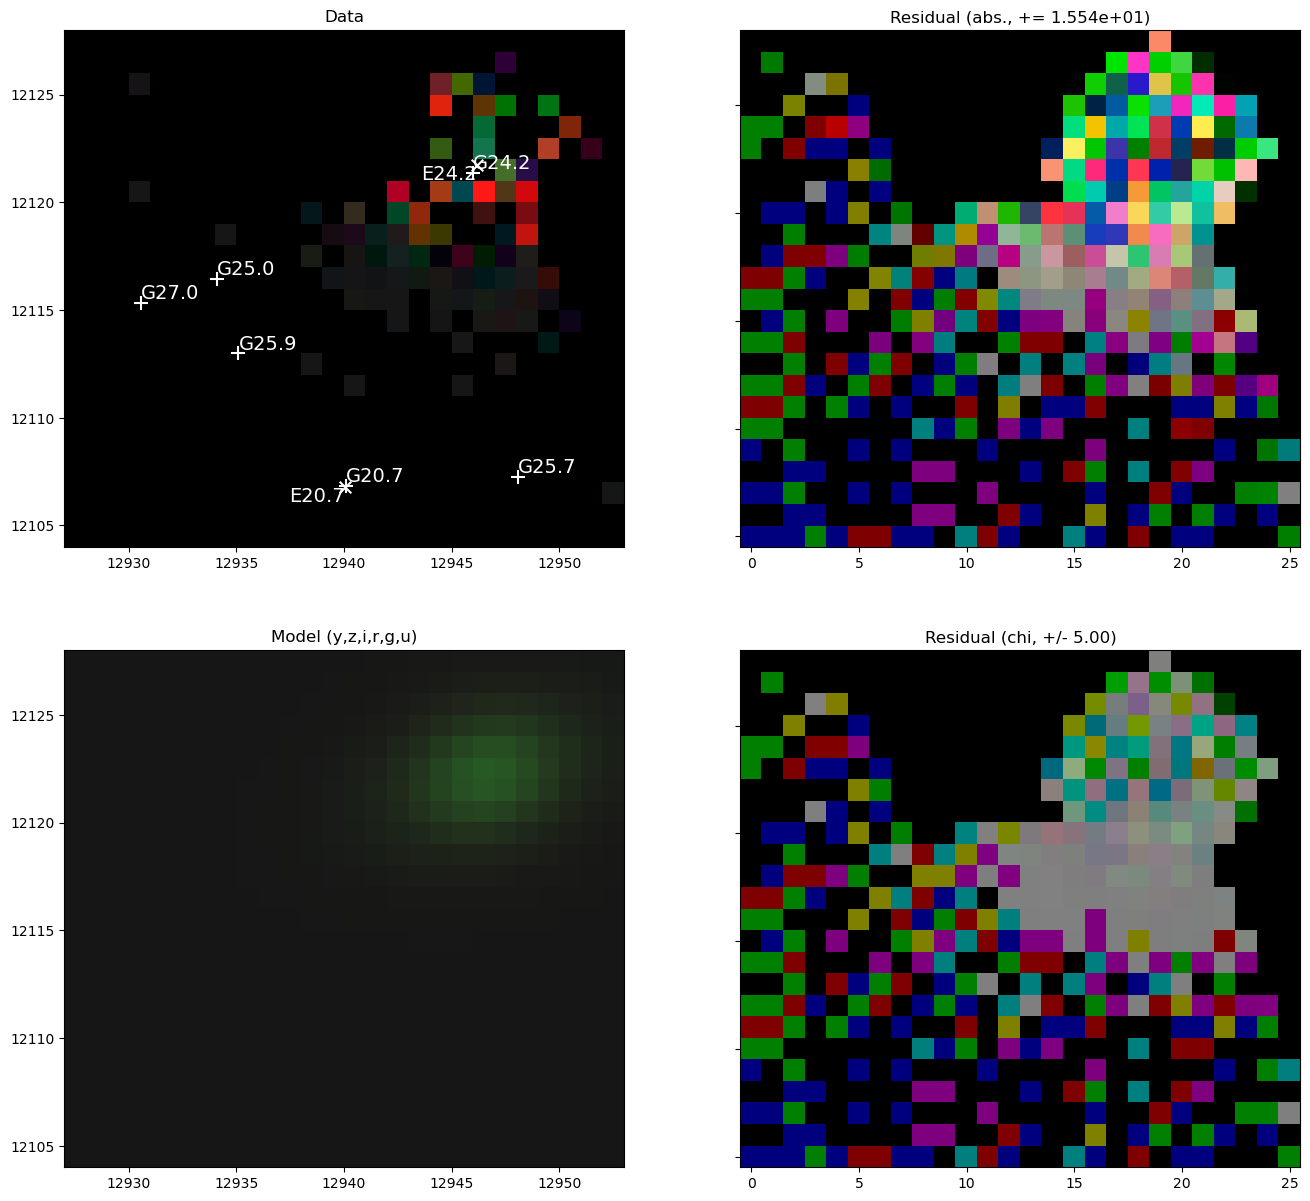

Model: ser


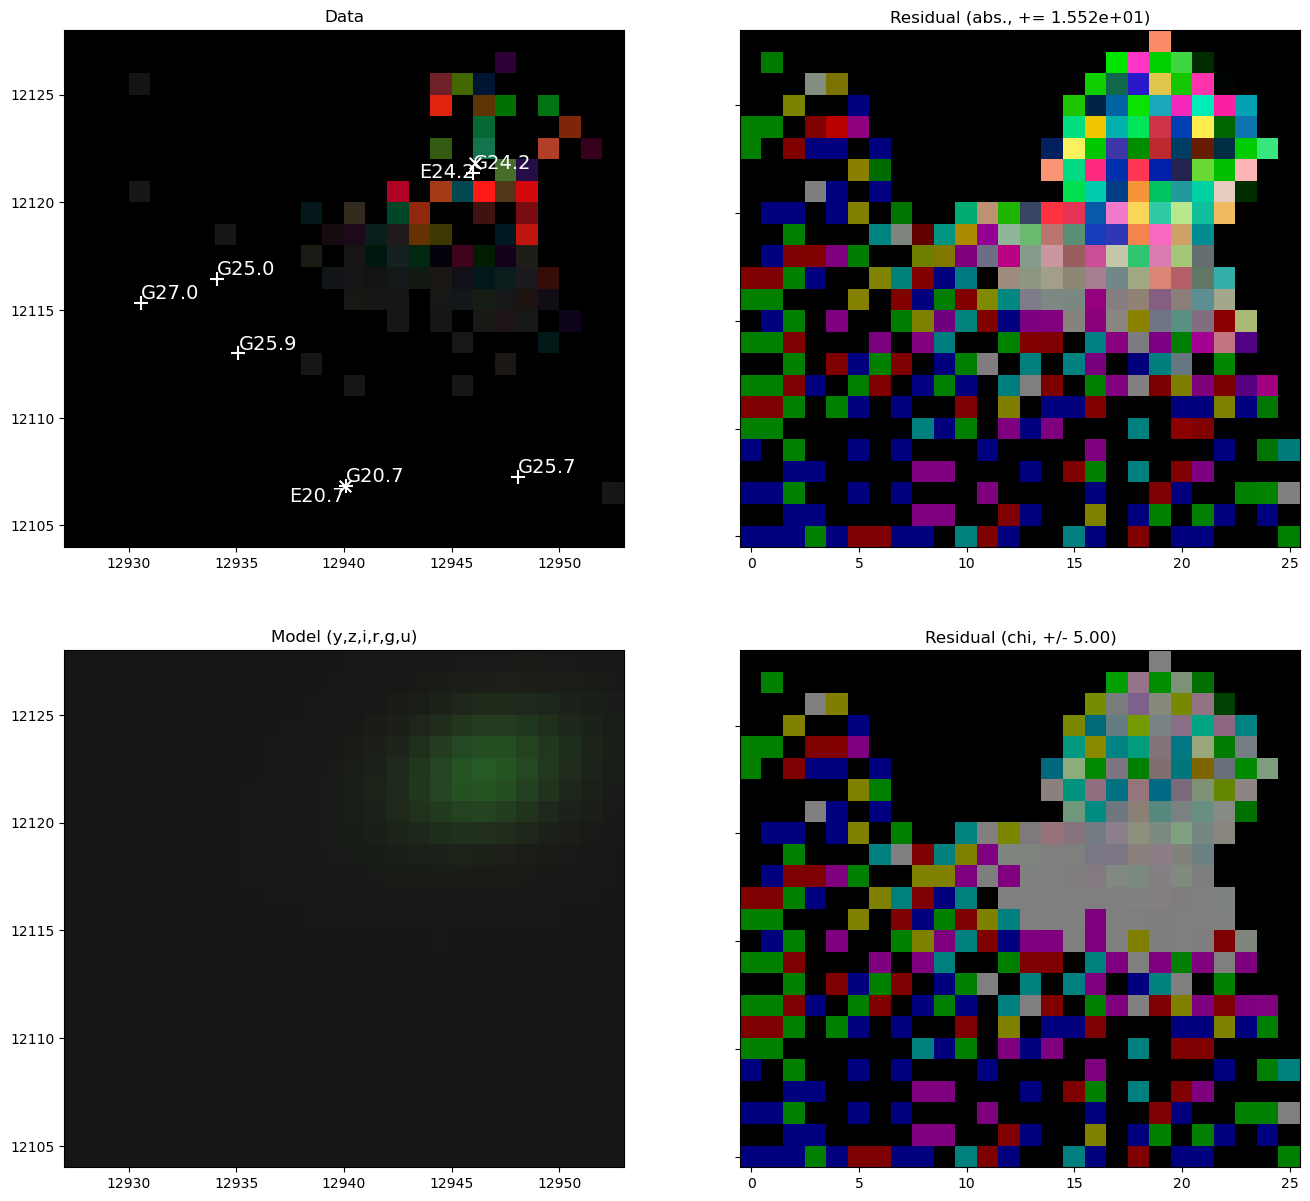

Model: cModel
Model: ser_fixedcen


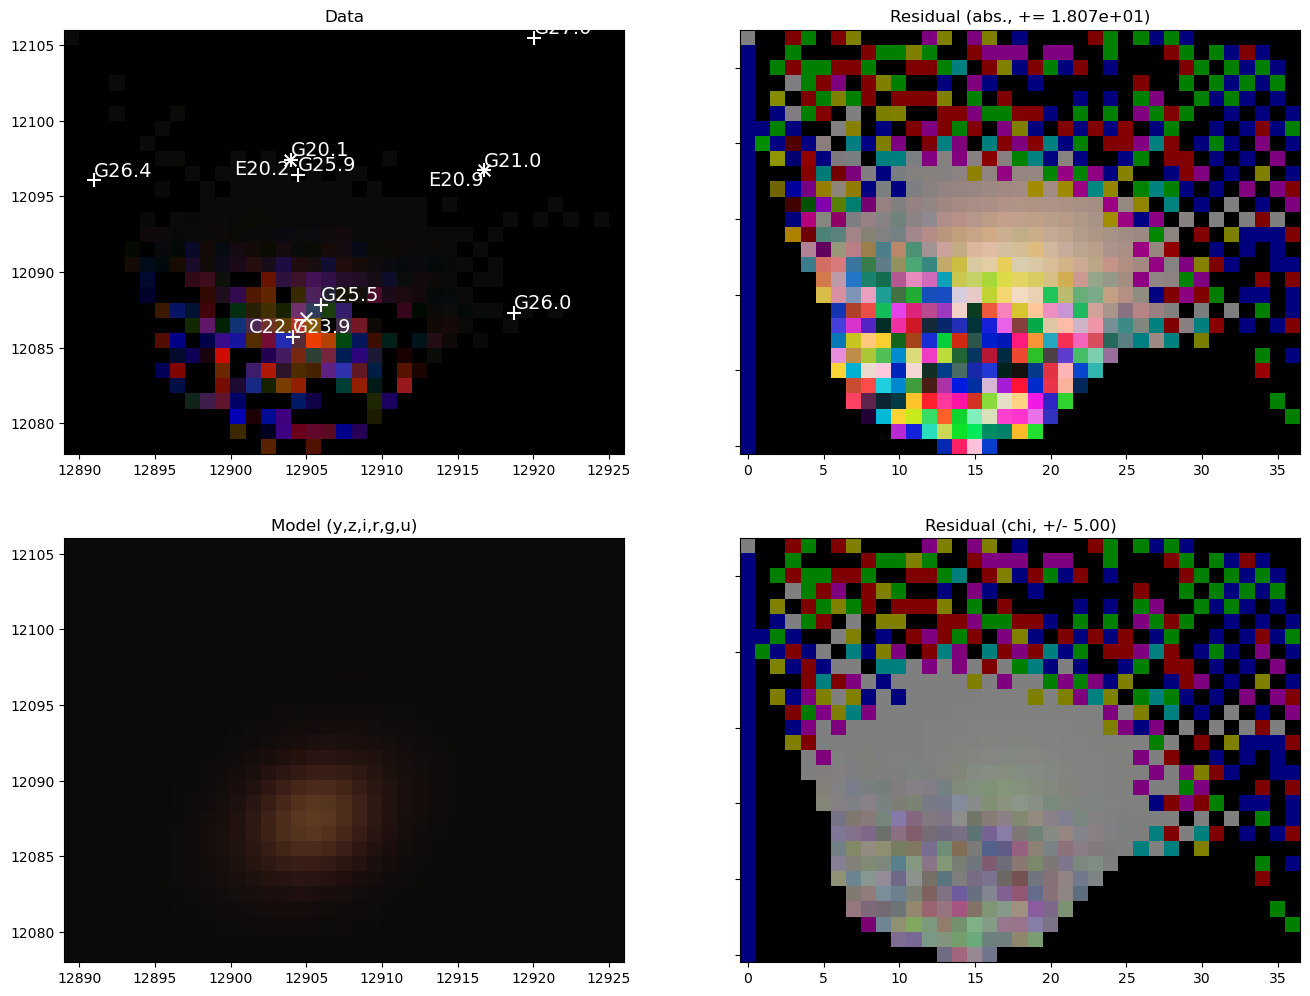

Model: ser


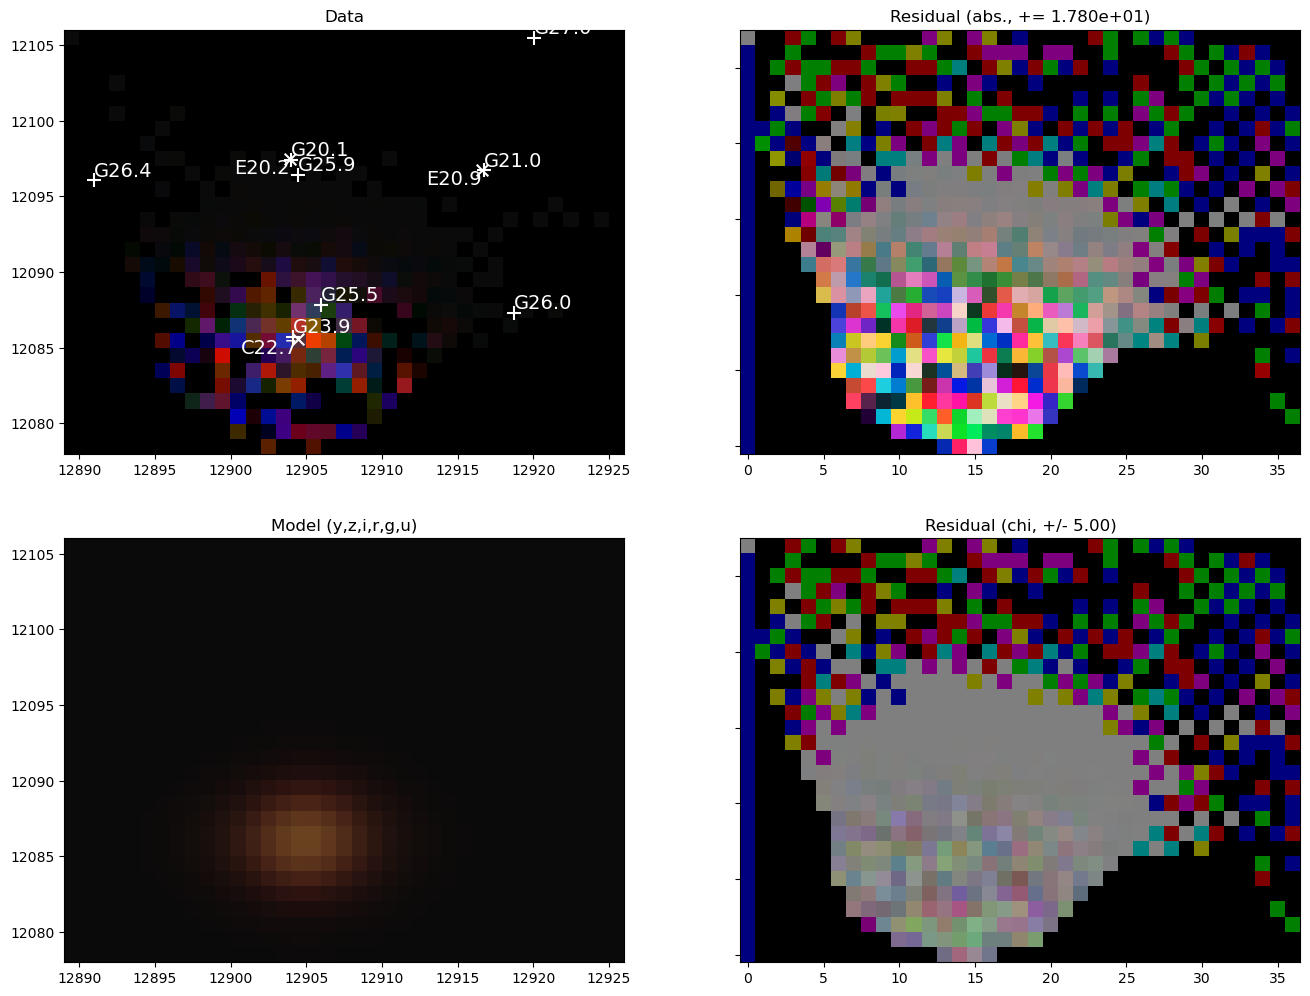

In [8]:
# plot another big blend
ra_ref2, dec_ref2 = (x*np.pi/180 for x in (56.72423959, -36.55118001))
row_parent2 = np.where(
    np.hypot(catalog_multi["coord_ra"] - ra_ref2, catalog_multi["coord_dec"] - dec_ref2) < dradec
)[0][0]

fig_rgb, ax_rgb, fig_gs, ax_gs = plot_blend(rebuilder, row_parent2, kwargs_plot_parent=kwargs_parent, kwargs_plot_children=kwargs_children)